In [1]:
!dir
#!pip install openpyxl
!python.exe -m pip install --upgrade pip

## Loading data

In [2]:
import pandas as pd

train_data = pd.read_csv("Train_data.csv")

train_data.head()


test_data = pd.read_csv("Test_data.csv")

test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


## Data Info

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
train_data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

## Data Cleaning

In [5]:
#Checking for NULL values
train_data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [6]:
# Replacing NAs in education by 'Other'

train_data['education'] = train_data['education'].fillna('Other')
test_data['education'] = test_data['education'].fillna('Other')

In [7]:
# Replacing NAs in previous_year_rating by '0'

train_data['previous_year_rating'] = train_data['previous_year_rating'].fillna(0)
test_data['previous_year_rating'] = test_data['previous_year_rating'].fillna(0)

In [8]:
# All NULL values are gone
train_data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [9]:
# Checking for duplicates
train_data.duplicated().sum()

0

In [10]:
# Dropping employee_id since it is redundant
train_data = train_data.drop(["employee_id"], axis=1)
test_data = test_data.drop(["employee_id"], axis=1)

### Checking for column types

In [11]:
import numpy as np

numeric_columns = list(train_data.select_dtypes(include=np.number).columns)
categorical_columns = list(train_data.select_dtypes(include="object").columns)

Numeric Columns

In [12]:
train_data[numeric_columns].describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.078748,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.496458,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,0.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,2.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


Categorical Columns

In [13]:
train_data[categorical_columns].describe()

,department,region,education,gender,recruitment_channel
count,54808,54808,54808,54808,54808
unique,9,34,4,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


## Categorical Column Data Analysis

IndexError: index 4 is out of bounds for axis 0 with size 4

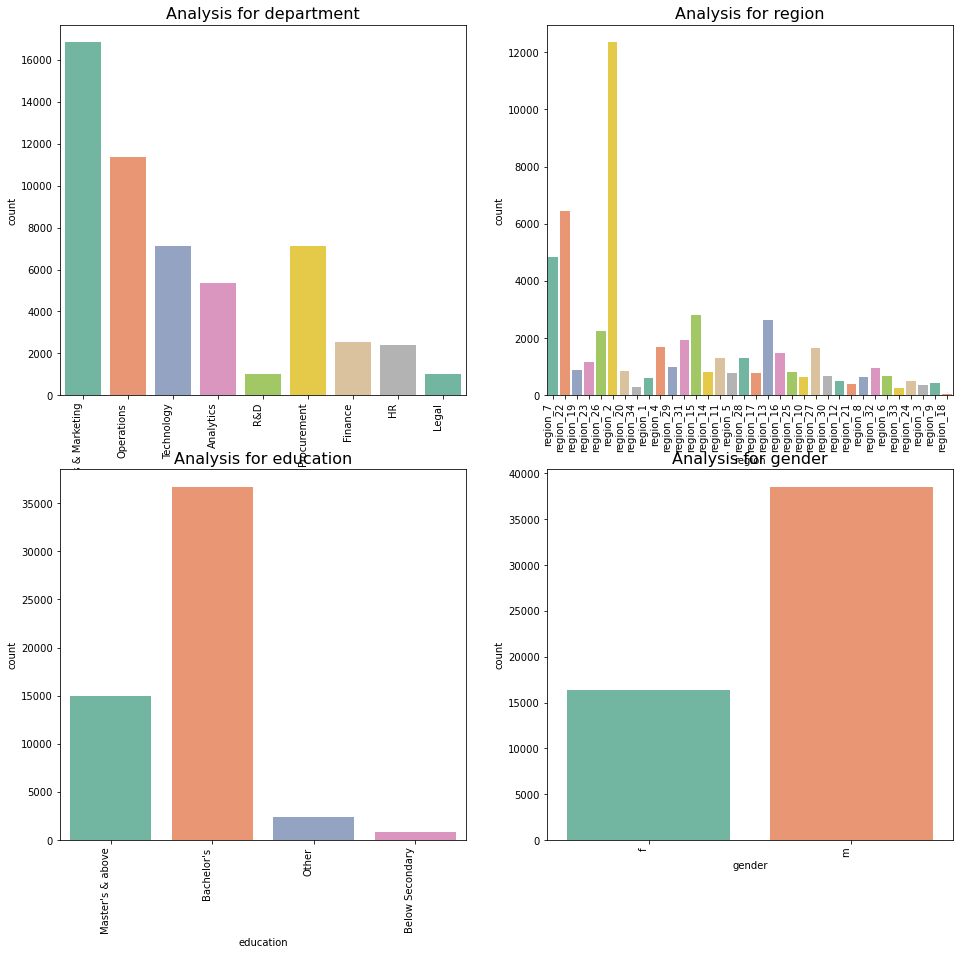

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2,2, figsize = (16,15))

ax = np.ravel(ax)
for i in range(len(categorical_columns)):
    sns.countplot(data = train_data, x = categorical_columns[i], ax = ax[i], palette="Set2")
    ax[i].set_xticklabels(labels = train_data[categorical_columns[i]].unique(), rotation=90, ha='right')
    ax[i].set_title(label = "Analysis for "+categorical_columns[i],fontsize=16)
ax = np.reshape(ax, (2, 2))
plt.tight_layout()

## One Hot Encoding for Categorical Data

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

train_data["department"] = label_encoder.fit_transform(train_data["department"])
train_data["region"] = label_encoder.fit_transform(train_data["region"])
train_data["education"] = label_encoder.fit_transform(train_data["education"])
train_data["gender"] = label_encoder.fit_transform(train_data["gender"])
train_data["recruitment_channel"] = label_encoder.fit_transform(train_data["recruitment_channel"])


test_data["department"] = label_encoder.fit_transform(test_data["department"])
test_data["region"] = label_encoder.fit_transform(test_data["region"])
test_data["education"] = label_encoder.fit_transform(test_data["education"])
test_data["gender"] = label_encoder.fit_transform(test_data["gender"])
test_data["recruitment_channel"] = label_encoder.fit_transform(test_data["recruitment_channel"])

In [16]:


X = train_data.loc[:, train_data.columns != "is_promoted"].copy()
y = train_data.loc[:, "is_promoted"].copy()

y = label_encoder.fit_transform(y)
y = pd.DataFrame(y, index= train_data.index, columns=["is_promoted"])

categorical_cols_features = list(X.select_dtypes(include="object").columns)

In [17]:
# Data After Encoding
X.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,7,31,2,0,2,1,35,5.0,8,1,0,49
1,4,14,0,1,0,1,30,5.0,4,0,0,60
2,7,10,0,1,2,1,34,3.0,7,0,0,50
3,7,15,0,1,0,2,39,1.0,10,0,0,50
4,8,18,0,1,0,1,45,3.0,2,0,0,73


## Feature Importance

Getting the feature importance for every column with respect to Target variable

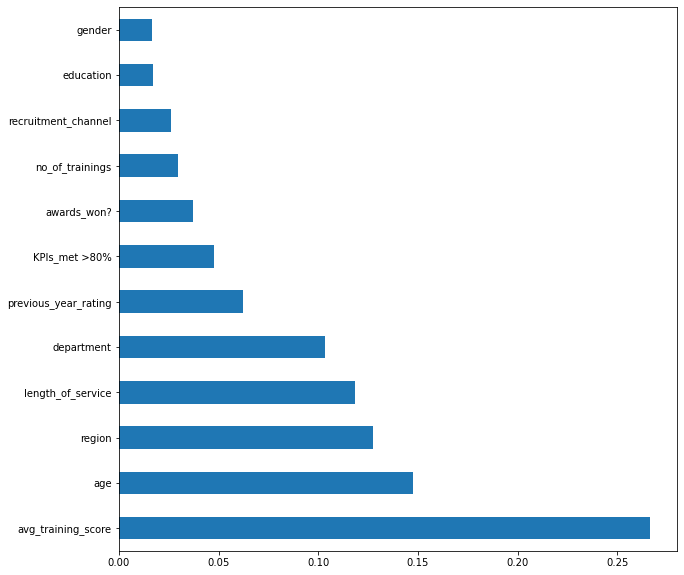

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,np.ravel(y))


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)


#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(35).plot(kind='barh')
plt.show()

## Correlation Matrix

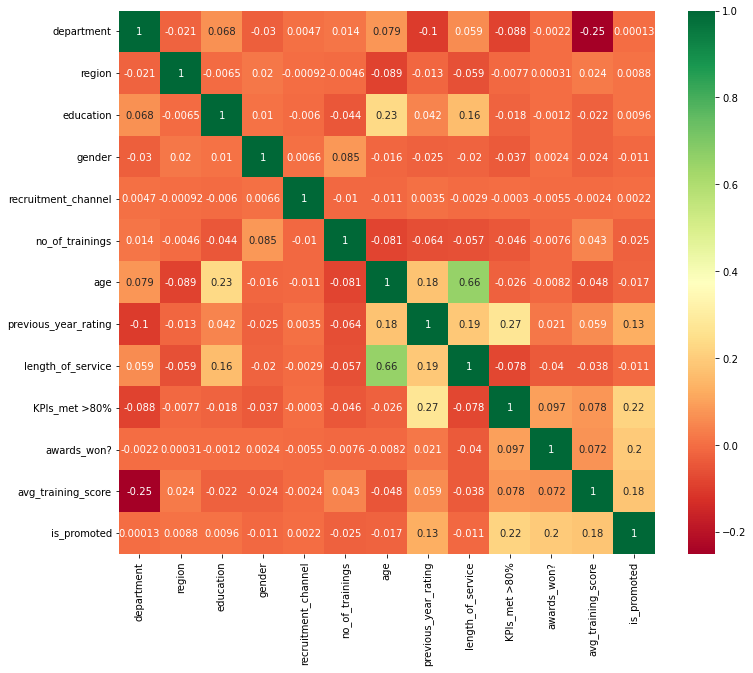

In [19]:
#get correlations of each features in dataset
corrmat = train_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,10))
#plot heat map
g=sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Inference




<li> From categorical importance we can infer that there is a hugh class imbalance in all the 4 attributes</li>
<li> From the feature importance and Correlation Matrix we understand the importance of each attribute among which avg_training_score scores the highest</li>
<li> All preprocessing steps are performed and after performing EDA in this module are data is ready to train under a classifier </li>

# Model Selection

#### Scaling data

In [23]:
X.describe()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,4.972796,15.428970,0.691176,0.702379,0.868158,1.253011,34.803915,3.078748,5.865512,0.351974,0.023172,63.386750
std,2.506046,8.764954,1.010851,0.457216,0.980713,0.609264,7.660169,1.496458,4.265094,0.477590,0.150450,13.371559
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,0.000000,1.000000,0.000000,0.000000,39.000000
25%,4.000000,11.000000,0.000000,0.000000,0.000000,1.000000,29.000000,2.000000,3.000000,0.000000,0.000000,51.000000
50%,5.000000,14.000000,0.000000,1.000000,0.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,7.000000,21.000000,2.000000,1.000000,2.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,8.000000,33.000000,3.000000,1.000000,2.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000


In [35]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaled_X = pd.DataFrame(MinMaxScaler().fit_transform(X),columns=X.columns)
MinMaxScaled_X.describe()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,0.621599,0.467545,0.230392,0.702379,0.434079,0.028112,0.370098,0.615750,0.135153,0.351974,0.023172,0.406446
std,0.313256,0.265605,0.336950,0.457216,0.490357,0.067696,0.191504,0.299292,0.118475,0.477590,0.150450,0.222859
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.333333,0.000000,0.000000,0.000000,0.000000,0.225000,0.400000,0.055556,0.000000,0.000000,0.200000
50%,0.625000,0.424242,0.000000,1.000000,0.000000,0.000000,0.325000,0.600000,0.111111,0.000000,0.000000,0.350000
75%,0.875000,0.636364,0.666667,1.000000,1.000000,0.000000,0.475000,0.800000,0.166667,1.000000,0.000000,0.616667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
from sklearn.preprocessing import StandardScaler
StandardScaled_X = pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)
StandardScaled_X.describe()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04
mean,-1.349575e-16,7.687780e-17,7.182176e-17,3.292911e-17,1.685348e-17,5.133829e-17,-3.764808e-16,5.795004e-17,5.477381e-17,1.322350e-17,7.130319e-19,-2.353005e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.984338e+00,-1.760319e+00,-6.837634e-01,-1.536223e+00,-8.852391e-01,-4.152762e-01,-1.932601e+00,-2.057375e+00,-1.140785e+00,-7.369860e-01,-1.540178e-01,-1.823794e+00
25%,-3.881832e-01,-5.053091e-01,-6.837634e-01,-1.536223e+00,-8.852391e-01,-4.152762e-01,-7.576815e-01,-7.208737e-01,-6.718582e-01,-7.369860e-01,-1.540178e-01,-9.263589e-01
50%,1.085547e-02,-1.630338e-01,-6.837634e-01,6.509473e-01,-8.852391e-01,-4.152762e-01,-2.354951e-01,-5.262314e-02,-2.029311e-01,-7.369860e-01,-1.540178e-01,-2.532824e-01
75%,8.089329e-01,6.356087e-01,1.294786e+00,6.509473e-01,1.154111e+00,-4.152762e-01,5.477846e-01,6.156274e-01,2.659960e-01,1.356878e+00,-1.540178e-01,9.432980e-01
max,1.207972e+00,2.004710e+00,2.284061e+00,6.509473e-01,1.154111e+00,1.435678e+01,3.289263e+00,1.283878e+00,7.299903e+00,1.356878e+00,6.492758e+00,2.663382e+00


In [31]:
from sklearn.preprocessing import StandardScaler
StandardScaled_X = pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)
StandardScaled_X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04
mean,-1.349575e-16,7.687780e-17,7.182176e-17,3.292911e-17,1.685348e-17,5.133829e-17,-3.764808e-16,5.795004e-17,5.477381e-17,1.322350e-17,7.130319e-19,-2.353005e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.984338e+00,-1.760319e+00,-6.837634e-01,-1.536223e+00,-8.852391e-01,-4.152762e-01,-1.932601e+00,-2.057375e+00,-1.140785e+00,-7.369860e-01,-1.540178e-01,-1.823794e+00
25%,-3.881832e-01,-5.053091e-01,-6.837634e-01,-1.536223e+00,-8.852391e-01,-4.152762e-01,-7.576815e-01,-7.208737e-01,-6.718582e-01,-7.369860e-01,-1.540178e-01,-9.263589e-01
50%,1.085547e-02,-1.630338e-01,-6.837634e-01,6.509473e-01,-8.852391e-01,-4.152762e-01,-2.354951e-01,-5.262314e-02,-2.029311e-01,-7.369860e-01,-1.540178e-01,-2.532824e-01
75%,8.089329e-01,6.356087e-01,1.294786e+00,6.509473e-01,1.154111e+00,-4.152762e-01,5.477846e-01,6.156274e-01,2.659960e-01,1.356878e+00,-1.540178e-01,9.432980e-01
max,1.207972e+00,2.004710e+00,2.284061e+00,6.509473e-01,1.154111e+00,1.435678e+01,3.289263e+00,1.283878e+00,7.299903e+00,1.356878e+00,6.492758e+00,2.663382e+00


In [38]:
from sklearn.preprocessing import MaxAbsScaler
MaxAbsScaled_X = pd.DataFrame(MaxAbsScaler().fit_transform(X),columns=X.columns)
MaxAbsScaled_X.describe()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,0.621599,0.467545,0.230392,0.702379,0.434079,0.125301,0.580065,0.615750,0.158527,0.351974,0.023172,0.640270
std,0.313256,0.265605,0.336950,0.457216,0.490357,0.060926,0.127669,0.299292,0.115273,0.477590,0.150450,0.135066
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.333333,0.000000,0.027027,0.000000,0.000000,0.393939
25%,0.500000,0.333333,0.000000,0.000000,0.000000,0.100000,0.483333,0.400000,0.081081,0.000000,0.000000,0.515152
50%,0.625000,0.424242,0.000000,1.000000,0.000000,0.100000,0.550000,0.600000,0.135135,0.000000,0.000000,0.606061
75%,0.875000,0.636364,0.666667,1.000000,1.000000,0.100000,0.650000,0.800000,0.189189,1.000000,0.000000,0.767677
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
from sklearn.preprocessing import RobustScaler
RobustScaled_X = pd.DataFrame(RobustScaler().fit_transform(X),columns=X.columns)
RobustScaled_X.describe()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,-0.009068,0.142897,0.345588,-0.297621,0.434079,0.253011,0.180392,0.039374,0.216378,0.351974,0.023172,0.135470
std,0.835349,0.876495,0.505425,0.457216,0.490357,0.609264,0.766017,0.748229,1.066274,0.477590,0.150450,0.534862
min,-1.666667,-1.400000,0.000000,-1.000000,0.000000,0.000000,-1.300000,-1.500000,-1.000000,0.000000,0.000000,-0.840000
25%,-0.333333,-0.300000,0.000000,-1.000000,0.000000,0.000000,-0.400000,-0.500000,-0.500000,0.000000,0.000000,-0.360000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,0.700000,1.000000,0.000000,1.000000,0.000000,0.600000,0.500000,0.500000,1.000000,0.000000,0.640000
max,1.000000,1.900000,1.500000,0.000000,1.000000,9.000000,2.700000,1.000000,8.000000,1.000000,1.000000,1.560000


In [40]:
# Choosing Robust Scaler for future classification

X = pd.DataFrame(RobustScaler().fit_transform(X),columns=X.columns)

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("Shape of X_train",X_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (36721, 12)
Shape of y_train (36721, 1)
Shape of X_test (18087, 12)
Shape of y_test (18087, 1)


### XGBoost

In [43]:
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


# Parameter Tuning
model = xgb.XGBClassifier()
param_dist = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16],}
grid_search = GridSearchCV(model, param_grid=param_dist, cv = 3, verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

grid_search.best_estimator_


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  67 out of  81 | elapsed:  1.6min remaining:   19.4s
[Parallel(n_jobs=-1)]: Done  76 out of  81 | elapsed:  1.8min remaining:    6.9s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.8min finished
c:\users\amit pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[20:08:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.16, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbose=1,
              verbosity=None)

In [48]:
model_xgb = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.16, max_delta_step=0, max_depth=50,
              min_child_weight=1,
              n_estimators=200, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbose=1,
              verbosity=None)
model_xgb.fit(X_train,y_train)

print("XGB Accuracy:",np.round(model_xgb.score(X_test, y_test),2))

[20:11:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGB Accuracy: 0.93


### Light GBM

In [53]:
import lightgbm as lgb
from sklearn import metrics


lg = lgb.LGBMClassifier(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose=5)
grid_search.fit(X_train ,np.ravel(y_train))
grid_search.best_estimator_



Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done  75 out of  81 | elapsed:   46.1s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   49.4s finished


LGBMClassifier(learning_rate=0.01, max_depth=25, n_estimators=200,
               num_leaves=300, silent=False)

In [67]:
d_train = lgb.Dataset(X_train, label=np.ravel(y_train))
d_test = lgb.Dataset(X_test, label=np.ravel(y_test))
params = {"learning_rate": 0.01, "max_depth":25, "n_estimators":200,"num_leaves":300, "silent":False}



model_lgb = lgb.train(params, d_train)
print("LGBM Accuracy:",np.round(metrics.roc_auc_score(y_test,model_lgb.predict(X_test)),2))

c:\users\amit pc\appdata\local\programs\python\python37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
c:\users\amit pc\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:842: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


LGBM Accuracy: 0.9


### CatBoost

In [70]:
import catboost as cb


params = {'depth': [4, 7, 10],
          'learning_rate' : [0.03, 0.1, 0.15],
         'l2_leaf_reg': [1,4,9],
         'iterations': [300]}
cb = cb.CatBoostClassifier()
cb_model = GridSearchCV(cb, params, scoring="roc_auc", cv = 3)
cb_model.fit(X_train, y_train)


0:	learn: 0.6626597	total: 177ms	remaining: 52.8s
1:	learn: 0.6296728	total: 183ms	remaining: 27.3s
2:	learn: 0.6024411	total: 190ms	remaining: 18.8s
3:	learn: 0.5775570	total: 197ms	remaining: 14.6s
4:	learn: 0.5516782	total: 204ms	remaining: 12s
5:	learn: 0.5316971	total: 211ms	remaining: 10.4s
6:	learn: 0.5074128	total: 218ms	remaining: 9.12s
7:	learn: 0.4888483	total: 225ms	remaining: 8.21s
8:	learn: 0.4701638	total: 232ms	remaining: 7.49s
9:	learn: 0.4544760	total: 238ms	remaining: 6.91s
10:	learn: 0.4383534	total: 245ms	remaining: 6.43s
11:	learn: 0.4255390	total: 252ms	remaining: 6.04s
12:	learn: 0.4119026	total: 258ms	remaining: 5.69s
13:	learn: 0.3988480	total: 265ms	remaining: 5.41s
14:	learn: 0.3861647	total: 271ms	remaining: 5.16s
15:	learn: 0.3767283	total: 279ms	remaining: 4.95s
16:	learn: 0.3664709	total: 286ms	remaining: 4.76s
17:	learn: 0.3582252	total: 293ms	remaining: 4.58s
18:	learn: 0.3510102	total: 299ms	remaining: 4.43s
19:	learn: 0.3434335	total: 305ms	remaining

185:	learn: 0.1944503	total: 1.61s	remaining: 985ms
186:	learn: 0.1943561	total: 1.62s	remaining: 977ms
187:	learn: 0.1942969	total: 1.63s	remaining: 969ms
188:	learn: 0.1942560	total: 1.63s	remaining: 959ms
189:	learn: 0.1941943	total: 1.64s	remaining: 950ms
190:	learn: 0.1941466	total: 1.65s	remaining: 940ms
191:	learn: 0.1940474	total: 1.65s	remaining: 931ms
192:	learn: 0.1939788	total: 1.66s	remaining: 923ms
193:	learn: 0.1939331	total: 1.67s	remaining: 915ms
194:	learn: 0.1937709	total: 1.68s	remaining: 907ms
195:	learn: 0.1935307	total: 1.69s	remaining: 898ms
196:	learn: 0.1934502	total: 1.7s	remaining: 890ms
197:	learn: 0.1934066	total: 1.71s	remaining: 880ms
198:	learn: 0.1933701	total: 1.72s	remaining: 871ms
199:	learn: 0.1932190	total: 1.72s	remaining: 862ms
200:	learn: 0.1930212	total: 1.73s	remaining: 852ms
201:	learn: 0.1929703	total: 1.74s	remaining: 842ms
202:	learn: 0.1927460	total: 1.74s	remaining: 833ms
203:	learn: 0.1924912	total: 1.75s	remaining: 824ms
204:	learn: 0

48:	learn: 0.2475949	total: 389ms	remaining: 1.99s
49:	learn: 0.2456127	total: 399ms	remaining: 1.99s
50:	learn: 0.2440644	total: 407ms	remaining: 1.99s
51:	learn: 0.2427382	total: 414ms	remaining: 1.97s
52:	learn: 0.2422229	total: 422ms	remaining: 1.96s
53:	learn: 0.2416351	total: 429ms	remaining: 1.96s
54:	learn: 0.2408732	total: 436ms	remaining: 1.94s
55:	learn: 0.2402793	total: 445ms	remaining: 1.94s
56:	learn: 0.2390036	total: 453ms	remaining: 1.93s
57:	learn: 0.2385174	total: 460ms	remaining: 1.92s
58:	learn: 0.2365972	total: 468ms	remaining: 1.91s
59:	learn: 0.2360156	total: 476ms	remaining: 1.9s
60:	learn: 0.2355117	total: 484ms	remaining: 1.9s
61:	learn: 0.2332177	total: 493ms	remaining: 1.89s
62:	learn: 0.2328622	total: 500ms	remaining: 1.88s
63:	learn: 0.2324586	total: 508ms	remaining: 1.87s
64:	learn: 0.2321545	total: 516ms	remaining: 1.86s
65:	learn: 0.2310842	total: 524ms	remaining: 1.86s
66:	learn: 0.2308745	total: 531ms	remaining: 1.85s
67:	learn: 0.2297324	total: 539ms

211:	learn: 0.1914881	total: 1.63s	remaining: 677ms
212:	learn: 0.1914419	total: 1.64s	remaining: 670ms
213:	learn: 0.1913958	total: 1.65s	remaining: 663ms
214:	learn: 0.1913430	total: 1.66s	remaining: 654ms
215:	learn: 0.1913102	total: 1.66s	remaining: 647ms
216:	learn: 0.1912661	total: 1.67s	remaining: 640ms
217:	learn: 0.1912242	total: 1.68s	remaining: 632ms
218:	learn: 0.1911968	total: 1.69s	remaining: 624ms
219:	learn: 0.1911745	total: 1.7s	remaining: 617ms
220:	learn: 0.1909397	total: 1.7s	remaining: 609ms
221:	learn: 0.1909178	total: 1.71s	remaining: 602ms
222:	learn: 0.1906731	total: 1.72s	remaining: 593ms
223:	learn: 0.1906442	total: 1.73s	remaining: 586ms
224:	learn: 0.1901275	total: 1.73s	remaining: 578ms
225:	learn: 0.1894696	total: 1.74s	remaining: 571ms
226:	learn: 0.1894237	total: 1.75s	remaining: 563ms
227:	learn: 0.1893932	total: 1.76s	remaining: 555ms
228:	learn: 0.1886409	total: 1.77s	remaining: 548ms
229:	learn: 0.1886124	total: 1.77s	remaining: 540ms
230:	learn: 0.

77:	learn: 0.2266857	total: 556ms	remaining: 1.58s
78:	learn: 0.2255848	total: 565ms	remaining: 1.58s
79:	learn: 0.2247614	total: 573ms	remaining: 1.57s
80:	learn: 0.2236513	total: 580ms	remaining: 1.57s
81:	learn: 0.2233301	total: 587ms	remaining: 1.56s
82:	learn: 0.2230841	total: 594ms	remaining: 1.55s
83:	learn: 0.2228922	total: 600ms	remaining: 1.54s
84:	learn: 0.2228442	total: 611ms	remaining: 1.54s
85:	learn: 0.2227104	total: 622ms	remaining: 1.55s
86:	learn: 0.2222389	total: 632ms	remaining: 1.55s
87:	learn: 0.2215494	total: 641ms	remaining: 1.54s
88:	learn: 0.2209357	total: 649ms	remaining: 1.54s
89:	learn: 0.2205374	total: 655ms	remaining: 1.53s
90:	learn: 0.2199547	total: 663ms	remaining: 1.52s
91:	learn: 0.2192521	total: 670ms	remaining: 1.51s
92:	learn: 0.2188546	total: 676ms	remaining: 1.5s
93:	learn: 0.2186345	total: 684ms	remaining: 1.5s
94:	learn: 0.2179606	total: 692ms	remaining: 1.49s
95:	learn: 0.2177571	total: 699ms	remaining: 1.49s
96:	learn: 0.2175583	total: 706ms

246:	learn: 0.1832035	total: 1.81s	remaining: 389ms
247:	learn: 0.1831618	total: 1.82s	remaining: 382ms
248:	learn: 0.1829735	total: 1.83s	remaining: 374ms
249:	learn: 0.1829484	total: 1.84s	remaining: 367ms
250:	learn: 0.1828766	total: 1.84s	remaining: 360ms
251:	learn: 0.1828634	total: 1.85s	remaining: 352ms
252:	learn: 0.1828373	total: 1.85s	remaining: 345ms
253:	learn: 0.1828124	total: 1.86s	remaining: 338ms
254:	learn: 0.1827808	total: 1.87s	remaining: 330ms
255:	learn: 0.1827108	total: 1.88s	remaining: 323ms
256:	learn: 0.1826482	total: 1.89s	remaining: 316ms
257:	learn: 0.1826279	total: 1.89s	remaining: 308ms
258:	learn: 0.1825705	total: 1.9s	remaining: 300ms
259:	learn: 0.1824381	total: 1.9s	remaining: 293ms
260:	learn: 0.1822910	total: 1.91s	remaining: 286ms
261:	learn: 0.1821127	total: 1.92s	remaining: 278ms
262:	learn: 0.1820821	total: 1.92s	remaining: 271ms
263:	learn: 0.1820515	total: 1.93s	remaining: 263ms
264:	learn: 0.1819696	total: 1.94s	remaining: 256ms
265:	learn: 0.

111:	learn: 0.1768871	total: 814ms	remaining: 1.37s
112:	learn: 0.1763829	total: 822ms	remaining: 1.36s
113:	learn: 0.1762920	total: 831ms	remaining: 1.36s
114:	learn: 0.1759081	total: 841ms	remaining: 1.35s
115:	learn: 0.1757082	total: 849ms	remaining: 1.35s
116:	learn: 0.1747055	total: 858ms	remaining: 1.34s
117:	learn: 0.1745696	total: 866ms	remaining: 1.33s
118:	learn: 0.1744779	total: 874ms	remaining: 1.33s
119:	learn: 0.1743441	total: 883ms	remaining: 1.32s
120:	learn: 0.1741764	total: 894ms	remaining: 1.32s
121:	learn: 0.1736244	total: 903ms	remaining: 1.32s
122:	learn: 0.1730780	total: 911ms	remaining: 1.31s
123:	learn: 0.1729585	total: 918ms	remaining: 1.3s
124:	learn: 0.1728426	total: 926ms	remaining: 1.3s
125:	learn: 0.1727413	total: 932ms	remaining: 1.29s
126:	learn: 0.1724385	total: 939ms	remaining: 1.28s
127:	learn: 0.1723406	total: 946ms	remaining: 1.27s
128:	learn: 0.1722763	total: 953ms	remaining: 1.26s
129:	learn: 0.1720375	total: 960ms	remaining: 1.25s
130:	learn: 0.

277:	learn: 0.1590792	total: 2.09s	remaining: 165ms
278:	learn: 0.1590321	total: 2.1s	remaining: 158ms
279:	learn: 0.1589781	total: 2.1s	remaining: 150ms
280:	learn: 0.1589431	total: 2.11s	remaining: 143ms
281:	learn: 0.1588771	total: 2.12s	remaining: 135ms
282:	learn: 0.1588219	total: 2.13s	remaining: 128ms
283:	learn: 0.1587873	total: 2.13s	remaining: 120ms
284:	learn: 0.1587175	total: 2.14s	remaining: 113ms
285:	learn: 0.1585936	total: 2.15s	remaining: 105ms
286:	learn: 0.1585240	total: 2.15s	remaining: 97.6ms
287:	learn: 0.1584696	total: 2.16s	remaining: 90.1ms
288:	learn: 0.1584274	total: 2.17s	remaining: 82.5ms
289:	learn: 0.1583810	total: 2.18s	remaining: 75.1ms
290:	learn: 0.1583201	total: 2.18s	remaining: 67.5ms
291:	learn: 0.1582540	total: 2.19s	remaining: 60.1ms
292:	learn: 0.1581852	total: 2.2s	remaining: 52.5ms
293:	learn: 0.1581356	total: 2.21s	remaining: 45.1ms
294:	learn: 0.1580759	total: 2.22s	remaining: 37.6ms
295:	learn: 0.1580323	total: 2.23s	remaining: 30.1ms
296:	

152:	learn: 0.1694424	total: 1.19s	remaining: 1.15s
153:	learn: 0.1693731	total: 1.2s	remaining: 1.14s
154:	learn: 0.1693511	total: 1.21s	remaining: 1.13s
155:	learn: 0.1692841	total: 1.21s	remaining: 1.12s
156:	learn: 0.1691300	total: 1.22s	remaining: 1.11s
157:	learn: 0.1685657	total: 1.23s	remaining: 1.1s
158:	learn: 0.1685003	total: 1.24s	remaining: 1.09s
159:	learn: 0.1684176	total: 1.24s	remaining: 1.09s
160:	learn: 0.1683706	total: 1.25s	remaining: 1.08s
161:	learn: 0.1682805	total: 1.26s	remaining: 1.07s
162:	learn: 0.1681840	total: 1.26s	remaining: 1.06s
163:	learn: 0.1681400	total: 1.27s	remaining: 1.05s
164:	learn: 0.1680870	total: 1.28s	remaining: 1.05s
165:	learn: 0.1679961	total: 1.29s	remaining: 1.04s
166:	learn: 0.1679600	total: 1.29s	remaining: 1.03s
167:	learn: 0.1678916	total: 1.3s	remaining: 1.02s
168:	learn: 0.1678274	total: 1.31s	remaining: 1.01s
169:	learn: 0.1677699	total: 1.31s	remaining: 1s
170:	learn: 0.1677284	total: 1.32s	remaining: 998ms
171:	learn: 0.1674

11:	learn: 0.2643380	total: 102ms	remaining: 2.46s
12:	learn: 0.2547144	total: 111ms	remaining: 2.46s
13:	learn: 0.2453718	total: 121ms	remaining: 2.47s
14:	learn: 0.2416715	total: 129ms	remaining: 2.46s
15:	learn: 0.2371310	total: 136ms	remaining: 2.42s
16:	learn: 0.2356070	total: 144ms	remaining: 2.4s
17:	learn: 0.2342016	total: 152ms	remaining: 2.38s
18:	learn: 0.2289309	total: 159ms	remaining: 2.36s
19:	learn: 0.2281418	total: 166ms	remaining: 2.32s
20:	learn: 0.2273592	total: 176ms	remaining: 2.34s
21:	learn: 0.2248435	total: 183ms	remaining: 2.32s
22:	learn: 0.2239243	total: 191ms	remaining: 2.3s
23:	learn: 0.2229418	total: 200ms	remaining: 2.3s
24:	learn: 0.2221231	total: 208ms	remaining: 2.29s
25:	learn: 0.2216259	total: 215ms	remaining: 2.27s
26:	learn: 0.2202040	total: 223ms	remaining: 2.25s
27:	learn: 0.2199700	total: 232ms	remaining: 2.25s
28:	learn: 0.2180565	total: 240ms	remaining: 2.24s
29:	learn: 0.2163906	total: 248ms	remaining: 2.23s
30:	learn: 0.2131296	total: 256ms	

183:	learn: 0.1636127	total: 1.35s	remaining: 853ms
184:	learn: 0.1635214	total: 1.36s	remaining: 847ms
185:	learn: 0.1634559	total: 1.37s	remaining: 841ms
186:	learn: 0.1633897	total: 1.38s	remaining: 833ms
187:	learn: 0.1633164	total: 1.39s	remaining: 826ms
188:	learn: 0.1631949	total: 1.39s	remaining: 818ms
189:	learn: 0.1631302	total: 1.4s	remaining: 809ms
190:	learn: 0.1630768	total: 1.4s	remaining: 802ms
191:	learn: 0.1630076	total: 1.41s	remaining: 793ms
192:	learn: 0.1629363	total: 1.42s	remaining: 786ms
193:	learn: 0.1628787	total: 1.42s	remaining: 778ms
194:	learn: 0.1628226	total: 1.43s	remaining: 770ms
195:	learn: 0.1627403	total: 1.44s	remaining: 763ms
196:	learn: 0.1623300	total: 1.44s	remaining: 755ms
197:	learn: 0.1622831	total: 1.45s	remaining: 748ms
198:	learn: 0.1622223	total: 1.46s	remaining: 740ms
199:	learn: 0.1621631	total: 1.47s	remaining: 733ms
200:	learn: 0.1621057	total: 1.47s	remaining: 725ms
201:	learn: 0.1620191	total: 1.48s	remaining: 718ms
202:	learn: 0.

44:	learn: 0.1902816	total: 318ms	remaining: 1.8s
45:	learn: 0.1880548	total: 326ms	remaining: 1.8s
46:	learn: 0.1879367	total: 335ms	remaining: 1.8s
47:	learn: 0.1878014	total: 342ms	remaining: 1.8s
48:	learn: 0.1877140	total: 351ms	remaining: 1.8s
49:	learn: 0.1859510	total: 360ms	remaining: 1.8s
50:	learn: 0.1857997	total: 369ms	remaining: 1.8s
51:	learn: 0.1854874	total: 378ms	remaining: 1.8s
52:	learn: 0.1851908	total: 386ms	remaining: 1.8s
53:	learn: 0.1850241	total: 394ms	remaining: 1.8s
54:	learn: 0.1845806	total: 403ms	remaining: 1.79s
55:	learn: 0.1837964	total: 412ms	remaining: 1.79s
56:	learn: 0.1832053	total: 420ms	remaining: 1.79s
57:	learn: 0.1830082	total: 427ms	remaining: 1.78s
58:	learn: 0.1829035	total: 434ms	remaining: 1.77s
59:	learn: 0.1827244	total: 442ms	remaining: 1.77s
60:	learn: 0.1825908	total: 448ms	remaining: 1.76s
61:	learn: 0.1819235	total: 455ms	remaining: 1.74s
62:	learn: 0.1818360	total: 462ms	remaining: 1.74s
63:	learn: 0.1816591	total: 468ms	remaini

211:	learn: 0.1559558	total: 1.56s	remaining: 650ms
212:	learn: 0.1558811	total: 1.57s	remaining: 643ms
213:	learn: 0.1558104	total: 1.58s	remaining: 636ms
214:	learn: 0.1556841	total: 1.59s	remaining: 629ms
215:	learn: 0.1555741	total: 1.6s	remaining: 622ms
216:	learn: 0.1555014	total: 1.61s	remaining: 614ms
217:	learn: 0.1553946	total: 1.61s	remaining: 608ms
218:	learn: 0.1553020	total: 1.62s	remaining: 601ms
219:	learn: 0.1552478	total: 1.63s	remaining: 593ms
220:	learn: 0.1551680	total: 1.64s	remaining: 585ms
221:	learn: 0.1548209	total: 1.65s	remaining: 578ms
222:	learn: 0.1547785	total: 1.65s	remaining: 571ms
223:	learn: 0.1547315	total: 1.66s	remaining: 563ms
224:	learn: 0.1546372	total: 1.67s	remaining: 555ms
225:	learn: 0.1545787	total: 1.67s	remaining: 548ms
226:	learn: 0.1545100	total: 1.68s	remaining: 540ms
227:	learn: 0.1544539	total: 1.69s	remaining: 533ms
228:	learn: 0.1543605	total: 1.7s	remaining: 526ms
229:	learn: 0.1542933	total: 1.7s	remaining: 518ms
230:	learn: 0.1

78:	learn: 0.1723197	total: 554ms	remaining: 1.55s
79:	learn: 0.1715844	total: 562ms	remaining: 1.55s
80:	learn: 0.1714498	total: 570ms	remaining: 1.54s
81:	learn: 0.1713077	total: 581ms	remaining: 1.54s
82:	learn: 0.1711665	total: 590ms	remaining: 1.54s
83:	learn: 0.1710657	total: 600ms	remaining: 1.54s
84:	learn: 0.1709474	total: 609ms	remaining: 1.54s
85:	learn: 0.1698874	total: 619ms	remaining: 1.54s
86:	learn: 0.1697751	total: 628ms	remaining: 1.54s
87:	learn: 0.1696798	total: 636ms	remaining: 1.53s
88:	learn: 0.1695774	total: 643ms	remaining: 1.52s
89:	learn: 0.1693820	total: 650ms	remaining: 1.52s
90:	learn: 0.1692644	total: 657ms	remaining: 1.51s
91:	learn: 0.1690965	total: 665ms	remaining: 1.5s
92:	learn: 0.1689782	total: 671ms	remaining: 1.49s
93:	learn: 0.1688595	total: 678ms	remaining: 1.49s
94:	learn: 0.1687570	total: 686ms	remaining: 1.48s
95:	learn: 0.1686391	total: 693ms	remaining: 1.47s
96:	learn: 0.1685550	total: 700ms	remaining: 1.47s
97:	learn: 0.1680791	total: 708m

238:	learn: 0.1527551	total: 1.8s	remaining: 460ms
239:	learn: 0.1527381	total: 1.81s	remaining: 453ms
240:	learn: 0.1526916	total: 1.82s	remaining: 445ms
241:	learn: 0.1526058	total: 1.83s	remaining: 438ms
242:	learn: 0.1525602	total: 1.84s	remaining: 431ms
243:	learn: 0.1525098	total: 1.84s	remaining: 424ms
244:	learn: 0.1524606	total: 1.85s	remaining: 416ms
245:	learn: 0.1523991	total: 1.86s	remaining: 409ms
246:	learn: 0.1521293	total: 1.87s	remaining: 401ms
247:	learn: 0.1520665	total: 1.88s	remaining: 394ms
248:	learn: 0.1520113	total: 1.89s	remaining: 387ms
249:	learn: 0.1518873	total: 1.9s	remaining: 379ms
250:	learn: 0.1518161	total: 1.9s	remaining: 372ms
251:	learn: 0.1517582	total: 1.91s	remaining: 364ms
252:	learn: 0.1517036	total: 1.92s	remaining: 356ms
253:	learn: 0.1516481	total: 1.93s	remaining: 349ms
254:	learn: 0.1515668	total: 1.93s	remaining: 341ms
255:	learn: 0.1514920	total: 1.94s	remaining: 334ms
256:	learn: 0.1514179	total: 1.95s	remaining: 326ms
257:	learn: 0.1

116:	learn: 0.1646357	total: 920ms	remaining: 1.44s
117:	learn: 0.1645249	total: 930ms	remaining: 1.43s
118:	learn: 0.1644324	total: 940ms	remaining: 1.43s
119:	learn: 0.1640921	total: 947ms	remaining: 1.42s
120:	learn: 0.1639906	total: 955ms	remaining: 1.41s
121:	learn: 0.1638669	total: 961ms	remaining: 1.4s
122:	learn: 0.1637363	total: 969ms	remaining: 1.39s
123:	learn: 0.1636603	total: 975ms	remaining: 1.38s
124:	learn: 0.1635499	total: 982ms	remaining: 1.38s
125:	learn: 0.1634431	total: 990ms	remaining: 1.37s
126:	learn: 0.1633257	total: 997ms	remaining: 1.36s
127:	learn: 0.1632517	total: 1s	remaining: 1.35s
128:	learn: 0.1631706	total: 1.01s	remaining: 1.34s
129:	learn: 0.1630786	total: 1.02s	remaining: 1.33s
130:	learn: 0.1629689	total: 1.03s	remaining: 1.32s
131:	learn: 0.1628091	total: 1.03s	remaining: 1.32s
132:	learn: 0.1627122	total: 1.04s	remaining: 1.31s
133:	learn: 0.1625881	total: 1.05s	remaining: 1.3s
134:	learn: 0.1624259	total: 1.05s	remaining: 1.29s
135:	learn: 0.162

299:	learn: 0.1475396	total: 2.34s	remaining: 0us
0:	learn: 0.6626603	total: 7.07ms	remaining: 2.11s
1:	learn: 0.6342045	total: 14ms	remaining: 2.09s
2:	learn: 0.6042585	total: 21.3ms	remaining: 2.11s
3:	learn: 0.5748564	total: 29.1ms	remaining: 2.15s
4:	learn: 0.5520170	total: 36.1ms	remaining: 2.13s
5:	learn: 0.5175602	total: 44.8ms	remaining: 2.19s
6:	learn: 0.4994266	total: 51.7ms	remaining: 2.17s
7:	learn: 0.4824827	total: 59.3ms	remaining: 2.17s
8:	learn: 0.4667622	total: 66.1ms	remaining: 2.14s
9:	learn: 0.4513321	total: 73.5ms	remaining: 2.13s
10:	learn: 0.4345532	total: 80.7ms	remaining: 2.12s
11:	learn: 0.4212051	total: 88.5ms	remaining: 2.12s
12:	learn: 0.4076966	total: 96.3ms	remaining: 2.13s
13:	learn: 0.3974299	total: 103ms	remaining: 2.11s
14:	learn: 0.3879961	total: 111ms	remaining: 2.1s
15:	learn: 0.3769396	total: 118ms	remaining: 2.1s
16:	learn: 0.3608104	total: 129ms	remaining: 2.15s
17:	learn: 0.3529633	total: 138ms	remaining: 2.16s
18:	learn: 0.3460229	total: 146ms

172:	learn: 0.1998675	total: 1.38s	remaining: 1.01s
173:	learn: 0.1998144	total: 1.38s	remaining: 1s
174:	learn: 0.1997434	total: 1.39s	remaining: 994ms
175:	learn: 0.1991905	total: 1.4s	remaining: 986ms
176:	learn: 0.1987702	total: 1.41s	remaining: 978ms
177:	learn: 0.1987368	total: 1.41s	remaining: 970ms
178:	learn: 0.1986958	total: 1.42s	remaining: 962ms
179:	learn: 0.1986392	total: 1.43s	remaining: 954ms
180:	learn: 0.1981633	total: 1.44s	remaining: 948ms
181:	learn: 0.1980371	total: 1.45s	remaining: 941ms
182:	learn: 0.1980128	total: 1.46s	remaining: 934ms
183:	learn: 0.1979466	total: 1.47s	remaining: 927ms
184:	learn: 0.1979099	total: 1.48s	remaining: 921ms
185:	learn: 0.1977913	total: 1.49s	remaining: 914ms
186:	learn: 0.1977662	total: 1.5s	remaining: 908ms
187:	learn: 0.1977167	total: 1.51s	remaining: 903ms
188:	learn: 0.1976917	total: 1.53s	remaining: 897ms
189:	learn: 0.1976294	total: 1.54s	remaining: 890ms
190:	learn: 0.1975914	total: 1.55s	remaining: 883ms
191:	learn: 0.197

36:	learn: 0.2667169	total: 374ms	remaining: 2.66s
37:	learn: 0.2648606	total: 384ms	remaining: 2.65s
38:	learn: 0.2631307	total: 394ms	remaining: 2.63s
39:	learn: 0.2616982	total: 405ms	remaining: 2.63s
40:	learn: 0.2591094	total: 415ms	remaining: 2.62s
41:	learn: 0.2579470	total: 425ms	remaining: 2.61s
42:	learn: 0.2536080	total: 435ms	remaining: 2.6s
43:	learn: 0.2511671	total: 443ms	remaining: 2.58s
44:	learn: 0.2501753	total: 453ms	remaining: 2.57s
45:	learn: 0.2484608	total: 461ms	remaining: 2.54s
46:	learn: 0.2466385	total: 471ms	remaining: 2.54s
47:	learn: 0.2452957	total: 481ms	remaining: 2.52s
48:	learn: 0.2438809	total: 489ms	remaining: 2.5s
49:	learn: 0.2430404	total: 499ms	remaining: 2.5s
50:	learn: 0.2420784	total: 508ms	remaining: 2.48s
51:	learn: 0.2411853	total: 516ms	remaining: 2.46s
52:	learn: 0.2406212	total: 524ms	remaining: 2.44s
53:	learn: 0.2392357	total: 530ms	remaining: 2.41s
54:	learn: 0.2388033	total: 537ms	remaining: 2.39s
55:	learn: 0.2369234	total: 546ms	

209:	learn: 0.1938608	total: 1.81s	remaining: 775ms
210:	learn: 0.1932537	total: 1.82s	remaining: 768ms
211:	learn: 0.1932156	total: 1.83s	remaining: 760ms
212:	learn: 0.1928786	total: 1.84s	remaining: 752ms
213:	learn: 0.1928326	total: 1.85s	remaining: 743ms
214:	learn: 0.1927929	total: 1.86s	remaining: 735ms
215:	learn: 0.1927178	total: 1.87s	remaining: 727ms
216:	learn: 0.1926866	total: 1.88s	remaining: 718ms
217:	learn: 0.1926449	total: 1.88s	remaining: 709ms
218:	learn: 0.1924534	total: 1.89s	remaining: 700ms
219:	learn: 0.1924149	total: 1.9s	remaining: 691ms
220:	learn: 0.1923947	total: 1.91s	remaining: 682ms
221:	learn: 0.1923783	total: 1.92s	remaining: 673ms
222:	learn: 0.1923406	total: 1.92s	remaining: 664ms
223:	learn: 0.1922363	total: 1.93s	remaining: 655ms
224:	learn: 0.1917476	total: 1.94s	remaining: 647ms
225:	learn: 0.1915831	total: 1.95s	remaining: 638ms
226:	learn: 0.1911991	total: 1.96s	remaining: 629ms
227:	learn: 0.1911613	total: 1.96s	remaining: 620ms
228:	learn: 0

85:	learn: 0.2204171	total: 660ms	remaining: 1.64s
86:	learn: 0.2202366	total: 670ms	remaining: 1.64s
87:	learn: 0.2193171	total: 679ms	remaining: 1.64s
88:	learn: 0.2191708	total: 688ms	remaining: 1.63s
89:	learn: 0.2185736	total: 696ms	remaining: 1.62s
90:	learn: 0.2183711	total: 704ms	remaining: 1.62s
91:	learn: 0.2178566	total: 713ms	remaining: 1.61s
92:	learn: 0.2168907	total: 721ms	remaining: 1.6s
93:	learn: 0.2163815	total: 729ms	remaining: 1.6s
94:	learn: 0.2162854	total: 737ms	remaining: 1.59s
95:	learn: 0.2160518	total: 744ms	remaining: 1.58s
96:	learn: 0.2157076	total: 751ms	remaining: 1.57s
97:	learn: 0.2152746	total: 759ms	remaining: 1.56s
98:	learn: 0.2149204	total: 766ms	remaining: 1.55s
99:	learn: 0.2147896	total: 774ms	remaining: 1.55s
100:	learn: 0.2147220	total: 783ms	remaining: 1.54s
101:	learn: 0.2146406	total: 791ms	remaining: 1.53s
102:	learn: 0.2145146	total: 798ms	remaining: 1.53s
103:	learn: 0.2144437	total: 806ms	remaining: 1.52s
104:	learn: 0.2142658	total: 

245:	learn: 0.1870517	total: 1.93s	remaining: 423ms
246:	learn: 0.1870274	total: 1.94s	remaining: 415ms
247:	learn: 0.1869842	total: 1.94s	remaining: 407ms
248:	learn: 0.1866418	total: 1.95s	remaining: 399ms
249:	learn: 0.1865766	total: 1.96s	remaining: 392ms
250:	learn: 0.1864634	total: 1.97s	remaining: 384ms
251:	learn: 0.1864408	total: 1.98s	remaining: 376ms
252:	learn: 0.1864188	total: 1.98s	remaining: 368ms
253:	learn: 0.1863654	total: 1.99s	remaining: 361ms
254:	learn: 0.1863389	total: 2s	remaining: 353ms
255:	learn: 0.1863185	total: 2.01s	remaining: 345ms
256:	learn: 0.1862833	total: 2.02s	remaining: 338ms
257:	learn: 0.1857278	total: 2.03s	remaining: 330ms
258:	learn: 0.1856281	total: 2.04s	remaining: 323ms
259:	learn: 0.1853611	total: 2.05s	remaining: 315ms
260:	learn: 0.1853521	total: 2.06s	remaining: 307ms
261:	learn: 0.1851427	total: 2.07s	remaining: 300ms
262:	learn: 0.1849481	total: 2.08s	remaining: 292ms
263:	learn: 0.1849186	total: 2.09s	remaining: 285ms
264:	learn: 0.1

110:	learn: 0.1769424	total: 921ms	remaining: 1.57s
111:	learn: 0.1768192	total: 931ms	remaining: 1.56s
112:	learn: 0.1766621	total: 939ms	remaining: 1.55s
113:	learn: 0.1763568	total: 947ms	remaining: 1.54s
114:	learn: 0.1762762	total: 955ms	remaining: 1.53s
115:	learn: 0.1761444	total: 963ms	remaining: 1.53s
116:	learn: 0.1760925	total: 971ms	remaining: 1.52s
117:	learn: 0.1759767	total: 979ms	remaining: 1.51s
118:	learn: 0.1755512	total: 988ms	remaining: 1.5s
119:	learn: 0.1752215	total: 996ms	remaining: 1.49s
120:	learn: 0.1751266	total: 1s	remaining: 1.49s
121:	learn: 0.1750808	total: 1.01s	remaining: 1.48s
122:	learn: 0.1749985	total: 1.02s	remaining: 1.47s
123:	learn: 0.1749113	total: 1.03s	remaining: 1.46s
124:	learn: 0.1747960	total: 1.04s	remaining: 1.45s
125:	learn: 0.1746898	total: 1.05s	remaining: 1.45s
126:	learn: 0.1744592	total: 1.06s	remaining: 1.44s
127:	learn: 0.1741585	total: 1.06s	remaining: 1.43s
128:	learn: 0.1735802	total: 1.07s	remaining: 1.42s
129:	learn: 0.17

279:	learn: 0.1601691	total: 2.53s	remaining: 180ms
280:	learn: 0.1601345	total: 2.54s	remaining: 172ms
281:	learn: 0.1600713	total: 2.55s	remaining: 163ms
282:	learn: 0.1600177	total: 2.57s	remaining: 154ms
283:	learn: 0.1599756	total: 2.58s	remaining: 146ms
284:	learn: 0.1599272	total: 2.6s	remaining: 137ms
285:	learn: 0.1598745	total: 2.61s	remaining: 128ms
286:	learn: 0.1598635	total: 2.62s	remaining: 119ms
287:	learn: 0.1598205	total: 2.63s	remaining: 110ms
288:	learn: 0.1597769	total: 2.64s	remaining: 101ms
289:	learn: 0.1595659	total: 2.65s	remaining: 91.4ms
290:	learn: 0.1594802	total: 2.66s	remaining: 82.2ms
291:	learn: 0.1594330	total: 2.67s	remaining: 73.1ms
292:	learn: 0.1593579	total: 2.68s	remaining: 64ms
293:	learn: 0.1593381	total: 2.69s	remaining: 54.8ms
294:	learn: 0.1592816	total: 2.69s	remaining: 45.7ms
295:	learn: 0.1592155	total: 2.71s	remaining: 36.6ms
296:	learn: 0.1591807	total: 2.72s	remaining: 27.4ms
297:	learn: 0.1591284	total: 2.73s	remaining: 18.3ms
298:	l

142:	learn: 0.1711917	total: 1.17s	remaining: 1.28s
143:	learn: 0.1711097	total: 1.18s	remaining: 1.28s
144:	learn: 0.1709753	total: 1.19s	remaining: 1.27s
145:	learn: 0.1708707	total: 1.19s	remaining: 1.26s
146:	learn: 0.1707926	total: 1.2s	remaining: 1.25s
147:	learn: 0.1707168	total: 1.21s	remaining: 1.24s
148:	learn: 0.1705134	total: 1.22s	remaining: 1.24s
149:	learn: 0.1704025	total: 1.23s	remaining: 1.23s
150:	learn: 0.1703170	total: 1.23s	remaining: 1.22s
151:	learn: 0.1702480	total: 1.24s	remaining: 1.21s
152:	learn: 0.1701688	total: 1.25s	remaining: 1.2s
153:	learn: 0.1700047	total: 1.26s	remaining: 1.19s
154:	learn: 0.1698260	total: 1.26s	remaining: 1.18s
155:	learn: 0.1697860	total: 1.27s	remaining: 1.18s
156:	learn: 0.1697116	total: 1.28s	remaining: 1.17s
157:	learn: 0.1696403	total: 1.29s	remaining: 1.16s
158:	learn: 0.1695833	total: 1.3s	remaining: 1.15s
159:	learn: 0.1695268	total: 1.3s	remaining: 1.14s
160:	learn: 0.1693931	total: 1.31s	remaining: 1.13s
161:	learn: 0.16

5:	learn: 0.3384829	total: 62.1ms	remaining: 3.04s
6:	learn: 0.3168118	total: 73.9ms	remaining: 3.09s
7:	learn: 0.2952400	total: 86.8ms	remaining: 3.17s
8:	learn: 0.2814553	total: 99.3ms	remaining: 3.21s
9:	learn: 0.2729730	total: 111ms	remaining: 3.21s
10:	learn: 0.2668342	total: 122ms	remaining: 3.2s
11:	learn: 0.2598210	total: 132ms	remaining: 3.17s
12:	learn: 0.2555406	total: 141ms	remaining: 3.12s
13:	learn: 0.2479713	total: 151ms	remaining: 3.09s
14:	learn: 0.2436008	total: 161ms	remaining: 3.06s
15:	learn: 0.2402677	total: 170ms	remaining: 3.02s
16:	learn: 0.2385463	total: 180ms	remaining: 3s
17:	learn: 0.2371345	total: 190ms	remaining: 2.97s
18:	learn: 0.2328388	total: 199ms	remaining: 2.95s
19:	learn: 0.2316865	total: 209ms	remaining: 2.93s
20:	learn: 0.2304961	total: 220ms	remaining: 2.93s
21:	learn: 0.2270587	total: 229ms	remaining: 2.9s
22:	learn: 0.2231827	total: 240ms	remaining: 2.89s
23:	learn: 0.2218483	total: 251ms	remaining: 2.89s
24:	learn: 0.2213506	total: 261ms	rem

181:	learn: 0.1655079	total: 1.85s	remaining: 1.2s
182:	learn: 0.1654153	total: 1.86s	remaining: 1.19s
183:	learn: 0.1653215	total: 1.87s	remaining: 1.18s
184:	learn: 0.1653061	total: 1.88s	remaining: 1.17s
185:	learn: 0.1652498	total: 1.9s	remaining: 1.16s
186:	learn: 0.1651893	total: 1.9s	remaining: 1.15s
187:	learn: 0.1651344	total: 1.91s	remaining: 1.14s
188:	learn: 0.1651042	total: 1.92s	remaining: 1.13s
189:	learn: 0.1650197	total: 1.93s	remaining: 1.12s
190:	learn: 0.1649503	total: 1.94s	remaining: 1.11s
191:	learn: 0.1648043	total: 1.95s	remaining: 1.1s
192:	learn: 0.1647566	total: 1.97s	remaining: 1.09s
193:	learn: 0.1647336	total: 1.98s	remaining: 1.08s
194:	learn: 0.1646515	total: 1.99s	remaining: 1.07s
195:	learn: 0.1641895	total: 2.01s	remaining: 1.07s
196:	learn: 0.1641319	total: 2.02s	remaining: 1.06s
197:	learn: 0.1640852	total: 2.03s	remaining: 1.05s
198:	learn: 0.1640317	total: 2.04s	remaining: 1.04s
199:	learn: 0.1639981	total: 2.05s	remaining: 1.02s
200:	learn: 0.16

53:	learn: 0.1800311	total: 461ms	remaining: 2.1s
54:	learn: 0.1799032	total: 470ms	remaining: 2.1s
55:	learn: 0.1797677	total: 478ms	remaining: 2.08s
56:	learn: 0.1793079	total: 486ms	remaining: 2.07s
57:	learn: 0.1790942	total: 493ms	remaining: 2.06s
58:	learn: 0.1789186	total: 500ms	remaining: 2.04s
59:	learn: 0.1787537	total: 508ms	remaining: 2.03s
60:	learn: 0.1783334	total: 515ms	remaining: 2.02s
61:	learn: 0.1781284	total: 523ms	remaining: 2.01s
62:	learn: 0.1775515	total: 531ms	remaining: 2s
63:	learn: 0.1773593	total: 538ms	remaining: 1.98s
64:	learn: 0.1771992	total: 545ms	remaining: 1.97s
65:	learn: 0.1769980	total: 552ms	remaining: 1.96s
66:	learn: 0.1769646	total: 560ms	remaining: 1.95s
67:	learn: 0.1768482	total: 568ms	remaining: 1.94s
68:	learn: 0.1767541	total: 575ms	remaining: 1.93s
69:	learn: 0.1765627	total: 582ms	remaining: 1.91s
70:	learn: 0.1764442	total: 590ms	remaining: 1.9s
71:	learn: 0.1763920	total: 597ms	remaining: 1.89s
72:	learn: 0.1763032	total: 605ms	rem

218:	learn: 0.1577357	total: 1.87s	remaining: 692ms
219:	learn: 0.1576889	total: 1.88s	remaining: 684ms
220:	learn: 0.1575962	total: 1.89s	remaining: 676ms
221:	learn: 0.1575721	total: 1.9s	remaining: 668ms
222:	learn: 0.1574684	total: 1.91s	remaining: 659ms
223:	learn: 0.1573977	total: 1.92s	remaining: 651ms
224:	learn: 0.1573485	total: 1.93s	remaining: 643ms
225:	learn: 0.1572836	total: 1.94s	remaining: 634ms
226:	learn: 0.1571924	total: 1.95s	remaining: 627ms
227:	learn: 0.1569640	total: 1.96s	remaining: 618ms
228:	learn: 0.1568632	total: 1.97s	remaining: 610ms
229:	learn: 0.1568300	total: 1.98s	remaining: 602ms
230:	learn: 0.1567369	total: 1.99s	remaining: 593ms
231:	learn: 0.1566819	total: 1.99s	remaining: 584ms
232:	learn: 0.1566231	total: 2s	remaining: 575ms
233:	learn: 0.1566046	total: 2.01s	remaining: 566ms
234:	learn: 0.1562807	total: 2.01s	remaining: 557ms
235:	learn: 0.1562327	total: 2.02s	remaining: 548ms
236:	learn: 0.1561796	total: 2.03s	remaining: 539ms
237:	learn: 0.15

82:	learn: 0.1727941	total: 681ms	remaining: 1.78s
83:	learn: 0.1718540	total: 692ms	remaining: 1.78s
84:	learn: 0.1717439	total: 700ms	remaining: 1.77s
85:	learn: 0.1716329	total: 708ms	remaining: 1.76s
86:	learn: 0.1714977	total: 716ms	remaining: 1.75s
87:	learn: 0.1713601	total: 722ms	remaining: 1.74s
88:	learn: 0.1712817	total: 730ms	remaining: 1.73s
89:	learn: 0.1711633	total: 739ms	remaining: 1.72s
90:	learn: 0.1709874	total: 745ms	remaining: 1.71s
91:	learn: 0.1709252	total: 754ms	remaining: 1.7s
92:	learn: 0.1708673	total: 762ms	remaining: 1.7s
93:	learn: 0.1701802	total: 770ms	remaining: 1.69s
94:	learn: 0.1694985	total: 777ms	remaining: 1.68s
95:	learn: 0.1694503	total: 785ms	remaining: 1.67s
96:	learn: 0.1692361	total: 792ms	remaining: 1.66s
97:	learn: 0.1691245	total: 798ms	remaining: 1.65s
98:	learn: 0.1690318	total: 806ms	remaining: 1.64s
99:	learn: 0.1689345	total: 812ms	remaining: 1.62s
100:	learn: 0.1687836	total: 820ms	remaining: 1.61s
101:	learn: 0.1686709	total: 828

258:	learn: 0.1526399	total: 2.11s	remaining: 334ms
259:	learn: 0.1526108	total: 2.12s	remaining: 326ms
260:	learn: 0.1525789	total: 2.13s	remaining: 318ms
261:	learn: 0.1525234	total: 2.14s	remaining: 311ms
262:	learn: 0.1524384	total: 2.15s	remaining: 303ms
263:	learn: 0.1523916	total: 2.16s	remaining: 295ms
264:	learn: 0.1523297	total: 2.17s	remaining: 287ms
265:	learn: 0.1522718	total: 2.18s	remaining: 279ms
266:	learn: 0.1522303	total: 2.19s	remaining: 271ms
267:	learn: 0.1521764	total: 2.2s	remaining: 263ms
268:	learn: 0.1521277	total: 2.21s	remaining: 255ms
269:	learn: 0.1520293	total: 2.22s	remaining: 247ms
270:	learn: 0.1519089	total: 2.23s	remaining: 239ms
271:	learn: 0.1518559	total: 2.24s	remaining: 231ms
272:	learn: 0.1517986	total: 2.25s	remaining: 223ms
273:	learn: 0.1517308	total: 2.26s	remaining: 215ms
274:	learn: 0.1516933	total: 2.27s	remaining: 207ms
275:	learn: 0.1516072	total: 2.28s	remaining: 199ms
276:	learn: 0.1515455	total: 2.29s	remaining: 190ms
277:	learn: 0

131:	learn: 0.1646721	total: 1.14s	remaining: 1.45s
132:	learn: 0.1644677	total: 1.16s	remaining: 1.45s
133:	learn: 0.1643557	total: 1.17s	remaining: 1.45s
134:	learn: 0.1641928	total: 1.18s	remaining: 1.44s
135:	learn: 0.1641406	total: 1.19s	remaining: 1.43s
136:	learn: 0.1640501	total: 1.2s	remaining: 1.42s
137:	learn: 0.1639456	total: 1.21s	remaining: 1.42s
138:	learn: 0.1638173	total: 1.22s	remaining: 1.41s
139:	learn: 0.1637320	total: 1.22s	remaining: 1.4s
140:	learn: 0.1636703	total: 1.23s	remaining: 1.39s
141:	learn: 0.1635441	total: 1.25s	remaining: 1.4s
142:	learn: 0.1634371	total: 1.26s	remaining: 1.38s
143:	learn: 0.1633228	total: 1.27s	remaining: 1.38s
144:	learn: 0.1632152	total: 1.28s	remaining: 1.37s
145:	learn: 0.1631776	total: 1.29s	remaining: 1.36s
146:	learn: 0.1630210	total: 1.3s	remaining: 1.35s
147:	learn: 0.1629183	total: 1.31s	remaining: 1.34s
148:	learn: 0.1628433	total: 1.32s	remaining: 1.33s
149:	learn: 0.1627929	total: 1.33s	remaining: 1.33s
150:	learn: 0.16

297:	learn: 0.1496640	total: 2.57s	remaining: 17.3ms
298:	learn: 0.1496261	total: 2.58s	remaining: 8.63ms
299:	learn: 0.1496113	total: 2.59s	remaining: 0us
0:	learn: 0.6626662	total: 7.1ms	remaining: 2.12s
1:	learn: 0.6342150	total: 14.4ms	remaining: 2.14s
2:	learn: 0.6043127	total: 20.9ms	remaining: 2.07s
3:	learn: 0.5749223	total: 28ms	remaining: 2.08s
4:	learn: 0.5527234	total: 34.8ms	remaining: 2.05s
5:	learn: 0.5186273	total: 41.6ms	remaining: 2.04s
6:	learn: 0.4997245	total: 48.5ms	remaining: 2.03s
7:	learn: 0.4836395	total: 55.3ms	remaining: 2.02s
8:	learn: 0.4678724	total: 62.2ms	remaining: 2.01s
9:	learn: 0.4523823	total: 69.4ms	remaining: 2.01s
10:	learn: 0.4355548	total: 76.3ms	remaining: 2s
11:	learn: 0.4221867	total: 82.9ms	remaining: 1.99s
12:	learn: 0.4086521	total: 90.9ms	remaining: 2.01s
13:	learn: 0.3983428	total: 97.8ms	remaining: 2s
14:	learn: 0.3888775	total: 106ms	remaining: 2.01s
15:	learn: 0.3777765	total: 116ms	remaining: 2.07s
16:	learn: 0.3619158	total: 126ms

178:	learn: 0.1980542	total: 1.37s	remaining: 924ms
179:	learn: 0.1980145	total: 1.38s	remaining: 917ms
180:	learn: 0.1979781	total: 1.38s	remaining: 910ms
181:	learn: 0.1976559	total: 1.39s	remaining: 903ms
182:	learn: 0.1975834	total: 1.4s	remaining: 895ms
183:	learn: 0.1975247	total: 1.41s	remaining: 886ms
184:	learn: 0.1974673	total: 1.41s	remaining: 878ms
185:	learn: 0.1974196	total: 1.42s	remaining: 870ms
186:	learn: 0.1973701	total: 1.43s	remaining: 861ms
187:	learn: 0.1972707	total: 1.43s	remaining: 854ms
188:	learn: 0.1966672	total: 1.44s	remaining: 846ms
189:	learn: 0.1962412	total: 1.45s	remaining: 838ms
190:	learn: 0.1957850	total: 1.45s	remaining: 830ms
191:	learn: 0.1957516	total: 1.46s	remaining: 822ms
192:	learn: 0.1951437	total: 1.47s	remaining: 814ms
193:	learn: 0.1950915	total: 1.48s	remaining: 806ms
194:	learn: 0.1948093	total: 1.48s	remaining: 798ms
195:	learn: 0.1947500	total: 1.49s	remaining: 790ms
196:	learn: 0.1946738	total: 1.49s	remaining: 781ms
197:	learn: 0

49:	learn: 0.2435172	total: 493ms	remaining: 2.47s
50:	learn: 0.2421154	total: 504ms	remaining: 2.46s
51:	learn: 0.2409872	total: 517ms	remaining: 2.46s
52:	learn: 0.2400255	total: 527ms	remaining: 2.46s
53:	learn: 0.2394716	total: 537ms	remaining: 2.45s
54:	learn: 0.2383930	total: 549ms	remaining: 2.44s
55:	learn: 0.2371294	total: 559ms	remaining: 2.44s
56:	learn: 0.2363758	total: 570ms	remaining: 2.43s
57:	learn: 0.2354032	total: 581ms	remaining: 2.42s
58:	learn: 0.2347490	total: 592ms	remaining: 2.42s
59:	learn: 0.2337247	total: 603ms	remaining: 2.41s
60:	learn: 0.2334172	total: 615ms	remaining: 2.41s
61:	learn: 0.2327043	total: 626ms	remaining: 2.4s
62:	learn: 0.2319236	total: 637ms	remaining: 2.4s
63:	learn: 0.2314546	total: 647ms	remaining: 2.39s
64:	learn: 0.2310652	total: 658ms	remaining: 2.38s
65:	learn: 0.2302289	total: 669ms	remaining: 2.37s
66:	learn: 0.2297419	total: 680ms	remaining: 2.36s
67:	learn: 0.2290853	total: 691ms	remaining: 2.36s
68:	learn: 0.2275651	total: 702ms

220:	learn: 0.1896382	total: 2.29s	remaining: 818ms
221:	learn: 0.1895569	total: 2.3s	remaining: 808ms
222:	learn: 0.1892497	total: 2.31s	remaining: 797ms
223:	learn: 0.1892280	total: 2.32s	remaining: 786ms
224:	learn: 0.1891729	total: 2.33s	remaining: 776ms
225:	learn: 0.1891336	total: 2.34s	remaining: 765ms
226:	learn: 0.1891010	total: 2.35s	remaining: 755ms
227:	learn: 0.1890709	total: 2.36s	remaining: 745ms
228:	learn: 0.1890397	total: 2.37s	remaining: 734ms
229:	learn: 0.1887560	total: 2.38s	remaining: 724ms
230:	learn: 0.1887220	total: 2.39s	remaining: 714ms
231:	learn: 0.1885253	total: 2.4s	remaining: 704ms
232:	learn: 0.1884848	total: 2.41s	remaining: 693ms
233:	learn: 0.1884638	total: 2.42s	remaining: 683ms
234:	learn: 0.1884376	total: 2.43s	remaining: 672ms
235:	learn: 0.1883740	total: 2.44s	remaining: 662ms
236:	learn: 0.1883319	total: 2.45s	remaining: 651ms
237:	learn: 0.1882840	total: 2.46s	remaining: 641ms
238:	learn: 0.1882630	total: 2.47s	remaining: 631ms
239:	learn: 0.

94:	learn: 0.2181048	total: 930ms	remaining: 2.01s
95:	learn: 0.2178644	total: 939ms	remaining: 2s
96:	learn: 0.2175339	total: 946ms	remaining: 1.98s
97:	learn: 0.2172430	total: 952ms	remaining: 1.96s
98:	learn: 0.2170343	total: 960ms	remaining: 1.95s
99:	learn: 0.2167870	total: 966ms	remaining: 1.93s
100:	learn: 0.2165112	total: 973ms	remaining: 1.92s
101:	learn: 0.2163795	total: 981ms	remaining: 1.9s
102:	learn: 0.2153810	total: 989ms	remaining: 1.89s
103:	learn: 0.2148459	total: 997ms	remaining: 1.88s
104:	learn: 0.2139748	total: 1s	remaining: 1.86s
105:	learn: 0.2138696	total: 1.01s	remaining: 1.85s
106:	learn: 0.2136579	total: 1.02s	remaining: 1.84s
107:	learn: 0.2135601	total: 1.03s	remaining: 1.83s
108:	learn: 0.2134351	total: 1.04s	remaining: 1.82s
109:	learn: 0.2129763	total: 1.05s	remaining: 1.81s
110:	learn: 0.2121198	total: 1.06s	remaining: 1.8s
111:	learn: 0.2113535	total: 1.07s	remaining: 1.79s
112:	learn: 0.2111576	total: 1.08s	remaining: 1.79s
113:	learn: 0.2105849	tota

260:	learn: 0.1850692	total: 2.38s	remaining: 356ms
261:	learn: 0.1850010	total: 2.39s	remaining: 347ms
262:	learn: 0.1849722	total: 2.4s	remaining: 338ms
263:	learn: 0.1845118	total: 2.41s	remaining: 328ms
264:	learn: 0.1844679	total: 2.41s	remaining: 319ms
265:	learn: 0.1844260	total: 2.42s	remaining: 310ms
266:	learn: 0.1844000	total: 2.43s	remaining: 300ms
267:	learn: 0.1842763	total: 2.44s	remaining: 291ms
268:	learn: 0.1842287	total: 2.44s	remaining: 282ms
269:	learn: 0.1841987	total: 2.45s	remaining: 272ms
270:	learn: 0.1841743	total: 2.46s	remaining: 263ms
271:	learn: 0.1841529	total: 2.47s	remaining: 254ms
272:	learn: 0.1841109	total: 2.47s	remaining: 245ms
273:	learn: 0.1839282	total: 2.48s	remaining: 235ms
274:	learn: 0.1833970	total: 2.49s	remaining: 226ms
275:	learn: 0.1832237	total: 2.5s	remaining: 217ms
276:	learn: 0.1831854	total: 2.5s	remaining: 208ms
277:	learn: 0.1831566	total: 2.51s	remaining: 199ms
278:	learn: 0.1830117	total: 2.52s	remaining: 190ms
279:	learn: 0.1

143:	learn: 0.1735849	total: 1.1s	remaining: 1.19s
144:	learn: 0.1735130	total: 1.1s	remaining: 1.18s
145:	learn: 0.1734411	total: 1.11s	remaining: 1.17s
146:	learn: 0.1734100	total: 1.12s	remaining: 1.17s
147:	learn: 0.1733340	total: 1.13s	remaining: 1.16s
148:	learn: 0.1732191	total: 1.13s	remaining: 1.15s
149:	learn: 0.1731115	total: 1.14s	remaining: 1.14s
150:	learn: 0.1730515	total: 1.15s	remaining: 1.13s
151:	learn: 0.1729596	total: 1.15s	remaining: 1.12s
152:	learn: 0.1727815	total: 1.16s	remaining: 1.11s
153:	learn: 0.1727523	total: 1.17s	remaining: 1.11s
154:	learn: 0.1727454	total: 1.18s	remaining: 1.1s
155:	learn: 0.1724679	total: 1.18s	remaining: 1.09s
156:	learn: 0.1723758	total: 1.19s	remaining: 1.08s
157:	learn: 0.1723594	total: 1.19s	remaining: 1.07s
158:	learn: 0.1722046	total: 1.2s	remaining: 1.06s
159:	learn: 0.1721990	total: 1.21s	remaining: 1.06s
160:	learn: 0.1721141	total: 1.21s	remaining: 1.05s
161:	learn: 0.1718887	total: 1.22s	remaining: 1.04s
162:	learn: 0.17

2:	learn: 0.4448254	total: 25.5ms	remaining: 2.52s
3:	learn: 0.4028566	total: 35.7ms	remaining: 2.64s
4:	learn: 0.3704152	total: 43.1ms	remaining: 2.54s
5:	learn: 0.3297382	total: 51ms	remaining: 2.5s
6:	learn: 0.3136424	total: 58.2ms	remaining: 2.43s
7:	learn: 0.2940985	total: 64.9ms	remaining: 2.37s
8:	learn: 0.2786421	total: 72.5ms	remaining: 2.34s
9:	learn: 0.2707211	total: 79.8ms	remaining: 2.31s
10:	learn: 0.2619236	total: 87.5ms	remaining: 2.3s
11:	learn: 0.2570732	total: 95.2ms	remaining: 2.29s
12:	learn: 0.2526541	total: 102ms	remaining: 2.26s
13:	learn: 0.2489340	total: 109ms	remaining: 2.23s
14:	learn: 0.2430279	total: 116ms	remaining: 2.21s
15:	learn: 0.2405094	total: 123ms	remaining: 2.18s
16:	learn: 0.2381083	total: 131ms	remaining: 2.17s
17:	learn: 0.2365983	total: 138ms	remaining: 2.16s
18:	learn: 0.2332176	total: 145ms	remaining: 2.14s
19:	learn: 0.2318011	total: 153ms	remaining: 2.14s
20:	learn: 0.2294479	total: 161ms	remaining: 2.14s
21:	learn: 0.2272404	total: 168ms

172:	learn: 0.1686555	total: 1.49s	remaining: 1.09s
173:	learn: 0.1686113	total: 1.5s	remaining: 1.08s
174:	learn: 0.1684783	total: 1.51s	remaining: 1.08s
175:	learn: 0.1683520	total: 1.51s	remaining: 1.07s
176:	learn: 0.1682036	total: 1.52s	remaining: 1.06s
177:	learn: 0.1681836	total: 1.53s	remaining: 1.05s
178:	learn: 0.1681380	total: 1.54s	remaining: 1.04s
179:	learn: 0.1675320	total: 1.55s	remaining: 1.03s
180:	learn: 0.1674429	total: 1.56s	remaining: 1.02s
181:	learn: 0.1674061	total: 1.57s	remaining: 1.01s
182:	learn: 0.1673495	total: 1.57s	remaining: 1.01s
183:	learn: 0.1672999	total: 1.58s	remaining: 997ms
184:	learn: 0.1672682	total: 1.59s	remaining: 988ms
185:	learn: 0.1672146	total: 1.6s	remaining: 979ms
186:	learn: 0.1671544	total: 1.6s	remaining: 969ms
187:	learn: 0.1670859	total: 1.61s	remaining: 959ms
188:	learn: 0.1670279	total: 1.62s	remaining: 950ms
189:	learn: 0.1669847	total: 1.62s	remaining: 941ms
190:	learn: 0.1669224	total: 1.63s	remaining: 931ms
191:	learn: 0.1

31:	learn: 0.2192726	total: 227ms	remaining: 1.9s
32:	learn: 0.2188118	total: 235ms	remaining: 1.9s
33:	learn: 0.2172763	total: 242ms	remaining: 1.89s
34:	learn: 0.2137389	total: 250ms	remaining: 1.89s
35:	learn: 0.2111634	total: 257ms	remaining: 1.89s
36:	learn: 0.2096567	total: 264ms	remaining: 1.88s
37:	learn: 0.2081124	total: 272ms	remaining: 1.87s
38:	learn: 0.2078592	total: 279ms	remaining: 1.86s
39:	learn: 0.2066806	total: 286ms	remaining: 1.86s
40:	learn: 0.2056266	total: 293ms	remaining: 1.85s
41:	learn: 0.2024807	total: 300ms	remaining: 1.84s
42:	learn: 0.2022123	total: 309ms	remaining: 1.85s
43:	learn: 0.2003661	total: 318ms	remaining: 1.85s
44:	learn: 0.1999676	total: 325ms	remaining: 1.84s
45:	learn: 0.1976691	total: 333ms	remaining: 1.84s
46:	learn: 0.1974515	total: 341ms	remaining: 1.84s
47:	learn: 0.1972665	total: 349ms	remaining: 1.83s
48:	learn: 0.1970161	total: 356ms	remaining: 1.82s
49:	learn: 0.1966447	total: 364ms	remaining: 1.82s
50:	learn: 0.1961888	total: 372ms

200:	learn: 0.1655008	total: 1.5s	remaining: 738ms
201:	learn: 0.1654075	total: 1.5s	remaining: 730ms
202:	learn: 0.1653084	total: 1.51s	remaining: 722ms
203:	learn: 0.1652292	total: 1.52s	remaining: 715ms
204:	learn: 0.1651332	total: 1.53s	remaining: 708ms
205:	learn: 0.1651099	total: 1.53s	remaining: 700ms
206:	learn: 0.1650679	total: 1.54s	remaining: 693ms
207:	learn: 0.1650041	total: 1.55s	remaining: 685ms
208:	learn: 0.1649426	total: 1.56s	remaining: 678ms
209:	learn: 0.1648554	total: 1.56s	remaining: 670ms
210:	learn: 0.1647219	total: 1.57s	remaining: 663ms
211:	learn: 0.1646712	total: 1.58s	remaining: 655ms
212:	learn: 0.1644374	total: 1.59s	remaining: 648ms
213:	learn: 0.1644238	total: 1.59s	remaining: 640ms
214:	learn: 0.1643831	total: 1.6s	remaining: 633ms
215:	learn: 0.1643382	total: 1.61s	remaining: 625ms
216:	learn: 0.1642597	total: 1.61s	remaining: 618ms
217:	learn: 0.1641944	total: 1.62s	remaining: 610ms
218:	learn: 0.1641093	total: 1.63s	remaining: 602ms
219:	learn: 0.1

81:	learn: 0.1770832	total: 619ms	remaining: 1.65s
82:	learn: 0.1762359	total: 627ms	remaining: 1.64s
83:	learn: 0.1760293	total: 635ms	remaining: 1.63s
84:	learn: 0.1760128	total: 644ms	remaining: 1.63s
85:	learn: 0.1751231	total: 651ms	remaining: 1.62s
86:	learn: 0.1750067	total: 658ms	remaining: 1.61s
87:	learn: 0.1749175	total: 665ms	remaining: 1.6s
88:	learn: 0.1748357	total: 671ms	remaining: 1.59s
89:	learn: 0.1744977	total: 678ms	remaining: 1.58s
90:	learn: 0.1744070	total: 685ms	remaining: 1.57s
91:	learn: 0.1743422	total: 692ms	remaining: 1.56s
92:	learn: 0.1737935	total: 699ms	remaining: 1.56s
93:	learn: 0.1735226	total: 707ms	remaining: 1.55s
94:	learn: 0.1734324	total: 714ms	remaining: 1.54s
95:	learn: 0.1734228	total: 721ms	remaining: 1.53s
96:	learn: 0.1734146	total: 727ms	remaining: 1.52s
97:	learn: 0.1733097	total: 734ms	remaining: 1.51s
98:	learn: 0.1730849	total: 740ms	remaining: 1.5s
99:	learn: 0.1729793	total: 747ms	remaining: 1.49s
100:	learn: 0.1727398	total: 754m

252:	learn: 0.1566576	total: 1.88s	remaining: 349ms
253:	learn: 0.1565920	total: 1.88s	remaining: 341ms
254:	learn: 0.1565215	total: 1.89s	remaining: 334ms
255:	learn: 0.1564627	total: 1.9s	remaining: 326ms
256:	learn: 0.1563905	total: 1.91s	remaining: 319ms
257:	learn: 0.1563302	total: 1.91s	remaining: 312ms
258:	learn: 0.1562446	total: 1.92s	remaining: 304ms
259:	learn: 0.1561998	total: 1.93s	remaining: 297ms
260:	learn: 0.1561913	total: 1.94s	remaining: 289ms
261:	learn: 0.1561394	total: 1.94s	remaining: 282ms
262:	learn: 0.1560643	total: 1.95s	remaining: 274ms
263:	learn: 0.1559943	total: 1.96s	remaining: 267ms
264:	learn: 0.1559595	total: 1.96s	remaining: 260ms
265:	learn: 0.1558884	total: 1.97s	remaining: 252ms
266:	learn: 0.1558126	total: 1.98s	remaining: 245ms
267:	learn: 0.1557812	total: 1.99s	remaining: 237ms
268:	learn: 0.1557085	total: 1.99s	remaining: 230ms
269:	learn: 0.1554734	total: 2s	remaining: 222ms
270:	learn: 0.1554205	total: 2.01s	remaining: 215ms
271:	learn: 0.15

113:	learn: 0.1696396	total: 873ms	remaining: 1.42s
114:	learn: 0.1695235	total: 880ms	remaining: 1.42s
115:	learn: 0.1694273	total: 886ms	remaining: 1.41s
116:	learn: 0.1694022	total: 893ms	remaining: 1.4s
117:	learn: 0.1693393	total: 900ms	remaining: 1.39s
118:	learn: 0.1692438	total: 906ms	remaining: 1.38s
119:	learn: 0.1691754	total: 913ms	remaining: 1.37s
120:	learn: 0.1690754	total: 920ms	remaining: 1.36s
121:	learn: 0.1689868	total: 926ms	remaining: 1.35s
122:	learn: 0.1689053	total: 933ms	remaining: 1.34s
123:	learn: 0.1686542	total: 942ms	remaining: 1.34s
124:	learn: 0.1685778	total: 951ms	remaining: 1.33s
125:	learn: 0.1684613	total: 958ms	remaining: 1.32s
126:	learn: 0.1683882	total: 964ms	remaining: 1.31s
127:	learn: 0.1681386	total: 971ms	remaining: 1.3s
128:	learn: 0.1679227	total: 978ms	remaining: 1.29s
129:	learn: 0.1675501	total: 985ms	remaining: 1.29s
130:	learn: 0.1674850	total: 992ms	remaining: 1.28s
131:	learn: 0.1674202	total: 999ms	remaining: 1.27s
132:	learn: 0.

278:	learn: 0.1545787	total: 2.11s	remaining: 159ms
279:	learn: 0.1545574	total: 2.12s	remaining: 151ms
280:	learn: 0.1544894	total: 2.13s	remaining: 144ms
281:	learn: 0.1544477	total: 2.13s	remaining: 136ms
282:	learn: 0.1543972	total: 2.14s	remaining: 129ms
283:	learn: 0.1543277	total: 2.15s	remaining: 121ms
284:	learn: 0.1542460	total: 2.16s	remaining: 114ms
285:	learn: 0.1542082	total: 2.17s	remaining: 106ms
286:	learn: 0.1541304	total: 2.17s	remaining: 98.5ms
287:	learn: 0.1540648	total: 2.18s	remaining: 90.9ms
288:	learn: 0.1538636	total: 2.19s	remaining: 83.3ms
289:	learn: 0.1538139	total: 2.2s	remaining: 75.7ms
290:	learn: 0.1537856	total: 2.2s	remaining: 68.2ms
291:	learn: 0.1537365	total: 2.21s	remaining: 60.6ms
292:	learn: 0.1536432	total: 2.22s	remaining: 53.1ms
293:	learn: 0.1533309	total: 2.23s	remaining: 45.5ms
294:	learn: 0.1532594	total: 2.24s	remaining: 37.9ms
295:	learn: 0.1532161	total: 2.25s	remaining: 30.4ms
296:	learn: 0.1531894	total: 2.25s	remaining: 22.8ms
297

140:	learn: 0.1649035	total: 1.26s	remaining: 1.42s
141:	learn: 0.1648501	total: 1.27s	remaining: 1.41s
142:	learn: 0.1648103	total: 1.27s	remaining: 1.4s
143:	learn: 0.1647630	total: 1.28s	remaining: 1.39s
144:	learn: 0.1647234	total: 1.29s	remaining: 1.38s
145:	learn: 0.1646263	total: 1.3s	remaining: 1.37s
146:	learn: 0.1645954	total: 1.3s	remaining: 1.36s
147:	learn: 0.1644780	total: 1.31s	remaining: 1.35s
148:	learn: 0.1643316	total: 1.32s	remaining: 1.34s
149:	learn: 0.1642576	total: 1.33s	remaining: 1.33s
150:	learn: 0.1642162	total: 1.33s	remaining: 1.32s
151:	learn: 0.1640926	total: 1.34s	remaining: 1.31s
152:	learn: 0.1639707	total: 1.35s	remaining: 1.29s
153:	learn: 0.1639321	total: 1.35s	remaining: 1.28s
154:	learn: 0.1638688	total: 1.36s	remaining: 1.28s
155:	learn: 0.1637564	total: 1.37s	remaining: 1.27s
156:	learn: 0.1636885	total: 1.38s	remaining: 1.26s
157:	learn: 0.1634862	total: 1.39s	remaining: 1.25s
158:	learn: 0.1634040	total: 1.4s	remaining: 1.24s
159:	learn: 0.16

4:	learn: 0.5446664	total: 52.5ms	remaining: 3.1s
5:	learn: 0.5225121	total: 63.9ms	remaining: 3.13s
6:	learn: 0.4952616	total: 74.5ms	remaining: 3.12s
7:	learn: 0.4764196	total: 85.2ms	remaining: 3.11s
8:	learn: 0.4494090	total: 96.3ms	remaining: 3.11s
9:	learn: 0.4350424	total: 109ms	remaining: 3.15s
10:	learn: 0.4166159	total: 121ms	remaining: 3.19s
11:	learn: 0.4039398	total: 134ms	remaining: 3.21s
12:	learn: 0.3915645	total: 146ms	remaining: 3.22s
13:	learn: 0.3808686	total: 159ms	remaining: 3.24s
14:	learn: 0.3716319	total: 173ms	remaining: 3.29s
15:	learn: 0.3581927	total: 186ms	remaining: 3.3s
16:	learn: 0.3493716	total: 196ms	remaining: 3.26s
17:	learn: 0.3420331	total: 207ms	remaining: 3.24s
18:	learn: 0.3330539	total: 219ms	remaining: 3.24s
19:	learn: 0.3268896	total: 231ms	remaining: 3.24s
20:	learn: 0.3174777	total: 243ms	remaining: 3.23s
21:	learn: 0.3087079	total: 255ms	remaining: 3.22s
22:	learn: 0.3019454	total: 265ms	remaining: 3.19s
23:	learn: 0.2975143	total: 274ms	

182:	learn: 0.1711191	total: 2.05s	remaining: 1.31s
183:	learn: 0.1710780	total: 2.06s	remaining: 1.3s
184:	learn: 0.1708688	total: 2.07s	remaining: 1.28s
185:	learn: 0.1706867	total: 2.08s	remaining: 1.27s
186:	learn: 0.1706215	total: 2.09s	remaining: 1.26s
187:	learn: 0.1705319	total: 2.1s	remaining: 1.25s
188:	learn: 0.1704756	total: 2.11s	remaining: 1.24s
189:	learn: 0.1703914	total: 2.12s	remaining: 1.23s
190:	learn: 0.1700533	total: 2.13s	remaining: 1.21s
191:	learn: 0.1698528	total: 2.14s	remaining: 1.2s
192:	learn: 0.1697543	total: 2.15s	remaining: 1.19s
193:	learn: 0.1695969	total: 2.15s	remaining: 1.18s
194:	learn: 0.1694474	total: 2.17s	remaining: 1.17s
195:	learn: 0.1693261	total: 2.17s	remaining: 1.15s
196:	learn: 0.1690930	total: 2.18s	remaining: 1.14s
197:	learn: 0.1689489	total: 2.19s	remaining: 1.13s
198:	learn: 0.1686630	total: 2.2s	remaining: 1.12s
199:	learn: 0.1685852	total: 2.21s	remaining: 1.11s
200:	learn: 0.1685219	total: 2.23s	remaining: 1.1s
201:	learn: 0.168

50:	learn: 0.2204615	total: 607ms	remaining: 2.96s
51:	learn: 0.2197092	total: 618ms	remaining: 2.95s
52:	learn: 0.2182773	total: 629ms	remaining: 2.93s
53:	learn: 0.2174727	total: 640ms	remaining: 2.92s
54:	learn: 0.2154962	total: 651ms	remaining: 2.9s
55:	learn: 0.2145228	total: 661ms	remaining: 2.88s
56:	learn: 0.2133760	total: 672ms	remaining: 2.87s
57:	learn: 0.2131393	total: 679ms	remaining: 2.83s
58:	learn: 0.2122053	total: 690ms	remaining: 2.82s
59:	learn: 0.2117998	total: 700ms	remaining: 2.8s
60:	learn: 0.2109509	total: 711ms	remaining: 2.79s
61:	learn: 0.2101676	total: 723ms	remaining: 2.77s
62:	learn: 0.2088732	total: 733ms	remaining: 2.76s
63:	learn: 0.2081613	total: 744ms	remaining: 2.74s
64:	learn: 0.2061179	total: 755ms	remaining: 2.73s
65:	learn: 0.2047616	total: 765ms	remaining: 2.71s
66:	learn: 0.2040151	total: 777ms	remaining: 2.7s
67:	learn: 0.2036757	total: 793ms	remaining: 2.7s
68:	learn: 0.2030512	total: 805ms	remaining: 2.69s
69:	learn: 0.2027090	total: 817ms	r

211:	learn: 0.1662172	total: 2.43s	remaining: 1.01s
212:	learn: 0.1657274	total: 2.44s	remaining: 996ms
213:	learn: 0.1656366	total: 2.45s	remaining: 984ms
214:	learn: 0.1654841	total: 2.46s	remaining: 972ms
215:	learn: 0.1654202	total: 2.47s	remaining: 960ms
216:	learn: 0.1649318	total: 2.48s	remaining: 948ms
217:	learn: 0.1648670	total: 2.49s	remaining: 936ms
218:	learn: 0.1647929	total: 2.5s	remaining: 924ms
219:	learn: 0.1646944	total: 2.51s	remaining: 912ms
220:	learn: 0.1644746	total: 2.52s	remaining: 900ms
221:	learn: 0.1643787	total: 2.53s	remaining: 888ms
222:	learn: 0.1643118	total: 2.54s	remaining: 876ms
223:	learn: 0.1642719	total: 2.55s	remaining: 864ms
224:	learn: 0.1641519	total: 2.56s	remaining: 852ms
225:	learn: 0.1640612	total: 2.57s	remaining: 840ms
226:	learn: 0.1640044	total: 2.58s	remaining: 829ms
227:	learn: 0.1639328	total: 2.59s	remaining: 817ms
228:	learn: 0.1638468	total: 2.6s	remaining: 805ms
229:	learn: 0.1637273	total: 2.61s	remaining: 793ms
230:	learn: 0.

80:	learn: 0.1948679	total: 832ms	remaining: 2.25s
81:	learn: 0.1944859	total: 843ms	remaining: 2.24s
82:	learn: 0.1934033	total: 853ms	remaining: 2.23s
83:	learn: 0.1931576	total: 863ms	remaining: 2.22s
84:	learn: 0.1919109	total: 874ms	remaining: 2.21s
85:	learn: 0.1916616	total: 884ms	remaining: 2.2s
86:	learn: 0.1906987	total: 893ms	remaining: 2.19s
87:	learn: 0.1898689	total: 903ms	remaining: 2.17s
88:	learn: 0.1892797	total: 913ms	remaining: 2.16s
89:	learn: 0.1883997	total: 922ms	remaining: 2.15s
90:	learn: 0.1881829	total: 932ms	remaining: 2.14s
91:	learn: 0.1880185	total: 942ms	remaining: 2.13s
92:	learn: 0.1878531	total: 952ms	remaining: 2.12s
93:	learn: 0.1876576	total: 962ms	remaining: 2.11s
94:	learn: 0.1874493	total: 972ms	remaining: 2.1s
95:	learn: 0.1869248	total: 982ms	remaining: 2.09s
96:	learn: 0.1867235	total: 991ms	remaining: 2.07s
97:	learn: 0.1863439	total: 1s	remaining: 2.07s
98:	learn: 0.1860104	total: 1.01s	remaining: 2.06s
99:	learn: 0.1858619	total: 1.02s	re

254:	learn: 0.1591665	total: 2.63s	remaining: 463ms
255:	learn: 0.1590431	total: 2.64s	remaining: 454ms
256:	learn: 0.1589645	total: 2.65s	remaining: 444ms
257:	learn: 0.1588811	total: 2.67s	remaining: 434ms
258:	learn: 0.1588306	total: 2.68s	remaining: 424ms
259:	learn: 0.1587305	total: 2.69s	remaining: 413ms
260:	learn: 0.1585994	total: 2.7s	remaining: 403ms
261:	learn: 0.1584414	total: 2.71s	remaining: 393ms
262:	learn: 0.1583519	total: 2.72s	remaining: 382ms
263:	learn: 0.1583286	total: 2.73s	remaining: 372ms
264:	learn: 0.1582503	total: 2.74s	remaining: 361ms
265:	learn: 0.1581751	total: 2.75s	remaining: 351ms
266:	learn: 0.1581016	total: 2.76s	remaining: 341ms
267:	learn: 0.1580190	total: 2.77s	remaining: 330ms
268:	learn: 0.1579556	total: 2.78s	remaining: 320ms
269:	learn: 0.1578865	total: 2.79s	remaining: 310ms
270:	learn: 0.1576830	total: 2.79s	remaining: 299ms
271:	learn: 0.1575593	total: 2.81s	remaining: 289ms
272:	learn: 0.1574822	total: 2.82s	remaining: 279ms
273:	learn: 0

119:	learn: 0.1501545	total: 1.3s	remaining: 1.95s
120:	learn: 0.1498578	total: 1.32s	remaining: 1.95s
121:	learn: 0.1495342	total: 1.33s	remaining: 1.95s
122:	learn: 0.1492424	total: 1.35s	remaining: 1.94s
123:	learn: 0.1489596	total: 1.36s	remaining: 1.93s
124:	learn: 0.1482632	total: 1.37s	remaining: 1.92s
125:	learn: 0.1479588	total: 1.39s	remaining: 1.92s
126:	learn: 0.1477559	total: 1.4s	remaining: 1.91s
127:	learn: 0.1475389	total: 1.41s	remaining: 1.9s
128:	learn: 0.1471804	total: 1.43s	remaining: 1.89s
129:	learn: 0.1469513	total: 1.44s	remaining: 1.89s
130:	learn: 0.1467004	total: 1.47s	remaining: 1.89s
131:	learn: 0.1465365	total: 1.48s	remaining: 1.89s
132:	learn: 0.1462056	total: 1.49s	remaining: 1.88s
133:	learn: 0.1460518	total: 1.5s	remaining: 1.86s
134:	learn: 0.1458240	total: 1.52s	remaining: 1.85s
135:	learn: 0.1456292	total: 1.53s	remaining: 1.85s
136:	learn: 0.1454102	total: 1.54s	remaining: 1.84s
137:	learn: 0.1451829	total: 1.55s	remaining: 1.82s
138:	learn: 0.14

286:	learn: 0.1185464	total: 3.12s	remaining: 141ms
287:	learn: 0.1184445	total: 3.13s	remaining: 131ms
288:	learn: 0.1183209	total: 3.14s	remaining: 120ms
289:	learn: 0.1181163	total: 3.15s	remaining: 109ms
290:	learn: 0.1179194	total: 3.16s	remaining: 97.9ms
291:	learn: 0.1177704	total: 3.17s	remaining: 87ms
292:	learn: 0.1176771	total: 3.18s	remaining: 76.1ms
293:	learn: 0.1175282	total: 3.19s	remaining: 65.2ms
294:	learn: 0.1173460	total: 3.21s	remaining: 54.3ms
295:	learn: 0.1172217	total: 3.22s	remaining: 43.5ms
296:	learn: 0.1170543	total: 3.23s	remaining: 32.6ms
297:	learn: 0.1169096	total: 3.24s	remaining: 21.7ms
298:	learn: 0.1167179	total: 3.25s	remaining: 10.9ms
299:	learn: 0.1165176	total: 3.26s	remaining: 0us
0:	learn: 0.5824997	total: 9.5ms	remaining: 2.84s
1:	learn: 0.5079930	total: 17.4ms	remaining: 2.6s
2:	learn: 0.4248078	total: 31.7ms	remaining: 3.14s
3:	learn: 0.3838843	total: 45.3ms	remaining: 3.35s
4:	learn: 0.3521374	total: 59.3ms	remaining: 3.5s
5:	learn: 0.328

151:	learn: 0.1401566	total: 1.66s	remaining: 1.62s
152:	learn: 0.1397658	total: 1.67s	remaining: 1.61s
153:	learn: 0.1395173	total: 1.69s	remaining: 1.6s
154:	learn: 0.1394028	total: 1.7s	remaining: 1.59s
155:	learn: 0.1391492	total: 1.71s	remaining: 1.58s
156:	learn: 0.1390311	total: 1.72s	remaining: 1.57s
157:	learn: 0.1389050	total: 1.73s	remaining: 1.55s
158:	learn: 0.1387305	total: 1.74s	remaining: 1.54s
159:	learn: 0.1386140	total: 1.75s	remaining: 1.53s
160:	learn: 0.1383612	total: 1.76s	remaining: 1.52s
161:	learn: 0.1381830	total: 1.77s	remaining: 1.51s
162:	learn: 0.1379986	total: 1.78s	remaining: 1.5s
163:	learn: 0.1377701	total: 1.79s	remaining: 1.49s
164:	learn: 0.1376120	total: 1.8s	remaining: 1.48s
165:	learn: 0.1374426	total: 1.82s	remaining: 1.47s
166:	learn: 0.1372607	total: 1.83s	remaining: 1.45s
167:	learn: 0.1370558	total: 1.84s	remaining: 1.44s
168:	learn: 0.1368331	total: 1.85s	remaining: 1.44s
169:	learn: 0.1366379	total: 1.86s	remaining: 1.42s
170:	learn: 0.13

19:	learn: 0.2031297	total: 199ms	remaining: 2.78s
20:	learn: 0.1999190	total: 210ms	remaining: 2.79s
21:	learn: 0.1973761	total: 220ms	remaining: 2.78s
22:	learn: 0.1963066	total: 232ms	remaining: 2.8s
23:	learn: 0.1937441	total: 243ms	remaining: 2.79s
24:	learn: 0.1914267	total: 254ms	remaining: 2.79s
25:	learn: 0.1906721	total: 266ms	remaining: 2.8s
26:	learn: 0.1891990	total: 278ms	remaining: 2.81s
27:	learn: 0.1860318	total: 290ms	remaining: 2.82s
28:	learn: 0.1854917	total: 302ms	remaining: 2.83s
29:	learn: 0.1841277	total: 315ms	remaining: 2.83s
30:	learn: 0.1837530	total: 326ms	remaining: 2.83s
31:	learn: 0.1831196	total: 339ms	remaining: 2.84s
32:	learn: 0.1827567	total: 351ms	remaining: 2.84s
33:	learn: 0.1812143	total: 364ms	remaining: 2.84s
34:	learn: 0.1799983	total: 377ms	remaining: 2.85s
35:	learn: 0.1783268	total: 388ms	remaining: 2.85s
36:	learn: 0.1777799	total: 398ms	remaining: 2.83s
37:	learn: 0.1768028	total: 408ms	remaining: 2.81s
38:	learn: 0.1762404	total: 418ms

185:	learn: 0.1333343	total: 2.38s	remaining: 1.46s
186:	learn: 0.1331577	total: 2.39s	remaining: 1.45s
187:	learn: 0.1330491	total: 2.4s	remaining: 1.43s
188:	learn: 0.1328343	total: 2.42s	remaining: 1.42s
189:	learn: 0.1327197	total: 2.43s	remaining: 1.41s
190:	learn: 0.1325366	total: 2.45s	remaining: 1.4s
191:	learn: 0.1323710	total: 2.46s	remaining: 1.38s
192:	learn: 0.1322396	total: 2.48s	remaining: 1.37s
193:	learn: 0.1321013	total: 2.49s	remaining: 1.36s
194:	learn: 0.1319578	total: 2.5s	remaining: 1.35s
195:	learn: 0.1316973	total: 2.52s	remaining: 1.34s
196:	learn: 0.1314949	total: 2.54s	remaining: 1.33s
197:	learn: 0.1313334	total: 2.56s	remaining: 1.32s
198:	learn: 0.1310975	total: 2.57s	remaining: 1.3s
199:	learn: 0.1309355	total: 2.59s	remaining: 1.29s
200:	learn: 0.1305981	total: 2.6s	remaining: 1.28s
201:	learn: 0.1303478	total: 2.62s	remaining: 1.27s
202:	learn: 0.1302233	total: 2.64s	remaining: 1.26s
203:	learn: 0.1300326	total: 2.65s	remaining: 1.25s
204:	learn: 0.129

52:	learn: 0.1604585	total: 733ms	remaining: 3.42s
53:	learn: 0.1599939	total: 747ms	remaining: 3.4s
54:	learn: 0.1595947	total: 761ms	remaining: 3.39s
55:	learn: 0.1587678	total: 775ms	remaining: 3.38s
56:	learn: 0.1583088	total: 790ms	remaining: 3.37s
57:	learn: 0.1580663	total: 805ms	remaining: 3.36s
58:	learn: 0.1578197	total: 820ms	remaining: 3.35s
59:	learn: 0.1574322	total: 834ms	remaining: 3.34s
60:	learn: 0.1571883	total: 847ms	remaining: 3.32s
61:	learn: 0.1567871	total: 862ms	remaining: 3.31s
62:	learn: 0.1565024	total: 875ms	remaining: 3.29s
63:	learn: 0.1560810	total: 888ms	remaining: 3.27s
64:	learn: 0.1556691	total: 903ms	remaining: 3.26s
65:	learn: 0.1552115	total: 919ms	remaining: 3.26s
66:	learn: 0.1548959	total: 933ms	remaining: 3.24s
67:	learn: 0.1547459	total: 947ms	remaining: 3.23s
68:	learn: 0.1544829	total: 961ms	remaining: 3.22s
69:	learn: 0.1539441	total: 975ms	remaining: 3.2s
70:	learn: 0.1535065	total: 989ms	remaining: 3.19s
71:	learn: 0.1530322	total: 1s	re

218:	learn: 0.1127789	total: 2.72s	remaining: 1s
219:	learn: 0.1125899	total: 2.73s	remaining: 992ms
220:	learn: 0.1124322	total: 2.74s	remaining: 979ms
221:	learn: 0.1123647	total: 2.75s	remaining: 966ms
222:	learn: 0.1121985	total: 2.76s	remaining: 953ms
223:	learn: 0.1119105	total: 2.77s	remaining: 940ms
224:	learn: 0.1117644	total: 2.78s	remaining: 927ms
225:	learn: 0.1116159	total: 2.79s	remaining: 914ms
226:	learn: 0.1114275	total: 2.8s	remaining: 901ms
227:	learn: 0.1112337	total: 2.81s	remaining: 888ms
228:	learn: 0.1109235	total: 2.82s	remaining: 875ms
229:	learn: 0.1108531	total: 2.83s	remaining: 862ms
230:	learn: 0.1106535	total: 2.84s	remaining: 849ms
231:	learn: 0.1104293	total: 2.85s	remaining: 836ms
232:	learn: 0.1101764	total: 2.86s	remaining: 823ms
233:	learn: 0.1098630	total: 2.87s	remaining: 811ms
234:	learn: 0.1096419	total: 2.88s	remaining: 798ms
235:	learn: 0.1094264	total: 2.9s	remaining: 786ms
236:	learn: 0.1091837	total: 2.91s	remaining: 774ms
237:	learn: 0.108

85:	learn: 0.1475333	total: 990ms	remaining: 2.46s
86:	learn: 0.1467613	total: 1s	remaining: 2.45s
87:	learn: 0.1462225	total: 1.01s	remaining: 2.44s
88:	learn: 0.1459662	total: 1.02s	remaining: 2.42s
89:	learn: 0.1457062	total: 1.03s	remaining: 2.41s
90:	learn: 0.1452901	total: 1.04s	remaining: 2.4s
91:	learn: 0.1450455	total: 1.05s	remaining: 2.38s
92:	learn: 0.1447427	total: 1.06s	remaining: 2.37s
93:	learn: 0.1443628	total: 1.07s	remaining: 2.36s
94:	learn: 0.1440758	total: 1.08s	remaining: 2.34s
95:	learn: 0.1438276	total: 1.09s	remaining: 2.33s
96:	learn: 0.1435494	total: 1.11s	remaining: 2.31s
97:	learn: 0.1433224	total: 1.12s	remaining: 2.3s
98:	learn: 0.1423595	total: 1.13s	remaining: 2.29s
99:	learn: 0.1414548	total: 1.14s	remaining: 2.27s
100:	learn: 0.1411817	total: 1.15s	remaining: 2.26s
101:	learn: 0.1408633	total: 1.16s	remaining: 2.25s
102:	learn: 0.1406663	total: 1.17s	remaining: 2.24s
103:	learn: 0.1404307	total: 1.18s	remaining: 2.23s
104:	learn: 0.1399524	total: 1.1

261:	learn: 0.1054013	total: 2.97s	remaining: 431ms
262:	learn: 0.1051898	total: 2.98s	remaining: 420ms
263:	learn: 0.1048734	total: 3s	remaining: 409ms
264:	learn: 0.1047525	total: 3.01s	remaining: 397ms
265:	learn: 0.1045712	total: 3.02s	remaining: 386ms
266:	learn: 0.1044263	total: 3.03s	remaining: 374ms
267:	learn: 0.1042170	total: 3.04s	remaining: 363ms
268:	learn: 0.1040362	total: 3.05s	remaining: 351ms
269:	learn: 0.1038467	total: 3.06s	remaining: 340ms
270:	learn: 0.1036858	total: 3.07s	remaining: 328ms
271:	learn: 0.1035801	total: 3.08s	remaining: 317ms
272:	learn: 0.1033907	total: 3.09s	remaining: 305ms
273:	learn: 0.1031352	total: 3.1s	remaining: 294ms
274:	learn: 0.1029485	total: 3.1s	remaining: 282ms
275:	learn: 0.1028160	total: 3.12s	remaining: 271ms
276:	learn: 0.1025617	total: 3.12s	remaining: 259ms
277:	learn: 0.1024370	total: 3.14s	remaining: 248ms
278:	learn: 0.1023216	total: 3.15s	remaining: 237ms
279:	learn: 0.1021890	total: 3.16s	remaining: 226ms
280:	learn: 0.102

133:	learn: 0.1306908	total: 1.51s	remaining: 1.87s
134:	learn: 0.1304000	total: 1.52s	remaining: 1.86s
135:	learn: 0.1298942	total: 1.53s	remaining: 1.84s
136:	learn: 0.1295418	total: 1.54s	remaining: 1.83s
137:	learn: 0.1292308	total: 1.55s	remaining: 1.82s
138:	learn: 0.1288944	total: 1.56s	remaining: 1.81s
139:	learn: 0.1285576	total: 1.57s	remaining: 1.79s
140:	learn: 0.1282507	total: 1.58s	remaining: 1.78s
141:	learn: 0.1279858	total: 1.59s	remaining: 1.77s
142:	learn: 0.1277201	total: 1.6s	remaining: 1.76s
143:	learn: 0.1275223	total: 1.61s	remaining: 1.75s
144:	learn: 0.1271851	total: 1.62s	remaining: 1.74s
145:	learn: 0.1269513	total: 1.63s	remaining: 1.72s
146:	learn: 0.1267600	total: 1.64s	remaining: 1.71s
147:	learn: 0.1263966	total: 1.65s	remaining: 1.7s
148:	learn: 0.1260739	total: 1.67s	remaining: 1.69s
149:	learn: 0.1257636	total: 1.68s	remaining: 1.68s
150:	learn: 0.1254791	total: 1.69s	remaining: 1.67s
151:	learn: 0.1252317	total: 1.7s	remaining: 1.66s
152:	learn: 0.1

0:	learn: 0.6626603	total: 9.67ms	remaining: 2.89s
1:	learn: 0.6324371	total: 21.4ms	remaining: 3.18s
2:	learn: 0.6014732	total: 31.4ms	remaining: 3.11s
3:	learn: 0.5718927	total: 41.9ms	remaining: 3.1s
4:	learn: 0.5440983	total: 51.8ms	remaining: 3.06s
5:	learn: 0.5220782	total: 61.7ms	remaining: 3.02s
6:	learn: 0.4950294	total: 71.1ms	remaining: 2.97s
7:	learn: 0.4763841	total: 80.8ms	remaining: 2.95s
8:	learn: 0.4502034	total: 90.6ms	remaining: 2.93s
9:	learn: 0.4350835	total: 100ms	remaining: 2.91s
10:	learn: 0.4168414	total: 110ms	remaining: 2.89s
11:	learn: 0.4048939	total: 120ms	remaining: 2.88s
12:	learn: 0.3925805	total: 130ms	remaining: 2.87s
13:	learn: 0.3818813	total: 140ms	remaining: 2.85s
14:	learn: 0.3726703	total: 149ms	remaining: 2.83s
15:	learn: 0.3594049	total: 159ms	remaining: 2.81s
16:	learn: 0.3505616	total: 167ms	remaining: 2.78s
17:	learn: 0.3432120	total: 176ms	remaining: 2.75s
18:	learn: 0.3350364	total: 186ms	remaining: 2.75s
19:	learn: 0.3273471	total: 196ms

175:	learn: 0.1738968	total: 1.87s	remaining: 1.31s
176:	learn: 0.1738174	total: 1.88s	remaining: 1.3s
177:	learn: 0.1734537	total: 1.89s	remaining: 1.29s
178:	learn: 0.1733707	total: 1.9s	remaining: 1.28s
179:	learn: 0.1732456	total: 1.91s	remaining: 1.27s
180:	learn: 0.1731626	total: 1.92s	remaining: 1.26s
181:	learn: 0.1730080	total: 1.93s	remaining: 1.25s
182:	learn: 0.1729713	total: 1.94s	remaining: 1.24s
183:	learn: 0.1728406	total: 1.95s	remaining: 1.23s
184:	learn: 0.1726099	total: 1.96s	remaining: 1.22s
185:	learn: 0.1723411	total: 1.97s	remaining: 1.21s
186:	learn: 0.1722349	total: 1.98s	remaining: 1.2s
187:	learn: 0.1719939	total: 1.99s	remaining: 1.18s
188:	learn: 0.1719665	total: 2s	remaining: 1.17s
189:	learn: 0.1717637	total: 2.01s	remaining: 1.16s
190:	learn: 0.1716836	total: 2.02s	remaining: 1.15s
191:	learn: 0.1716159	total: 2.03s	remaining: 1.14s
192:	learn: 0.1714977	total: 2.04s	remaining: 1.13s
193:	learn: 0.1713886	total: 2.05s	remaining: 1.12s
194:	learn: 0.1712

45:	learn: 0.2380737	total: 509ms	remaining: 2.81s
46:	learn: 0.2355518	total: 521ms	remaining: 2.81s
47:	learn: 0.2340116	total: 533ms	remaining: 2.8s
48:	learn: 0.2327881	total: 543ms	remaining: 2.78s
49:	learn: 0.2308770	total: 552ms	remaining: 2.76s
50:	learn: 0.2300057	total: 563ms	remaining: 2.75s
51:	learn: 0.2287781	total: 573ms	remaining: 2.73s
52:	learn: 0.2281207	total: 584ms	remaining: 2.72s
53:	learn: 0.2268634	total: 594ms	remaining: 2.71s
54:	learn: 0.2253564	total: 605ms	remaining: 2.69s
55:	learn: 0.2241105	total: 616ms	remaining: 2.68s
56:	learn: 0.2231677	total: 626ms	remaining: 2.67s
57:	learn: 0.2215187	total: 637ms	remaining: 2.66s
58:	learn: 0.2212742	total: 643ms	remaining: 2.63s
59:	learn: 0.2185496	total: 653ms	remaining: 2.61s
60:	learn: 0.2163195	total: 663ms	remaining: 2.6s
61:	learn: 0.2151899	total: 674ms	remaining: 2.58s
62:	learn: 0.2137272	total: 688ms	remaining: 2.59s
63:	learn: 0.2124781	total: 699ms	remaining: 2.58s
64:	learn: 0.2117241	total: 710ms

211:	learn: 0.1682961	total: 2.31s	remaining: 960ms
212:	learn: 0.1680995	total: 2.32s	remaining: 949ms
213:	learn: 0.1680283	total: 2.33s	remaining: 938ms
214:	learn: 0.1679647	total: 2.34s	remaining: 927ms
215:	learn: 0.1679279	total: 2.35s	remaining: 915ms
216:	learn: 0.1678376	total: 2.36s	remaining: 904ms
217:	learn: 0.1677348	total: 2.37s	remaining: 893ms
218:	learn: 0.1676659	total: 2.38s	remaining: 881ms
219:	learn: 0.1676277	total: 2.39s	remaining: 870ms
220:	learn: 0.1675847	total: 2.4s	remaining: 859ms
221:	learn: 0.1675405	total: 2.41s	remaining: 847ms
222:	learn: 0.1672889	total: 2.42s	remaining: 836ms
223:	learn: 0.1670652	total: 2.43s	remaining: 825ms
224:	learn: 0.1668723	total: 2.44s	remaining: 814ms
225:	learn: 0.1668341	total: 2.45s	remaining: 803ms
226:	learn: 0.1667774	total: 2.46s	remaining: 791ms
227:	learn: 0.1667229	total: 2.47s	remaining: 780ms
228:	learn: 0.1666258	total: 2.48s	remaining: 770ms
229:	learn: 0.1662939	total: 2.49s	remaining: 759ms
230:	learn: 0

76:	learn: 0.2024729	total: 826ms	remaining: 2.39s
77:	learn: 0.2017632	total: 838ms	remaining: 2.38s
78:	learn: 0.2005660	total: 849ms	remaining: 2.37s
79:	learn: 0.1997139	total: 859ms	remaining: 2.36s
80:	learn: 0.1989258	total: 870ms	remaining: 2.35s
81:	learn: 0.1977182	total: 880ms	remaining: 2.34s
82:	learn: 0.1972023	total: 890ms	remaining: 2.33s
83:	learn: 0.1964080	total: 901ms	remaining: 2.32s
84:	learn: 0.1957476	total: 911ms	remaining: 2.3s
85:	learn: 0.1951618	total: 921ms	remaining: 2.29s
86:	learn: 0.1945663	total: 931ms	remaining: 2.28s
87:	learn: 0.1938316	total: 941ms	remaining: 2.27s
88:	learn: 0.1934557	total: 952ms	remaining: 2.26s
89:	learn: 0.1931270	total: 963ms	remaining: 2.25s
90:	learn: 0.1924882	total: 973ms	remaining: 2.23s
91:	learn: 0.1916772	total: 984ms	remaining: 2.22s
92:	learn: 0.1913283	total: 994ms	remaining: 2.21s
93:	learn: 0.1901117	total: 1.01s	remaining: 2.21s
94:	learn: 0.1900840	total: 1.01s	remaining: 2.19s
95:	learn: 0.1897366	total: 1.02

246:	learn: 0.1629434	total: 2.63s	remaining: 565ms
247:	learn: 0.1628789	total: 2.64s	remaining: 554ms
248:	learn: 0.1627840	total: 2.65s	remaining: 544ms
249:	learn: 0.1626807	total: 2.67s	remaining: 533ms
250:	learn: 0.1624754	total: 2.68s	remaining: 523ms
251:	learn: 0.1624156	total: 2.69s	remaining: 512ms
252:	learn: 0.1623523	total: 2.7s	remaining: 501ms
253:	learn: 0.1622949	total: 2.71s	remaining: 491ms
254:	learn: 0.1622420	total: 2.73s	remaining: 481ms
255:	learn: 0.1621817	total: 2.74s	remaining: 471ms
256:	learn: 0.1620754	total: 2.75s	remaining: 460ms
257:	learn: 0.1619906	total: 2.76s	remaining: 449ms
258:	learn: 0.1619402	total: 2.77s	remaining: 438ms
259:	learn: 0.1618668	total: 2.78s	remaining: 427ms
260:	learn: 0.1618281	total: 2.79s	remaining: 417ms
261:	learn: 0.1617725	total: 2.8s	remaining: 406ms
262:	learn: 0.1617019	total: 2.81s	remaining: 395ms
263:	learn: 0.1616198	total: 2.82s	remaining: 385ms
264:	learn: 0.1615916	total: 2.83s	remaining: 374ms
265:	learn: 0.

114:	learn: 0.1558525	total: 1.2s	remaining: 1.93s
115:	learn: 0.1556403	total: 1.21s	remaining: 1.92s
116:	learn: 0.1555778	total: 1.22s	remaining: 1.91s
117:	learn: 0.1553243	total: 1.24s	remaining: 1.91s
118:	learn: 0.1551390	total: 1.25s	remaining: 1.9s
119:	learn: 0.1549157	total: 1.26s	remaining: 1.89s
120:	learn: 0.1546847	total: 1.27s	remaining: 1.88s
121:	learn: 0.1544506	total: 1.28s	remaining: 1.87s
122:	learn: 0.1542624	total: 1.29s	remaining: 1.86s
123:	learn: 0.1541040	total: 1.3s	remaining: 1.85s
124:	learn: 0.1531039	total: 1.31s	remaining: 1.84s
125:	learn: 0.1528522	total: 1.33s	remaining: 1.83s
126:	learn: 0.1526213	total: 1.34s	remaining: 1.82s
127:	learn: 0.1524147	total: 1.35s	remaining: 1.81s
128:	learn: 0.1521254	total: 1.36s	remaining: 1.8s
129:	learn: 0.1518467	total: 1.37s	remaining: 1.8s
130:	learn: 0.1516380	total: 1.39s	remaining: 1.79s
131:	learn: 0.1513445	total: 1.4s	remaining: 1.78s
132:	learn: 0.1511300	total: 1.42s	remaining: 1.78s
133:	learn: 0.1509

278:	learn: 0.1274150	total: 3.01s	remaining: 226ms
279:	learn: 0.1270856	total: 3.02s	remaining: 216ms
280:	learn: 0.1269850	total: 3.03s	remaining: 205ms
281:	learn: 0.1267908	total: 3.04s	remaining: 194ms
282:	learn: 0.1266452	total: 3.05s	remaining: 183ms
283:	learn: 0.1264919	total: 3.06s	remaining: 172ms
284:	learn: 0.1262815	total: 3.07s	remaining: 161ms
285:	learn: 0.1262023	total: 3.08s	remaining: 151ms
286:	learn: 0.1261201	total: 3.09s	remaining: 140ms
287:	learn: 0.1259762	total: 3.1s	remaining: 129ms
288:	learn: 0.1259285	total: 3.1s	remaining: 118ms
289:	learn: 0.1258033	total: 3.12s	remaining: 107ms
290:	learn: 0.1256483	total: 3.13s	remaining: 96.7ms
291:	learn: 0.1255530	total: 3.14s	remaining: 85.9ms
292:	learn: 0.1254272	total: 3.15s	remaining: 75.2ms
293:	learn: 0.1253325	total: 3.16s	remaining: 64.5ms
294:	learn: 0.1252405	total: 3.17s	remaining: 53.7ms
295:	learn: 0.1251715	total: 3.18s	remaining: 43ms
296:	learn: 0.1250705	total: 3.19s	remaining: 32.2ms
297:	lear

139:	learn: 0.1494903	total: 1.53s	remaining: 1.75s
140:	learn: 0.1491054	total: 1.54s	remaining: 1.74s
141:	learn: 0.1489467	total: 1.55s	remaining: 1.73s
142:	learn: 0.1485602	total: 1.57s	remaining: 1.72s
143:	learn: 0.1484123	total: 1.58s	remaining: 1.71s
144:	learn: 0.1482935	total: 1.59s	remaining: 1.7s
145:	learn: 0.1481497	total: 1.6s	remaining: 1.68s
146:	learn: 0.1479396	total: 1.61s	remaining: 1.67s
147:	learn: 0.1477729	total: 1.62s	remaining: 1.66s
148:	learn: 0.1476803	total: 1.63s	remaining: 1.65s
149:	learn: 0.1475824	total: 1.64s	remaining: 1.64s
150:	learn: 0.1474457	total: 1.65s	remaining: 1.63s
151:	learn: 0.1467951	total: 1.66s	remaining: 1.62s
152:	learn: 0.1466237	total: 1.67s	remaining: 1.6s
153:	learn: 0.1464023	total: 1.68s	remaining: 1.59s
154:	learn: 0.1462896	total: 1.69s	remaining: 1.58s
155:	learn: 0.1460534	total: 1.7s	remaining: 1.57s
156:	learn: 0.1458548	total: 1.72s	remaining: 1.56s
157:	learn: 0.1457757	total: 1.73s	remaining: 1.55s
158:	learn: 0.14

2:	learn: 0.4426149	total: 31ms	remaining: 3.07s
3:	learn: 0.3925383	total: 43.3ms	remaining: 3.2s
4:	learn: 0.3539169	total: 54.1ms	remaining: 3.19s
5:	learn: 0.3284420	total: 64.4ms	remaining: 3.15s
6:	learn: 0.3050747	total: 74.2ms	remaining: 3.11s
7:	learn: 0.2889991	total: 84.3ms	remaining: 3.08s
8:	learn: 0.2672639	total: 94.8ms	remaining: 3.06s
9:	learn: 0.2559867	total: 105ms	remaining: 3.04s
10:	learn: 0.2453868	total: 116ms	remaining: 3.04s
11:	learn: 0.2388896	total: 126ms	remaining: 3.04s
12:	learn: 0.2335566	total: 137ms	remaining: 3.02s
13:	learn: 0.2290483	total: 147ms	remaining: 3.01s
14:	learn: 0.2255853	total: 157ms	remaining: 2.99s
15:	learn: 0.2181272	total: 167ms	remaining: 2.97s
16:	learn: 0.2133314	total: 178ms	remaining: 2.96s
17:	learn: 0.2123298	total: 189ms	remaining: 2.96s
18:	learn: 0.2107226	total: 199ms	remaining: 2.94s
19:	learn: 0.2073144	total: 209ms	remaining: 2.93s
20:	learn: 0.2037425	total: 223ms	remaining: 2.96s
21:	learn: 0.2000802	total: 235ms	r

165:	learn: 0.1427300	total: 1.84s	remaining: 1.49s
166:	learn: 0.1424926	total: 1.85s	remaining: 1.48s
167:	learn: 0.1422895	total: 1.86s	remaining: 1.47s
168:	learn: 0.1420921	total: 1.88s	remaining: 1.45s
169:	learn: 0.1417986	total: 1.89s	remaining: 1.44s
170:	learn: 0.1415073	total: 1.9s	remaining: 1.43s
171:	learn: 0.1412797	total: 1.91s	remaining: 1.42s
172:	learn: 0.1411727	total: 1.92s	remaining: 1.41s
173:	learn: 0.1410291	total: 1.93s	remaining: 1.4s
174:	learn: 0.1408748	total: 1.94s	remaining: 1.39s
175:	learn: 0.1406927	total: 1.95s	remaining: 1.38s
176:	learn: 0.1404250	total: 1.96s	remaining: 1.36s
177:	learn: 0.1401985	total: 1.98s	remaining: 1.35s
178:	learn: 0.1400197	total: 1.99s	remaining: 1.34s
179:	learn: 0.1398378	total: 2s	remaining: 1.33s
180:	learn: 0.1397776	total: 2.01s	remaining: 1.32s
181:	learn: 0.1395970	total: 2.02s	remaining: 1.31s
182:	learn: 0.1394262	total: 2.03s	remaining: 1.3s
183:	learn: 0.1393241	total: 2.04s	remaining: 1.29s
184:	learn: 0.1390

36:	learn: 0.1709794	total: 439ms	remaining: 3.12s
37:	learn: 0.1704284	total: 455ms	remaining: 3.13s
38:	learn: 0.1688453	total: 468ms	remaining: 3.13s
39:	learn: 0.1680912	total: 480ms	remaining: 3.12s
40:	learn: 0.1674853	total: 495ms	remaining: 3.13s
41:	learn: 0.1671055	total: 509ms	remaining: 3.13s
42:	learn: 0.1668155	total: 524ms	remaining: 3.13s
43:	learn: 0.1662213	total: 537ms	remaining: 3.12s
44:	learn: 0.1658345	total: 552ms	remaining: 3.13s
45:	learn: 0.1654292	total: 566ms	remaining: 3.13s
46:	learn: 0.1649282	total: 579ms	remaining: 3.12s
47:	learn: 0.1647247	total: 592ms	remaining: 3.11s
48:	learn: 0.1641121	total: 608ms	remaining: 3.12s
49:	learn: 0.1637315	total: 623ms	remaining: 3.11s
50:	learn: 0.1635457	total: 638ms	remaining: 3.11s
51:	learn: 0.1632137	total: 652ms	remaining: 3.11s
52:	learn: 0.1629733	total: 666ms	remaining: 3.1s
53:	learn: 0.1624236	total: 684ms	remaining: 3.12s
54:	learn: 0.1618695	total: 698ms	remaining: 3.11s
55:	learn: 0.1613400	total: 712m

200:	learn: 0.1252085	total: 2.81s	remaining: 1.39s
201:	learn: 0.1251581	total: 2.83s	remaining: 1.37s
202:	learn: 0.1250107	total: 2.84s	remaining: 1.36s
203:	learn: 0.1247952	total: 2.86s	remaining: 1.34s
204:	learn: 0.1245848	total: 2.87s	remaining: 1.33s
205:	learn: 0.1244103	total: 2.89s	remaining: 1.32s
206:	learn: 0.1241255	total: 2.9s	remaining: 1.3s
207:	learn: 0.1239127	total: 2.92s	remaining: 1.29s
208:	learn: 0.1238095	total: 2.93s	remaining: 1.28s
209:	learn: 0.1236297	total: 2.94s	remaining: 1.26s
210:	learn: 0.1234990	total: 2.96s	remaining: 1.25s
211:	learn: 0.1231970	total: 2.98s	remaining: 1.24s
212:	learn: 0.1228327	total: 3s	remaining: 1.22s
213:	learn: 0.1227162	total: 3.01s	remaining: 1.21s
214:	learn: 0.1225079	total: 3.03s	remaining: 1.2s
215:	learn: 0.1224345	total: 3.05s	remaining: 1.18s
216:	learn: 0.1221579	total: 3.06s	remaining: 1.17s
217:	learn: 0.1220228	total: 3.07s	remaining: 1.16s
218:	learn: 0.1217518	total: 3.09s	remaining: 1.14s
219:	learn: 0.1214

73:	learn: 0.1546688	total: 878ms	remaining: 2.68s
74:	learn: 0.1544722	total: 889ms	remaining: 2.67s
75:	learn: 0.1542621	total: 901ms	remaining: 2.65s
76:	learn: 0.1537763	total: 911ms	remaining: 2.64s
77:	learn: 0.1535210	total: 922ms	remaining: 2.62s
78:	learn: 0.1533235	total: 933ms	remaining: 2.61s
79:	learn: 0.1530207	total: 944ms	remaining: 2.6s
80:	learn: 0.1523432	total: 955ms	remaining: 2.58s
81:	learn: 0.1520553	total: 965ms	remaining: 2.56s
82:	learn: 0.1517477	total: 976ms	remaining: 2.55s
83:	learn: 0.1514212	total: 987ms	remaining: 2.54s
84:	learn: 0.1512297	total: 997ms	remaining: 2.52s
85:	learn: 0.1509913	total: 1.01s	remaining: 2.51s
86:	learn: 0.1507939	total: 1.02s	remaining: 2.49s
87:	learn: 0.1504812	total: 1.03s	remaining: 2.48s
88:	learn: 0.1501179	total: 1.04s	remaining: 2.46s
89:	learn: 0.1497388	total: 1.05s	remaining: 2.46s
90:	learn: 0.1493300	total: 1.06s	remaining: 2.45s
91:	learn: 0.1490164	total: 1.08s	remaining: 2.43s
92:	learn: 0.1487570	total: 1.09

233:	learn: 0.1185612	total: 2.85s	remaining: 803ms
234:	learn: 0.1184419	total: 2.86s	remaining: 792ms
235:	learn: 0.1183680	total: 2.88s	remaining: 781ms
236:	learn: 0.1182260	total: 2.89s	remaining: 769ms
237:	learn: 0.1180638	total: 2.91s	remaining: 758ms
238:	learn: 0.1179012	total: 2.92s	remaining: 746ms
239:	learn: 0.1178213	total: 2.94s	remaining: 734ms
240:	learn: 0.1176620	total: 2.95s	remaining: 722ms
241:	learn: 0.1175379	total: 2.96s	remaining: 710ms
242:	learn: 0.1174001	total: 2.98s	remaining: 699ms
243:	learn: 0.1173561	total: 2.99s	remaining: 687ms
244:	learn: 0.1171799	total: 3s	remaining: 675ms
245:	learn: 0.1170371	total: 3.02s	remaining: 663ms
246:	learn: 0.1169105	total: 3.03s	remaining: 651ms
247:	learn: 0.1166360	total: 3.05s	remaining: 640ms
248:	learn: 0.1164352	total: 3.08s	remaining: 631ms
249:	learn: 0.1162567	total: 3.1s	remaining: 619ms
250:	learn: 0.1161728	total: 3.12s	remaining: 608ms
251:	learn: 0.1160104	total: 3.13s	remaining: 597ms
252:	learn: 0.11

104:	learn: 0.1443512	total: 1.28s	remaining: 2.38s
105:	learn: 0.1441787	total: 1.29s	remaining: 2.37s
106:	learn: 0.1440875	total: 1.3s	remaining: 2.35s
107:	learn: 0.1437752	total: 1.31s	remaining: 2.34s
108:	learn: 0.1435069	total: 1.32s	remaining: 2.32s
109:	learn: 0.1433350	total: 1.33s	remaining: 2.31s
110:	learn: 0.1425321	total: 1.34s	remaining: 2.29s
111:	learn: 0.1423279	total: 1.35s	remaining: 2.27s
112:	learn: 0.1420991	total: 1.37s	remaining: 2.26s
113:	learn: 0.1417297	total: 1.38s	remaining: 2.25s
114:	learn: 0.1414166	total: 1.39s	remaining: 2.23s
115:	learn: 0.1411505	total: 1.4s	remaining: 2.22s
116:	learn: 0.1408576	total: 1.41s	remaining: 2.2s
117:	learn: 0.1407413	total: 1.42s	remaining: 2.19s
118:	learn: 0.1403130	total: 1.43s	remaining: 2.17s
119:	learn: 0.1401546	total: 1.44s	remaining: 2.16s
120:	learn: 0.1399555	total: 1.45s	remaining: 2.15s
121:	learn: 0.1395072	total: 1.46s	remaining: 2.13s
122:	learn: 0.1393499	total: 1.48s	remaining: 2.12s
123:	learn: 0.1

275:	learn: 0.1105604	total: 3.49s	remaining: 303ms
276:	learn: 0.1104390	total: 3.5s	remaining: 291ms
277:	learn: 0.1103867	total: 3.51s	remaining: 278ms
278:	learn: 0.1103645	total: 3.52s	remaining: 265ms
279:	learn: 0.1103096	total: 3.53s	remaining: 252ms
280:	learn: 0.1101633	total: 3.54s	remaining: 240ms
281:	learn: 0.1100229	total: 3.55s	remaining: 227ms
282:	learn: 0.1098788	total: 3.56s	remaining: 214ms
283:	learn: 0.1097332	total: 3.57s	remaining: 201ms
284:	learn: 0.1096361	total: 3.58s	remaining: 189ms
285:	learn: 0.1093766	total: 3.6s	remaining: 176ms
286:	learn: 0.1092081	total: 3.6s	remaining: 163ms
287:	learn: 0.1090670	total: 3.62s	remaining: 151ms
288:	learn: 0.1089136	total: 3.63s	remaining: 138ms
289:	learn: 0.1087966	total: 3.64s	remaining: 125ms
290:	learn: 0.1085727	total: 3.65s	remaining: 113ms
291:	learn: 0.1083506	total: 3.66s	remaining: 100ms
292:	learn: 0.1081796	total: 3.68s	remaining: 87.8ms
293:	learn: 0.1080191	total: 3.69s	remaining: 75.2ms
294:	learn: 0

146:	learn: 0.1797362	total: 2.09s	remaining: 2.17s
147:	learn: 0.1796452	total: 2.1s	remaining: 2.16s
148:	learn: 0.1793682	total: 2.12s	remaining: 2.14s
149:	learn: 0.1792092	total: 2.13s	remaining: 2.13s
150:	learn: 0.1787530	total: 2.14s	remaining: 2.12s
151:	learn: 0.1786687	total: 2.16s	remaining: 2.1s
152:	learn: 0.1785606	total: 2.17s	remaining: 2.08s
153:	learn: 0.1784561	total: 2.18s	remaining: 2.07s
154:	learn: 0.1782696	total: 2.2s	remaining: 2.06s
155:	learn: 0.1781558	total: 2.21s	remaining: 2.04s
156:	learn: 0.1780288	total: 2.22s	remaining: 2.02s
157:	learn: 0.1779209	total: 2.23s	remaining: 2s
158:	learn: 0.1778133	total: 2.24s	remaining: 1.99s
159:	learn: 0.1774815	total: 2.26s	remaining: 1.97s
160:	learn: 0.1773902	total: 2.27s	remaining: 1.96s
161:	learn: 0.1772156	total: 2.28s	remaining: 1.94s
162:	learn: 0.1769081	total: 2.29s	remaining: 1.93s
163:	learn: 0.1767911	total: 2.3s	remaining: 1.91s
164:	learn: 0.1767166	total: 2.31s	remaining: 1.89s
165:	learn: 0.17654

12:	learn: 0.3985503	total: 134ms	remaining: 2.96s
13:	learn: 0.3871277	total: 148ms	remaining: 3.03s
14:	learn: 0.3769051	total: 159ms	remaining: 3.02s
15:	learn: 0.3637035	total: 170ms	remaining: 3.02s
16:	learn: 0.3547322	total: 179ms	remaining: 2.98s
17:	learn: 0.3471158	total: 190ms	remaining: 2.97s
18:	learn: 0.3381785	total: 200ms	remaining: 2.96s
19:	learn: 0.3305424	total: 210ms	remaining: 2.94s
20:	learn: 0.3230838	total: 221ms	remaining: 2.94s
21:	learn: 0.3100545	total: 232ms	remaining: 2.93s
22:	learn: 0.3034607	total: 245ms	remaining: 2.95s
23:	learn: 0.2991760	total: 255ms	remaining: 2.93s
24:	learn: 0.2950641	total: 265ms	remaining: 2.92s
25:	learn: 0.2892431	total: 276ms	remaining: 2.91s
26:	learn: 0.2814847	total: 287ms	remaining: 2.9s
27:	learn: 0.2759154	total: 297ms	remaining: 2.89s
28:	learn: 0.2734705	total: 304ms	remaining: 2.84s
29:	learn: 0.2690769	total: 316ms	remaining: 2.84s
30:	learn: 0.2669073	total: 326ms	remaining: 2.83s
31:	learn: 0.2619439	total: 337m

187:	learn: 0.1732149	total: 2.13s	remaining: 1.27s
188:	learn: 0.1731657	total: 2.14s	remaining: 1.25s
189:	learn: 0.1730242	total: 2.15s	remaining: 1.24s
190:	learn: 0.1729743	total: 2.16s	remaining: 1.23s
191:	learn: 0.1727978	total: 2.17s	remaining: 1.22s
192:	learn: 0.1727377	total: 2.18s	remaining: 1.21s
193:	learn: 0.1726046	total: 2.19s	remaining: 1.2s
194:	learn: 0.1724919	total: 2.2s	remaining: 1.19s
195:	learn: 0.1724250	total: 2.21s	remaining: 1.17s
196:	learn: 0.1723715	total: 2.22s	remaining: 1.16s
197:	learn: 0.1723074	total: 2.23s	remaining: 1.15s
198:	learn: 0.1721092	total: 2.25s	remaining: 1.14s
199:	learn: 0.1719924	total: 2.26s	remaining: 1.13s
200:	learn: 0.1719337	total: 2.27s	remaining: 1.12s
201:	learn: 0.1718649	total: 2.28s	remaining: 1.1s
202:	learn: 0.1717057	total: 2.29s	remaining: 1.09s
203:	learn: 0.1715692	total: 2.3s	remaining: 1.08s
204:	learn: 0.1714727	total: 2.31s	remaining: 1.07s
205:	learn: 0.1713744	total: 2.32s	remaining: 1.06s
206:	learn: 0.17

47:	learn: 0.2276886	total: 498ms	remaining: 2.62s
48:	learn: 0.2258564	total: 511ms	remaining: 2.62s
49:	learn: 0.2252319	total: 523ms	remaining: 2.61s
50:	learn: 0.2244368	total: 533ms	remaining: 2.6s
51:	learn: 0.2230816	total: 543ms	remaining: 2.59s
52:	learn: 0.2222912	total: 554ms	remaining: 2.58s
53:	learn: 0.2217355	total: 565ms	remaining: 2.57s
54:	learn: 0.2204282	total: 576ms	remaining: 2.56s
55:	learn: 0.2190375	total: 586ms	remaining: 2.55s
56:	learn: 0.2176022	total: 597ms	remaining: 2.54s
57:	learn: 0.2165710	total: 608ms	remaining: 2.54s
58:	learn: 0.2162344	total: 618ms	remaining: 2.52s
59:	learn: 0.2150860	total: 631ms	remaining: 2.52s
60:	learn: 0.2144076	total: 643ms	remaining: 2.52s
61:	learn: 0.2127271	total: 654ms	remaining: 2.51s
62:	learn: 0.2119432	total: 665ms	remaining: 2.5s
63:	learn: 0.2116774	total: 678ms	remaining: 2.5s
64:	learn: 0.2101807	total: 691ms	remaining: 2.5s
65:	learn: 0.2095677	total: 702ms	remaining: 2.49s
66:	learn: 0.2091910	total: 712ms	r

223:	learn: 0.1675754	total: 2.48s	remaining: 843ms
224:	learn: 0.1675227	total: 2.5s	remaining: 832ms
225:	learn: 0.1674251	total: 2.51s	remaining: 821ms
226:	learn: 0.1673073	total: 2.52s	remaining: 810ms
227:	learn: 0.1672298	total: 2.53s	remaining: 799ms
228:	learn: 0.1669564	total: 2.54s	remaining: 788ms
229:	learn: 0.1669036	total: 2.55s	remaining: 776ms
230:	learn: 0.1667878	total: 2.56s	remaining: 765ms
231:	learn: 0.1667087	total: 2.57s	remaining: 754ms
232:	learn: 0.1666692	total: 2.58s	remaining: 743ms
233:	learn: 0.1665614	total: 2.6s	remaining: 733ms
234:	learn: 0.1664920	total: 2.61s	remaining: 721ms
235:	learn: 0.1664408	total: 2.62s	remaining: 710ms
236:	learn: 0.1663413	total: 2.63s	remaining: 699ms
237:	learn: 0.1662857	total: 2.64s	remaining: 688ms
238:	learn: 0.1662258	total: 2.65s	remaining: 676ms
239:	learn: 0.1661823	total: 2.67s	remaining: 666ms
240:	learn: 0.1661338	total: 2.68s	remaining: 656ms
241:	learn: 0.1660642	total: 2.69s	remaining: 645ms
242:	learn: 0.

86:	learn: 0.1645320	total: 947ms	remaining: 2.32s
87:	learn: 0.1640670	total: 959ms	remaining: 2.31s
88:	learn: 0.1638130	total: 969ms	remaining: 2.3s
89:	learn: 0.1626926	total: 979ms	remaining: 2.29s
90:	learn: 0.1623804	total: 990ms	remaining: 2.27s
91:	learn: 0.1621786	total: 1s	remaining: 2.26s
92:	learn: 0.1619630	total: 1.01s	remaining: 2.25s
93:	learn: 0.1615867	total: 1.02s	remaining: 2.24s
94:	learn: 0.1613484	total: 1.03s	remaining: 2.23s
95:	learn: 0.1612625	total: 1.04s	remaining: 2.22s
96:	learn: 0.1610096	total: 1.05s	remaining: 2.21s
97:	learn: 0.1605585	total: 1.07s	remaining: 2.2s
98:	learn: 0.1603828	total: 1.08s	remaining: 2.19s
99:	learn: 0.1602385	total: 1.09s	remaining: 2.18s
100:	learn: 0.1600822	total: 1.1s	remaining: 2.17s
101:	learn: 0.1598027	total: 1.11s	remaining: 2.16s
102:	learn: 0.1595343	total: 1.13s	remaining: 2.15s
103:	learn: 0.1592253	total: 1.14s	remaining: 2.14s
104:	learn: 0.1587761	total: 1.15s	remaining: 2.13s
105:	learn: 0.1586169	total: 1.1

249:	learn: 0.1381508	total: 2.75s	remaining: 549ms
250:	learn: 0.1380890	total: 2.76s	remaining: 538ms
251:	learn: 0.1379690	total: 2.77s	remaining: 527ms
252:	learn: 0.1377820	total: 2.78s	remaining: 516ms
253:	learn: 0.1376773	total: 2.79s	remaining: 505ms
254:	learn: 0.1375624	total: 2.8s	remaining: 494ms
255:	learn: 0.1375185	total: 2.81s	remaining: 483ms
256:	learn: 0.1374478	total: 2.82s	remaining: 472ms
257:	learn: 0.1373909	total: 2.83s	remaining: 461ms
258:	learn: 0.1372103	total: 2.84s	remaining: 450ms
259:	learn: 0.1371454	total: 2.85s	remaining: 439ms
260:	learn: 0.1368794	total: 2.86s	remaining: 428ms
261:	learn: 0.1367282	total: 2.87s	remaining: 417ms
262:	learn: 0.1367115	total: 2.88s	remaining: 406ms
263:	learn: 0.1365877	total: 2.89s	remaining: 395ms
264:	learn: 0.1364221	total: 2.9s	remaining: 384ms
265:	learn: 0.1362508	total: 2.92s	remaining: 373ms
266:	learn: 0.1361273	total: 2.93s	remaining: 362ms
267:	learn: 0.1360016	total: 2.94s	remaining: 351ms
268:	learn: 0.

110:	learn: 0.1586587	total: 1.37s	remaining: 2.33s
111:	learn: 0.1584831	total: 1.38s	remaining: 2.32s
112:	learn: 0.1583828	total: 1.39s	remaining: 2.31s
113:	learn: 0.1581362	total: 1.41s	remaining: 2.29s
114:	learn: 0.1577645	total: 1.42s	remaining: 2.28s
115:	learn: 0.1576192	total: 1.43s	remaining: 2.26s
116:	learn: 0.1572344	total: 1.44s	remaining: 2.25s
117:	learn: 0.1564313	total: 1.45s	remaining: 2.24s
118:	learn: 0.1563075	total: 1.46s	remaining: 2.22s
119:	learn: 0.1560157	total: 1.47s	remaining: 2.21s
120:	learn: 0.1557615	total: 1.48s	remaining: 2.19s
121:	learn: 0.1555789	total: 1.49s	remaining: 2.18s
122:	learn: 0.1551233	total: 1.5s	remaining: 2.16s
123:	learn: 0.1548427	total: 1.51s	remaining: 2.15s
124:	learn: 0.1543073	total: 1.52s	remaining: 2.13s
125:	learn: 0.1540823	total: 1.53s	remaining: 2.12s
126:	learn: 0.1538622	total: 1.55s	remaining: 2.11s
127:	learn: 0.1537793	total: 1.56s	remaining: 2.1s
128:	learn: 0.1536356	total: 1.57s	remaining: 2.08s
129:	learn: 0.

277:	learn: 0.1335170	total: 3.18s	remaining: 251ms
278:	learn: 0.1333975	total: 3.19s	remaining: 240ms
279:	learn: 0.1332546	total: 3.2s	remaining: 228ms
280:	learn: 0.1331515	total: 3.21s	remaining: 217ms
281:	learn: 0.1329748	total: 3.22s	remaining: 205ms
282:	learn: 0.1328190	total: 3.23s	remaining: 194ms
283:	learn: 0.1327284	total: 3.24s	remaining: 182ms
284:	learn: 0.1325750	total: 3.25s	remaining: 171ms
285:	learn: 0.1324798	total: 3.26s	remaining: 160ms
286:	learn: 0.1323943	total: 3.27s	remaining: 148ms
287:	learn: 0.1322989	total: 3.28s	remaining: 137ms
288:	learn: 0.1322533	total: 3.29s	remaining: 125ms
289:	learn: 0.1321078	total: 3.3s	remaining: 114ms
290:	learn: 0.1320221	total: 3.31s	remaining: 102ms
291:	learn: 0.1319619	total: 3.32s	remaining: 90.9ms
292:	learn: 0.1318759	total: 3.33s	remaining: 79.5ms
293:	learn: 0.1316658	total: 3.34s	remaining: 68.1ms
294:	learn: 0.1315675	total: 3.35s	remaining: 56.8ms
295:	learn: 0.1314805	total: 3.36s	remaining: 45.4ms
296:	lear

140:	learn: 0.1515849	total: 1.53s	remaining: 1.73s
141:	learn: 0.1514993	total: 1.54s	remaining: 1.72s
142:	learn: 0.1512805	total: 1.56s	remaining: 1.71s
143:	learn: 0.1512492	total: 1.57s	remaining: 1.7s
144:	learn: 0.1510734	total: 1.58s	remaining: 1.69s
145:	learn: 0.1509870	total: 1.59s	remaining: 1.67s
146:	learn: 0.1509348	total: 1.6s	remaining: 1.66s
147:	learn: 0.1508656	total: 1.61s	remaining: 1.65s
148:	learn: 0.1506303	total: 1.62s	remaining: 1.64s
149:	learn: 0.1504844	total: 1.63s	remaining: 1.63s
150:	learn: 0.1504000	total: 1.64s	remaining: 1.62s
151:	learn: 0.1501319	total: 1.65s	remaining: 1.61s
152:	learn: 0.1500215	total: 1.66s	remaining: 1.59s
153:	learn: 0.1500017	total: 1.67s	remaining: 1.58s
154:	learn: 0.1498994	total: 1.68s	remaining: 1.57s
155:	learn: 0.1498570	total: 1.69s	remaining: 1.56s
156:	learn: 0.1497767	total: 1.7s	remaining: 1.55s
157:	learn: 0.1497563	total: 1.71s	remaining: 1.54s
158:	learn: 0.1492074	total: 1.73s	remaining: 1.53s
159:	learn: 0.1

7:	learn: 0.2506297	total: 82.5ms	remaining: 3.01s
8:	learn: 0.2346970	total: 93.7ms	remaining: 3.03s
9:	learn: 0.2276197	total: 103ms	remaining: 2.99s
10:	learn: 0.2152493	total: 113ms	remaining: 2.96s
11:	learn: 0.2098807	total: 123ms	remaining: 2.94s
12:	learn: 0.2064917	total: 132ms	remaining: 2.92s
13:	learn: 0.2018608	total: 142ms	remaining: 2.91s
14:	learn: 0.1994613	total: 152ms	remaining: 2.88s
15:	learn: 0.1962135	total: 161ms	remaining: 2.86s
16:	learn: 0.1942213	total: 172ms	remaining: 2.86s
17:	learn: 0.1931734	total: 185ms	remaining: 2.9s
18:	learn: 0.1917299	total: 197ms	remaining: 2.92s
19:	learn: 0.1901187	total: 209ms	remaining: 2.93s
20:	learn: 0.1893266	total: 221ms	remaining: 2.94s
21:	learn: 0.1862744	total: 234ms	remaining: 2.95s
22:	learn: 0.1854425	total: 246ms	remaining: 2.96s
23:	learn: 0.1831655	total: 258ms	remaining: 2.96s
24:	learn: 0.1826282	total: 272ms	remaining: 2.99s
25:	learn: 0.1819501	total: 284ms	remaining: 2.99s
26:	learn: 0.1814780	total: 294ms

175:	learn: 0.1364264	total: 1.91s	remaining: 1.34s
176:	learn: 0.1363193	total: 1.92s	remaining: 1.33s
177:	learn: 0.1360710	total: 1.93s	remaining: 1.32s
178:	learn: 0.1360627	total: 1.94s	remaining: 1.31s
179:	learn: 0.1359590	total: 1.95s	remaining: 1.3s
180:	learn: 0.1357496	total: 1.96s	remaining: 1.29s
181:	learn: 0.1355415	total: 1.97s	remaining: 1.28s
182:	learn: 0.1352976	total: 1.99s	remaining: 1.27s
183:	learn: 0.1351982	total: 2s	remaining: 1.26s
184:	learn: 0.1350351	total: 2.01s	remaining: 1.25s
185:	learn: 0.1349432	total: 2.02s	remaining: 1.24s
186:	learn: 0.1347806	total: 2.03s	remaining: 1.23s
187:	learn: 0.1346061	total: 2.04s	remaining: 1.22s
188:	learn: 0.1344618	total: 2.05s	remaining: 1.21s
189:	learn: 0.1344458	total: 2.06s	remaining: 1.19s
190:	learn: 0.1344019	total: 2.07s	remaining: 1.18s
191:	learn: 0.1342795	total: 2.09s	remaining: 1.17s
192:	learn: 0.1340706	total: 2.1s	remaining: 1.16s
193:	learn: 0.1339361	total: 2.11s	remaining: 1.15s
194:	learn: 0.133

48:	learn: 0.1674979	total: 594ms	remaining: 3.04s
49:	learn: 0.1673791	total: 606ms	remaining: 3.03s
50:	learn: 0.1671812	total: 616ms	remaining: 3.01s
51:	learn: 0.1668520	total: 626ms	remaining: 2.98s
52:	learn: 0.1662267	total: 636ms	remaining: 2.96s
53:	learn: 0.1658764	total: 646ms	remaining: 2.94s
54:	learn: 0.1655296	total: 657ms	remaining: 2.92s
55:	learn: 0.1650389	total: 667ms	remaining: 2.91s
56:	learn: 0.1646806	total: 678ms	remaining: 2.89s
57:	learn: 0.1643448	total: 689ms	remaining: 2.87s
58:	learn: 0.1639438	total: 701ms	remaining: 2.86s
59:	learn: 0.1635232	total: 713ms	remaining: 2.85s
60:	learn: 0.1630188	total: 724ms	remaining: 2.83s
61:	learn: 0.1626185	total: 734ms	remaining: 2.82s
62:	learn: 0.1623891	total: 744ms	remaining: 2.8s
63:	learn: 0.1622075	total: 755ms	remaining: 2.78s
64:	learn: 0.1610287	total: 768ms	remaining: 2.78s
65:	learn: 0.1606868	total: 781ms	remaining: 2.77s
66:	learn: 0.1604215	total: 792ms	remaining: 2.75s
67:	learn: 0.1602373	total: 803m

217:	learn: 0.1273586	total: 2.61s	remaining: 982ms
218:	learn: 0.1272820	total: 2.62s	remaining: 970ms
219:	learn: 0.1271154	total: 2.63s	remaining: 958ms
220:	learn: 0.1270168	total: 2.64s	remaining: 945ms
221:	learn: 0.1268203	total: 2.66s	remaining: 933ms
222:	learn: 0.1266755	total: 2.67s	remaining: 921ms
223:	learn: 0.1262452	total: 2.68s	remaining: 910ms
224:	learn: 0.1261774	total: 2.69s	remaining: 897ms
225:	learn: 0.1260890	total: 2.7s	remaining: 885ms
226:	learn: 0.1260534	total: 2.71s	remaining: 872ms
227:	learn: 0.1259321	total: 2.72s	remaining: 860ms
228:	learn: 0.1258062	total: 2.73s	remaining: 848ms
229:	learn: 0.1256397	total: 2.74s	remaining: 835ms
230:	learn: 0.1255779	total: 2.75s	remaining: 823ms
231:	learn: 0.1253664	total: 2.77s	remaining: 810ms
232:	learn: 0.1253328	total: 2.77s	remaining: 798ms
233:	learn: 0.1252080	total: 2.79s	remaining: 787ms
234:	learn: 0.1251016	total: 2.8s	remaining: 774ms
235:	learn: 0.1249961	total: 2.81s	remaining: 762ms
236:	learn: 0.

80:	learn: 0.1526603	total: 861ms	remaining: 2.33s
81:	learn: 0.1524677	total: 874ms	remaining: 2.32s
82:	learn: 0.1521910	total: 885ms	remaining: 2.31s
83:	learn: 0.1518900	total: 896ms	remaining: 2.3s
84:	learn: 0.1515780	total: 907ms	remaining: 2.29s
85:	learn: 0.1515465	total: 918ms	remaining: 2.28s
86:	learn: 0.1515027	total: 928ms	remaining: 2.27s
87:	learn: 0.1514984	total: 936ms	remaining: 2.25s
88:	learn: 0.1510910	total: 947ms	remaining: 2.25s
89:	learn: 0.1510529	total: 957ms	remaining: 2.23s
90:	learn: 0.1508938	total: 968ms	remaining: 2.22s
91:	learn: 0.1507839	total: 978ms	remaining: 2.21s
92:	learn: 0.1504610	total: 988ms	remaining: 2.2s
93:	learn: 0.1501529	total: 999ms	remaining: 2.19s
94:	learn: 0.1496632	total: 1.01s	remaining: 2.18s
95:	learn: 0.1494795	total: 1.02s	remaining: 2.17s
96:	learn: 0.1487162	total: 1.03s	remaining: 2.15s
97:	learn: 0.1483666	total: 1.04s	remaining: 2.14s
98:	learn: 0.1483072	total: 1.05s	remaining: 2.14s
99:	learn: 0.1482071	total: 1.06s

242:	learn: 0.1226717	total: 2.71s	remaining: 636ms
243:	learn: 0.1224851	total: 2.72s	remaining: 625ms
244:	learn: 0.1223228	total: 2.74s	remaining: 615ms
245:	learn: 0.1221278	total: 2.75s	remaining: 604ms
246:	learn: 0.1220206	total: 2.76s	remaining: 593ms
247:	learn: 0.1216594	total: 2.78s	remaining: 582ms
248:	learn: 0.1214643	total: 2.79s	remaining: 571ms
249:	learn: 0.1213701	total: 2.8s	remaining: 559ms
250:	learn: 0.1212198	total: 2.81s	remaining: 548ms
251:	learn: 0.1210327	total: 2.82s	remaining: 537ms
252:	learn: 0.1208941	total: 2.83s	remaining: 525ms
253:	learn: 0.1207485	total: 2.84s	remaining: 514ms
254:	learn: 0.1206168	total: 2.85s	remaining: 503ms
255:	learn: 0.1205541	total: 2.86s	remaining: 491ms
256:	learn: 0.1203773	total: 2.87s	remaining: 480ms
257:	learn: 0.1202844	total: 2.88s	remaining: 469ms
258:	learn: 0.1202444	total: 2.89s	remaining: 457ms
259:	learn: 0.1200888	total: 2.9s	remaining: 446ms
260:	learn: 0.1198637	total: 2.91s	remaining: 435ms
261:	learn: 0.

103:	learn: 0.1650013	total: 2.99s	remaining: 5.63s
104:	learn: 0.1644217	total: 3.02s	remaining: 5.62s
105:	learn: 0.1641120	total: 3.05s	remaining: 5.59s
106:	learn: 0.1636827	total: 3.08s	remaining: 5.56s
107:	learn: 0.1632595	total: 3.12s	remaining: 5.54s
108:	learn: 0.1628816	total: 3.15s	remaining: 5.51s
109:	learn: 0.1622352	total: 3.18s	remaining: 5.49s
110:	learn: 0.1617205	total: 3.21s	remaining: 5.47s
111:	learn: 0.1614415	total: 3.24s	remaining: 5.44s
112:	learn: 0.1611648	total: 3.27s	remaining: 5.42s
113:	learn: 0.1606102	total: 3.31s	remaining: 5.4s
114:	learn: 0.1600740	total: 3.35s	remaining: 5.38s
115:	learn: 0.1597744	total: 3.38s	remaining: 5.36s
116:	learn: 0.1594456	total: 3.41s	remaining: 5.33s
117:	learn: 0.1592070	total: 3.44s	remaining: 5.3s
118:	learn: 0.1587609	total: 3.47s	remaining: 5.28s
119:	learn: 0.1583439	total: 3.5s	remaining: 5.25s
120:	learn: 0.1581071	total: 3.53s	remaining: 5.22s
121:	learn: 0.1581048	total: 3.54s	remaining: 5.16s
122:	learn: 0.1

264:	learn: 0.1258014	total: 8.78s	remaining: 1.16s
265:	learn: 0.1257993	total: 8.79s	remaining: 1.12s
266:	learn: 0.1256625	total: 8.83s	remaining: 1.09s
267:	learn: 0.1254774	total: 8.87s	remaining: 1.06s
268:	learn: 0.1252027	total: 8.91s	remaining: 1.03s
269:	learn: 0.1250558	total: 8.94s	remaining: 993ms
270:	learn: 0.1248383	total: 8.98s	remaining: 961ms
271:	learn: 0.1246608	total: 9.01s	remaining: 927ms
272:	learn: 0.1245293	total: 9.04s	remaining: 894ms
273:	learn: 0.1243792	total: 9.07s	remaining: 860ms
274:	learn: 0.1240836	total: 9.1s	remaining: 827ms
275:	learn: 0.1238663	total: 9.13s	remaining: 794ms
276:	learn: 0.1237207	total: 9.16s	remaining: 761ms
277:	learn: 0.1235010	total: 9.2s	remaining: 728ms
278:	learn: 0.1233519	total: 9.24s	remaining: 696ms
279:	learn: 0.1230162	total: 9.28s	remaining: 663ms
280:	learn: 0.1227736	total: 9.31s	remaining: 630ms
281:	learn: 0.1225650	total: 9.35s	remaining: 597ms
282:	learn: 0.1224668	total: 9.38s	remaining: 564ms
283:	learn: 0.

127:	learn: 0.1566404	total: 3.63s	remaining: 4.87s
128:	learn: 0.1564784	total: 3.65s	remaining: 4.84s
129:	learn: 0.1560226	total: 3.69s	remaining: 4.82s
130:	learn: 0.1555623	total: 3.72s	remaining: 4.8s
131:	learn: 0.1553895	total: 3.75s	remaining: 4.77s
132:	learn: 0.1550448	total: 3.78s	remaining: 4.74s
133:	learn: 0.1545709	total: 3.81s	remaining: 4.72s
134:	learn: 0.1543644	total: 3.84s	remaining: 4.69s
135:	learn: 0.1537411	total: 3.87s	remaining: 4.67s
136:	learn: 0.1532994	total: 3.9s	remaining: 4.64s
137:	learn: 0.1530740	total: 3.93s	remaining: 4.62s
138:	learn: 0.1528098	total: 3.96s	remaining: 4.59s
139:	learn: 0.1525843	total: 4s	remaining: 4.57s
140:	learn: 0.1521798	total: 4.03s	remaining: 4.54s
141:	learn: 0.1517723	total: 4.05s	remaining: 4.51s
142:	learn: 0.1513199	total: 4.09s	remaining: 4.49s
143:	learn: 0.1510876	total: 4.12s	remaining: 4.46s
144:	learn: 0.1506987	total: 4.15s	remaining: 4.44s
145:	learn: 0.1504411	total: 4.19s	remaining: 4.42s
146:	learn: 0.150

290:	learn: 0.1220662	total: 8.75s	remaining: 271ms
291:	learn: 0.1219017	total: 8.78s	remaining: 241ms
292:	learn: 0.1217538	total: 8.81s	remaining: 211ms
293:	learn: 0.1215936	total: 8.84s	remaining: 180ms
294:	learn: 0.1214529	total: 8.87s	remaining: 150ms
295:	learn: 0.1213705	total: 8.9s	remaining: 120ms
296:	learn: 0.1212534	total: 8.93s	remaining: 90.2ms
297:	learn: 0.1210796	total: 8.96s	remaining: 60.2ms
298:	learn: 0.1208776	total: 9s	remaining: 30.1ms
299:	learn: 0.1207695	total: 9.03s	remaining: 0us
0:	learn: 0.6626902	total: 11.2ms	remaining: 3.35s
1:	learn: 0.6242545	total: 48.4ms	remaining: 7.22s
2:	learn: 0.5919929	total: 81.7ms	remaining: 8.09s
3:	learn: 0.5572303	total: 113ms	remaining: 8.33s
4:	learn: 0.5275796	total: 143ms	remaining: 8.43s
5:	learn: 0.5064749	total: 162ms	remaining: 7.92s
6:	learn: 0.4857050	total: 224ms	remaining: 9.39s
7:	learn: 0.4657820	total: 238ms	remaining: 8.7s
8:	learn: 0.4458785	total: 258ms	remaining: 8.33s
9:	learn: 0.4320964	total: 281m

151:	learn: 0.1476395	total: 5.1s	remaining: 4.96s
152:	learn: 0.1474843	total: 5.13s	remaining: 4.93s
153:	learn: 0.1473428	total: 5.16s	remaining: 4.89s
154:	learn: 0.1470347	total: 5.19s	remaining: 4.86s
155:	learn: 0.1468242	total: 5.22s	remaining: 4.82s
156:	learn: 0.1465781	total: 5.26s	remaining: 4.79s
157:	learn: 0.1463207	total: 5.29s	remaining: 4.76s
158:	learn: 0.1459159	total: 5.33s	remaining: 4.72s
159:	learn: 0.1456469	total: 5.36s	remaining: 4.69s
160:	learn: 0.1454023	total: 5.39s	remaining: 4.66s
161:	learn: 0.1452501	total: 5.43s	remaining: 4.62s
162:	learn: 0.1450783	total: 5.46s	remaining: 4.59s
163:	learn: 0.1448113	total: 5.5s	remaining: 4.56s
164:	learn: 0.1445284	total: 5.54s	remaining: 4.53s
165:	learn: 0.1442542	total: 5.58s	remaining: 4.51s
166:	learn: 0.1440303	total: 5.63s	remaining: 4.48s
167:	learn: 0.1438942	total: 5.66s	remaining: 4.45s
168:	learn: 0.1435087	total: 5.69s	remaining: 4.41s
169:	learn: 0.1432681	total: 5.72s	remaining: 4.38s
170:	learn: 0.

14:	learn: 0.1996666	total: 417ms	remaining: 7.93s
15:	learn: 0.1929803	total: 450ms	remaining: 7.99s
16:	learn: 0.1908366	total: 485ms	remaining: 8.07s
17:	learn: 0.1886118	total: 520ms	remaining: 8.14s
18:	learn: 0.1845929	total: 551ms	remaining: 8.15s
19:	learn: 0.1830050	total: 583ms	remaining: 8.16s
20:	learn: 0.1804159	total: 628ms	remaining: 8.34s
21:	learn: 0.1790171	total: 668ms	remaining: 8.44s
22:	learn: 0.1778940	total: 714ms	remaining: 8.59s
23:	learn: 0.1767493	total: 761ms	remaining: 8.75s
24:	learn: 0.1750730	total: 800ms	remaining: 8.8s
25:	learn: 0.1729392	total: 833ms	remaining: 8.78s
26:	learn: 0.1711911	total: 867ms	remaining: 8.77s
27:	learn: 0.1696109	total: 897ms	remaining: 8.72s
28:	learn: 0.1673175	total: 928ms	remaining: 8.67s
29:	learn: 0.1655482	total: 964ms	remaining: 8.68s
30:	learn: 0.1644867	total: 999ms	remaining: 8.67s
31:	learn: 0.1631508	total: 1.03s	remaining: 8.63s
32:	learn: 0.1609129	total: 1.06s	remaining: 8.59s
33:	learn: 0.1593372	total: 1.1s

175:	learn: 0.0848162	total: 6.08s	remaining: 4.28s
176:	learn: 0.0847018	total: 6.11s	remaining: 4.25s
177:	learn: 0.0845147	total: 6.15s	remaining: 4.21s
178:	learn: 0.0841193	total: 6.18s	remaining: 4.18s
179:	learn: 0.0840109	total: 6.21s	remaining: 4.14s
180:	learn: 0.0836707	total: 6.24s	remaining: 4.1s
181:	learn: 0.0833907	total: 6.27s	remaining: 4.07s
182:	learn: 0.0831546	total: 6.31s	remaining: 4.03s
183:	learn: 0.0828820	total: 6.34s	remaining: 4s
184:	learn: 0.0826504	total: 6.37s	remaining: 3.96s
185:	learn: 0.0822259	total: 6.4s	remaining: 3.92s
186:	learn: 0.0819374	total: 6.43s	remaining: 3.89s
187:	learn: 0.0817963	total: 6.46s	remaining: 3.85s
188:	learn: 0.0816112	total: 6.5s	remaining: 3.82s
189:	learn: 0.0813848	total: 6.53s	remaining: 3.78s
190:	learn: 0.0809380	total: 6.57s	remaining: 3.75s
191:	learn: 0.0807246	total: 6.59s	remaining: 3.71s
192:	learn: 0.0803055	total: 6.63s	remaining: 3.67s
193:	learn: 0.0800790	total: 6.67s	remaining: 3.64s
194:	learn: 0.0797

37:	learn: 0.1552071	total: 1.27s	remaining: 8.74s
38:	learn: 0.1546389	total: 1.3s	remaining: 8.7s
39:	learn: 0.1533876	total: 1.33s	remaining: 8.67s
40:	learn: 0.1526674	total: 1.37s	remaining: 8.63s
41:	learn: 0.1521281	total: 1.4s	remaining: 8.58s
42:	learn: 0.1511612	total: 1.43s	remaining: 8.53s
43:	learn: 0.1502033	total: 1.46s	remaining: 8.48s
44:	learn: 0.1493695	total: 1.49s	remaining: 8.44s
45:	learn: 0.1487423	total: 1.52s	remaining: 8.41s
46:	learn: 0.1474783	total: 1.56s	remaining: 8.38s
47:	learn: 0.1466204	total: 1.59s	remaining: 8.35s
48:	learn: 0.1466095	total: 1.6s	remaining: 8.18s
49:	learn: 0.1461815	total: 1.63s	remaining: 8.15s
50:	learn: 0.1449648	total: 1.67s	remaining: 8.13s
51:	learn: 0.1443361	total: 1.7s	remaining: 8.09s
52:	learn: 0.1437003	total: 1.73s	remaining: 8.06s
53:	learn: 0.1427627	total: 1.76s	remaining: 8.03s
54:	learn: 0.1421041	total: 1.79s	remaining: 8s
55:	learn: 0.1416349	total: 1.83s	remaining: 7.96s
56:	learn: 0.1410087	total: 1.86s	remai

198:	learn: 0.0804185	total: 6.58s	remaining: 3.34s
199:	learn: 0.0802356	total: 6.62s	remaining: 3.31s
200:	learn: 0.0800067	total: 6.65s	remaining: 3.27s
201:	learn: 0.0797823	total: 6.68s	remaining: 3.24s
202:	learn: 0.0793989	total: 6.71s	remaining: 3.21s
203:	learn: 0.0790612	total: 6.75s	remaining: 3.17s
204:	learn: 0.0787818	total: 6.78s	remaining: 3.14s
205:	learn: 0.0785279	total: 6.81s	remaining: 3.11s
206:	learn: 0.0782751	total: 6.84s	remaining: 3.07s
207:	learn: 0.0780857	total: 6.87s	remaining: 3.04s
208:	learn: 0.0777956	total: 6.91s	remaining: 3.01s
209:	learn: 0.0776794	total: 6.94s	remaining: 2.97s
210:	learn: 0.0774563	total: 6.97s	remaining: 2.94s
211:	learn: 0.0772382	total: 7s	remaining: 2.9s
212:	learn: 0.0769352	total: 7.03s	remaining: 2.87s
213:	learn: 0.0766299	total: 7.07s	remaining: 2.84s
214:	learn: 0.0764337	total: 7.1s	remaining: 2.81s
215:	learn: 0.0759504	total: 7.14s	remaining: 2.77s
216:	learn: 0.0757630	total: 7.17s	remaining: 2.74s
217:	learn: 0.075

59:	learn: 0.1360106	total: 2.11s	remaining: 8.43s
60:	learn: 0.1352520	total: 2.14s	remaining: 8.39s
61:	learn: 0.1344605	total: 2.18s	remaining: 8.37s
62:	learn: 0.1334328	total: 2.21s	remaining: 8.33s
63:	learn: 0.1328354	total: 2.25s	remaining: 8.29s
64:	learn: 0.1322105	total: 2.28s	remaining: 8.25s
65:	learn: 0.1318137	total: 2.31s	remaining: 8.21s
66:	learn: 0.1314672	total: 2.35s	remaining: 8.16s
67:	learn: 0.1304260	total: 2.38s	remaining: 8.13s
68:	learn: 0.1298442	total: 2.42s	remaining: 8.09s
69:	learn: 0.1291984	total: 2.45s	remaining: 8.06s
70:	learn: 0.1285494	total: 2.49s	remaining: 8.03s
71:	learn: 0.1276605	total: 2.52s	remaining: 8s
72:	learn: 0.1266532	total: 2.56s	remaining: 7.96s
73:	learn: 0.1263099	total: 2.6s	remaining: 7.93s
74:	learn: 0.1255584	total: 2.63s	remaining: 7.9s
75:	learn: 0.1244785	total: 2.67s	remaining: 7.87s
76:	learn: 0.1236524	total: 2.71s	remaining: 7.85s
77:	learn: 0.1228246	total: 2.75s	remaining: 7.84s
78:	learn: 0.1228152	total: 2.76s	re

221:	learn: 0.0712262	total: 7.9s	remaining: 2.77s
222:	learn: 0.0711021	total: 7.92s	remaining: 2.74s
223:	learn: 0.0707887	total: 7.96s	remaining: 2.7s
224:	learn: 0.0704840	total: 7.99s	remaining: 2.66s
225:	learn: 0.0702407	total: 8.03s	remaining: 2.63s
226:	learn: 0.0700401	total: 8.06s	remaining: 2.59s
227:	learn: 0.0697593	total: 8.1s	remaining: 2.56s
228:	learn: 0.0694151	total: 8.13s	remaining: 2.52s
229:	learn: 0.0692647	total: 8.16s	remaining: 2.48s
230:	learn: 0.0690144	total: 8.2s	remaining: 2.45s
231:	learn: 0.0689372	total: 8.22s	remaining: 2.41s
232:	learn: 0.0687209	total: 8.26s	remaining: 2.37s
233:	learn: 0.0685787	total: 8.29s	remaining: 2.34s
234:	learn: 0.0683302	total: 8.32s	remaining: 2.3s
235:	learn: 0.0680824	total: 8.35s	remaining: 2.27s
236:	learn: 0.0677332	total: 8.39s	remaining: 2.23s
237:	learn: 0.0675673	total: 8.42s	remaining: 2.19s
238:	learn: 0.0673289	total: 8.45s	remaining: 2.16s
239:	learn: 0.0671382	total: 8.48s	remaining: 2.12s
240:	learn: 0.067

86:	learn: 0.1026755	total: 2.84s	remaining: 6.96s
87:	learn: 0.1018619	total: 2.87s	remaining: 6.92s
88:	learn: 0.1013426	total: 2.9s	remaining: 6.89s
89:	learn: 0.1008354	total: 2.94s	remaining: 6.85s
90:	learn: 0.1003974	total: 2.96s	remaining: 6.81s
91:	learn: 0.0999663	total: 3s	remaining: 6.77s
92:	learn: 0.0991967	total: 3.03s	remaining: 6.74s
93:	learn: 0.0986630	total: 3.06s	remaining: 6.71s
94:	learn: 0.0979935	total: 3.09s	remaining: 6.67s
95:	learn: 0.0975900	total: 3.12s	remaining: 6.64s
96:	learn: 0.0968437	total: 3.15s	remaining: 6.6s
97:	learn: 0.0959764	total: 3.19s	remaining: 6.57s
98:	learn: 0.0957182	total: 3.22s	remaining: 6.53s
99:	learn: 0.0953100	total: 3.25s	remaining: 6.5s
100:	learn: 0.0949488	total: 3.28s	remaining: 6.47s
101:	learn: 0.0946638	total: 3.31s	remaining: 6.43s
102:	learn: 0.0939776	total: 3.35s	remaining: 6.41s
103:	learn: 0.0936080	total: 3.39s	remaining: 6.38s
104:	learn: 0.0930996	total: 3.42s	remaining: 6.35s
105:	learn: 0.0926817	total: 3.4

246:	learn: 0.0487162	total: 8.22s	remaining: 1.76s
247:	learn: 0.0484857	total: 8.26s	remaining: 1.73s
248:	learn: 0.0482763	total: 8.3s	remaining: 1.7s
249:	learn: 0.0480265	total: 8.34s	remaining: 1.67s
250:	learn: 0.0478157	total: 8.37s	remaining: 1.63s
251:	learn: 0.0476690	total: 8.4s	remaining: 1.6s
252:	learn: 0.0476032	total: 8.44s	remaining: 1.57s
253:	learn: 0.0472567	total: 8.47s	remaining: 1.53s
254:	learn: 0.0470037	total: 8.5s	remaining: 1.5s
255:	learn: 0.0467305	total: 8.54s	remaining: 1.47s
256:	learn: 0.0465493	total: 8.57s	remaining: 1.43s
257:	learn: 0.0463220	total: 8.6s	remaining: 1.4s
258:	learn: 0.0462025	total: 8.64s	remaining: 1.37s
259:	learn: 0.0460728	total: 8.67s	remaining: 1.33s
260:	learn: 0.0459603	total: 8.7s	remaining: 1.3s
261:	learn: 0.0458682	total: 8.73s	remaining: 1.27s
262:	learn: 0.0455710	total: 8.77s	remaining: 1.23s
263:	learn: 0.0454058	total: 8.8s	remaining: 1.2s
264:	learn: 0.0452506	total: 8.83s	remaining: 1.17s
265:	learn: 0.0451032	to

107:	learn: 0.0912822	total: 3.82s	remaining: 6.79s
108:	learn: 0.0908124	total: 3.85s	remaining: 6.76s
109:	learn: 0.0904696	total: 3.89s	remaining: 6.72s
110:	learn: 0.0901472	total: 3.92s	remaining: 6.68s
111:	learn: 0.0896854	total: 3.96s	remaining: 6.65s
112:	learn: 0.0890960	total: 4s	remaining: 6.62s
113:	learn: 0.0887641	total: 4.03s	remaining: 6.58s
114:	learn: 0.0881376	total: 4.07s	remaining: 6.54s
115:	learn: 0.0876839	total: 4.11s	remaining: 6.51s
116:	learn: 0.0873362	total: 4.14s	remaining: 6.48s
117:	learn: 0.0867917	total: 4.17s	remaining: 6.44s
118:	learn: 0.0864810	total: 4.21s	remaining: 6.4s
119:	learn: 0.0862838	total: 4.24s	remaining: 6.36s
120:	learn: 0.0856574	total: 4.27s	remaining: 6.32s
121:	learn: 0.0852431	total: 4.3s	remaining: 6.28s
122:	learn: 0.0846409	total: 4.34s	remaining: 6.25s
123:	learn: 0.0842913	total: 4.38s	remaining: 6.21s
124:	learn: 0.0836346	total: 4.42s	remaining: 6.19s
125:	learn: 0.0832735	total: 4.45s	remaining: 6.15s
126:	learn: 0.082

267:	learn: 0.0430468	total: 10.1s	remaining: 1.21s
268:	learn: 0.0427648	total: 10.2s	remaining: 1.17s
269:	learn: 0.0424719	total: 10.2s	remaining: 1.14s
270:	learn: 0.0422695	total: 10.3s	remaining: 1.1s
271:	learn: 0.0420153	total: 10.3s	remaining: 1.06s
272:	learn: 0.0418948	total: 10.4s	remaining: 1.02s
273:	learn: 0.0418093	total: 10.4s	remaining: 987ms
274:	learn: 0.0417103	total: 10.4s	remaining: 949ms
275:	learn: 0.0415962	total: 10.5s	remaining: 912ms
276:	learn: 0.0412829	total: 10.5s	remaining: 875ms
277:	learn: 0.0410925	total: 10.6s	remaining: 837ms
278:	learn: 0.0409299	total: 10.6s	remaining: 799ms
279:	learn: 0.0406049	total: 10.7s	remaining: 762ms
280:	learn: 0.0404388	total: 10.7s	remaining: 724ms
281:	learn: 0.0403476	total: 10.8s	remaining: 687ms
282:	learn: 0.0402583	total: 10.8s	remaining: 648ms
283:	learn: 0.0401462	total: 10.8s	remaining: 611ms
284:	learn: 0.0400185	total: 10.9s	remaining: 573ms
285:	learn: 0.0399002	total: 10.9s	remaining: 535ms
286:	learn: 0

132:	learn: 0.0777378	total: 5.21s	remaining: 6.54s
133:	learn: 0.0771421	total: 5.25s	remaining: 6.5s
134:	learn: 0.0766733	total: 5.28s	remaining: 6.45s
135:	learn: 0.0763117	total: 5.32s	remaining: 6.41s
136:	learn: 0.0756414	total: 5.35s	remaining: 6.37s
137:	learn: 0.0752331	total: 5.38s	remaining: 6.32s
138:	learn: 0.0748275	total: 5.42s	remaining: 6.27s
139:	learn: 0.0744412	total: 5.45s	remaining: 6.23s
140:	learn: 0.0742525	total: 5.48s	remaining: 6.18s
141:	learn: 0.0739145	total: 5.51s	remaining: 6.14s
142:	learn: 0.0736306	total: 5.55s	remaining: 6.09s
143:	learn: 0.0732919	total: 5.58s	remaining: 6.04s
144:	learn: 0.0729437	total: 5.62s	remaining: 6s
145:	learn: 0.0725741	total: 5.65s	remaining: 5.96s
146:	learn: 0.0721612	total: 5.69s	remaining: 5.92s
147:	learn: 0.0716965	total: 5.72s	remaining: 5.87s
148:	learn: 0.0712764	total: 5.75s	remaining: 5.83s
149:	learn: 0.0710226	total: 5.78s	remaining: 5.78s
150:	learn: 0.0707541	total: 5.81s	remaining: 5.74s
151:	learn: 0.07

294:	learn: 0.0375254	total: 10.8s	remaining: 182ms
295:	learn: 0.0372754	total: 10.8s	remaining: 146ms
296:	learn: 0.0371113	total: 10.8s	remaining: 109ms
297:	learn: 0.0368545	total: 10.9s	remaining: 72.9ms
298:	learn: 0.0366889	total: 10.9s	remaining: 36.4ms
299:	learn: 0.0365358	total: 10.9s	remaining: 0us
0:	learn: 0.6626603	total: 8.58ms	remaining: 2.57s
1:	learn: 0.6274303	total: 22ms	remaining: 3.28s
2:	learn: 0.5847686	total: 51.9ms	remaining: 5.14s
3:	learn: 0.5558287	total: 83.5ms	remaining: 6.17s
4:	learn: 0.5327122	total: 117ms	remaining: 6.9s
5:	learn: 0.5097263	total: 128ms	remaining: 6.25s
6:	learn: 0.4881064	total: 138ms	remaining: 5.77s
7:	learn: 0.4715006	total: 151ms	remaining: 5.5s
8:	learn: 0.4451237	total: 186ms	remaining: 6s
9:	learn: 0.4317882	total: 198ms	remaining: 5.75s
10:	learn: 0.4179948	total: 238ms	remaining: 6.25s
11:	learn: 0.3952929	total: 272ms	remaining: 6.52s
12:	learn: 0.3845834	total: 306ms	remaining: 6.75s
13:	learn: 0.3690044	total: 337ms	rema

155:	learn: 0.1565848	total: 4.71s	remaining: 4.35s
156:	learn: 0.1563529	total: 4.74s	remaining: 4.32s
157:	learn: 0.1560009	total: 4.78s	remaining: 4.29s
158:	learn: 0.1557670	total: 4.81s	remaining: 4.26s
159:	learn: 0.1556157	total: 4.84s	remaining: 4.23s
160:	learn: 0.1554215	total: 4.87s	remaining: 4.21s
161:	learn: 0.1551915	total: 4.91s	remaining: 4.18s
162:	learn: 0.1549686	total: 4.92s	remaining: 4.14s
163:	learn: 0.1548282	total: 4.95s	remaining: 4.11s
164:	learn: 0.1546736	total: 4.98s	remaining: 4.08s
165:	learn: 0.1544992	total: 5.01s	remaining: 4.05s
166:	learn: 0.1543434	total: 5.05s	remaining: 4.02s
167:	learn: 0.1540419	total: 5.08s	remaining: 3.99s
168:	learn: 0.1538171	total: 5.12s	remaining: 3.97s
169:	learn: 0.1536557	total: 5.16s	remaining: 3.95s
170:	learn: 0.1534982	total: 5.2s	remaining: 3.92s
171:	learn: 0.1533793	total: 5.23s	remaining: 3.89s
172:	learn: 0.1530859	total: 5.26s	remaining: 3.86s
173:	learn: 0.1528599	total: 5.3s	remaining: 3.83s
174:	learn: 0.

18:	learn: 0.3293329	total: 459ms	remaining: 6.78s
19:	learn: 0.3208514	total: 489ms	remaining: 6.85s
20:	learn: 0.3092240	total: 500ms	remaining: 6.64s
21:	learn: 0.3040175	total: 507ms	remaining: 6.4s
22:	learn: 0.2967819	total: 535ms	remaining: 6.45s
23:	learn: 0.2927193	total: 544ms	remaining: 6.26s
24:	learn: 0.2876048	total: 564ms	remaining: 6.2s
25:	learn: 0.2814190	total: 593ms	remaining: 6.25s
26:	learn: 0.2765028	total: 622ms	remaining: 6.29s
27:	learn: 0.2706494	total: 657ms	remaining: 6.38s
28:	learn: 0.2660257	total: 691ms	remaining: 6.46s
29:	learn: 0.2606318	total: 728ms	remaining: 6.55s
30:	learn: 0.2581075	total: 759ms	remaining: 6.59s
31:	learn: 0.2558488	total: 769ms	remaining: 6.44s
32:	learn: 0.2535586	total: 799ms	remaining: 6.46s
33:	learn: 0.2504383	total: 830ms	remaining: 6.5s
34:	learn: 0.2478127	total: 861ms	remaining: 6.52s
35:	learn: 0.2445408	total: 892ms	remaining: 6.54s
36:	learn: 0.2429471	total: 902ms	remaining: 6.41s
37:	learn: 0.2401770	total: 932ms	

179:	learn: 0.1524207	total: 5.68s	remaining: 3.79s
180:	learn: 0.1522534	total: 5.71s	remaining: 3.76s
181:	learn: 0.1521280	total: 5.74s	remaining: 3.72s
182:	learn: 0.1519656	total: 5.78s	remaining: 3.69s
183:	learn: 0.1518429	total: 5.81s	remaining: 3.66s
184:	learn: 0.1515594	total: 5.84s	remaining: 3.63s
185:	learn: 0.1513396	total: 5.87s	remaining: 3.6s
186:	learn: 0.1511347	total: 5.91s	remaining: 3.57s
187:	learn: 0.1509854	total: 5.94s	remaining: 3.54s
188:	learn: 0.1508475	total: 5.97s	remaining: 3.51s
189:	learn: 0.1506951	total: 6s	remaining: 3.48s
190:	learn: 0.1505924	total: 6.04s	remaining: 3.45s
191:	learn: 0.1503862	total: 6.07s	remaining: 3.42s
192:	learn: 0.1502933	total: 6.11s	remaining: 3.38s
193:	learn: 0.1499045	total: 6.14s	remaining: 3.35s
194:	learn: 0.1497468	total: 6.17s	remaining: 3.32s
195:	learn: 0.1495333	total: 6.2s	remaining: 3.29s
196:	learn: 0.1493057	total: 6.23s	remaining: 3.26s
197:	learn: 0.1491116	total: 6.28s	remaining: 3.23s
198:	learn: 0.148

40:	learn: 0.2334247	total: 980ms	remaining: 6.19s
41:	learn: 0.2292701	total: 1.01s	remaining: 6.23s
42:	learn: 0.2268393	total: 1.04s	remaining: 6.24s
43:	learn: 0.2227301	total: 1.07s	remaining: 6.25s
44:	learn: 0.2199166	total: 1.11s	remaining: 6.27s
45:	learn: 0.2187706	total: 1.14s	remaining: 6.27s
46:	learn: 0.2173143	total: 1.17s	remaining: 6.28s
47:	learn: 0.2144911	total: 1.2s	remaining: 6.3s
48:	learn: 0.2122995	total: 1.23s	remaining: 6.3s
49:	learn: 0.2110157	total: 1.26s	remaining: 6.3s
50:	learn: 0.2105490	total: 1.28s	remaining: 6.25s
51:	learn: 0.2085618	total: 1.31s	remaining: 6.25s
52:	learn: 0.2074895	total: 1.34s	remaining: 6.26s
53:	learn: 0.2064662	total: 1.38s	remaining: 6.28s
54:	learn: 0.2050483	total: 1.41s	remaining: 6.29s
55:	learn: 0.2026701	total: 1.44s	remaining: 6.28s
56:	learn: 0.2003029	total: 1.47s	remaining: 6.28s
57:	learn: 0.1989214	total: 1.5s	remaining: 6.27s
58:	learn: 0.1979618	total: 1.53s	remaining: 6.27s
59:	learn: 0.1970927	total: 1.57s	re

203:	learn: 0.1463406	total: 6.73s	remaining: 3.17s
204:	learn: 0.1461204	total: 6.76s	remaining: 3.13s
205:	learn: 0.1459334	total: 6.79s	remaining: 3.1s
206:	learn: 0.1457327	total: 6.83s	remaining: 3.07s
207:	learn: 0.1454704	total: 6.86s	remaining: 3.03s
208:	learn: 0.1453683	total: 6.9s	remaining: 3s
209:	learn: 0.1451756	total: 6.94s	remaining: 2.97s
210:	learn: 0.1450481	total: 6.97s	remaining: 2.94s
211:	learn: 0.1447818	total: 7s	remaining: 2.91s
212:	learn: 0.1445942	total: 7.04s	remaining: 2.87s
213:	learn: 0.1444525	total: 7.07s	remaining: 2.84s
214:	learn: 0.1443051	total: 7.11s	remaining: 2.81s
215:	learn: 0.1440881	total: 7.14s	remaining: 2.78s
216:	learn: 0.1440834	total: 7.15s	remaining: 2.73s
217:	learn: 0.1439066	total: 7.18s	remaining: 2.7s
218:	learn: 0.1437144	total: 7.21s	remaining: 2.67s
219:	learn: 0.1435631	total: 7.25s	remaining: 2.63s
220:	learn: 0.1434151	total: 7.28s	remaining: 2.6s
221:	learn: 0.1432585	total: 7.32s	remaining: 2.57s
222:	learn: 0.1431358	

67:	learn: 0.1434165	total: 2.18s	remaining: 7.43s
68:	learn: 0.1425963	total: 2.21s	remaining: 7.41s
69:	learn: 0.1420255	total: 2.24s	remaining: 7.37s
70:	learn: 0.1411804	total: 2.28s	remaining: 7.35s
71:	learn: 0.1406577	total: 2.31s	remaining: 7.32s
72:	learn: 0.1406510	total: 2.32s	remaining: 7.2s
73:	learn: 0.1400110	total: 2.35s	remaining: 7.18s
74:	learn: 0.1396762	total: 2.39s	remaining: 7.16s
75:	learn: 0.1395042	total: 2.42s	remaining: 7.13s
76:	learn: 0.1387961	total: 2.45s	remaining: 7.1s
77:	learn: 0.1380237	total: 2.48s	remaining: 7.07s
78:	learn: 0.1373034	total: 2.52s	remaining: 7.05s
79:	learn: 0.1365994	total: 2.55s	remaining: 7.02s
80:	learn: 0.1365734	total: 2.56s	remaining: 6.93s
81:	learn: 0.1362431	total: 2.6s	remaining: 6.9s
82:	learn: 0.1356557	total: 2.63s	remaining: 6.87s
83:	learn: 0.1351105	total: 2.66s	remaining: 6.84s
84:	learn: 0.1345119	total: 2.69s	remaining: 6.82s
85:	learn: 0.1342085	total: 2.73s	remaining: 6.79s
86:	learn: 0.1334952	total: 2.76s	r

231:	learn: 0.0925395	total: 7.52s	remaining: 2.2s
232:	learn: 0.0924270	total: 7.55s	remaining: 2.17s
233:	learn: 0.0922599	total: 7.59s	remaining: 2.14s
234:	learn: 0.0919820	total: 7.62s	remaining: 2.11s
235:	learn: 0.0919508	total: 7.65s	remaining: 2.07s
236:	learn: 0.0918968	total: 7.68s	remaining: 2.04s
237:	learn: 0.0915311	total: 7.71s	remaining: 2.01s
238:	learn: 0.0914087	total: 7.74s	remaining: 1.98s
239:	learn: 0.0913014	total: 7.77s	remaining: 1.94s
240:	learn: 0.0909028	total: 7.81s	remaining: 1.91s
241:	learn: 0.0906058	total: 7.84s	remaining: 1.88s
242:	learn: 0.0903702	total: 7.88s	remaining: 1.85s
243:	learn: 0.0903199	total: 7.91s	remaining: 1.81s
244:	learn: 0.0900626	total: 7.94s	remaining: 1.78s
245:	learn: 0.0898317	total: 7.98s	remaining: 1.75s
246:	learn: 0.0895803	total: 8.01s	remaining: 1.72s
247:	learn: 0.0894463	total: 8.04s	remaining: 1.69s
248:	learn: 0.0892627	total: 8.07s	remaining: 1.65s
249:	learn: 0.0890458	total: 8.11s	remaining: 1.62s
250:	learn: 0

93:	learn: 0.1350152	total: 2.89s	remaining: 6.33s
94:	learn: 0.1345362	total: 2.92s	remaining: 6.3s
95:	learn: 0.1340269	total: 2.95s	remaining: 6.28s
96:	learn: 0.1334108	total: 2.99s	remaining: 6.26s
97:	learn: 0.1331103	total: 3.05s	remaining: 6.28s
98:	learn: 0.1327725	total: 3.08s	remaining: 6.25s
99:	learn: 0.1321669	total: 3.12s	remaining: 6.23s
100:	learn: 0.1320179	total: 3.15s	remaining: 6.2s
101:	learn: 0.1314211	total: 3.18s	remaining: 6.17s
102:	learn: 0.1311824	total: 3.21s	remaining: 6.14s
103:	learn: 0.1306686	total: 3.24s	remaining: 6.11s
104:	learn: 0.1303509	total: 3.27s	remaining: 6.08s
105:	learn: 0.1297975	total: 3.31s	remaining: 6.05s
106:	learn: 0.1292718	total: 3.34s	remaining: 6.03s
107:	learn: 0.1289012	total: 3.37s	remaining: 6s
108:	learn: 0.1284765	total: 3.4s	remaining: 5.97s
109:	learn: 0.1281768	total: 3.44s	remaining: 5.94s
110:	learn: 0.1278755	total: 3.47s	remaining: 5.91s
111:	learn: 0.1275691	total: 3.5s	remaining: 5.88s
112:	learn: 0.1271894	tota

255:	learn: 0.0892555	total: 8.22s	remaining: 1.41s
256:	learn: 0.0890860	total: 8.27s	remaining: 1.38s
257:	learn: 0.0888050	total: 8.31s	remaining: 1.35s
258:	learn: 0.0886376	total: 8.35s	remaining: 1.32s
259:	learn: 0.0884106	total: 8.38s	remaining: 1.29s
260:	learn: 0.0881354	total: 8.41s	remaining: 1.26s
261:	learn: 0.0878680	total: 8.45s	remaining: 1.23s
262:	learn: 0.0875104	total: 8.48s	remaining: 1.19s
263:	learn: 0.0873543	total: 8.51s	remaining: 1.16s
264:	learn: 0.0870630	total: 8.55s	remaining: 1.13s
265:	learn: 0.0868493	total: 8.58s	remaining: 1.1s
266:	learn: 0.0866771	total: 8.61s	remaining: 1.06s
267:	learn: 0.0864813	total: 8.64s	remaining: 1.03s
268:	learn: 0.0863180	total: 8.68s	remaining: 1s
269:	learn: 0.0861795	total: 8.71s	remaining: 968ms
270:	learn: 0.0860065	total: 8.74s	remaining: 935ms
271:	learn: 0.0859259	total: 8.77s	remaining: 903ms
272:	learn: 0.0857830	total: 8.8s	remaining: 871ms
273:	learn: 0.0856038	total: 8.84s	remaining: 838ms
274:	learn: 0.085

117:	learn: 0.1199284	total: 4.17s	remaining: 6.43s
118:	learn: 0.1195534	total: 4.21s	remaining: 6.4s
119:	learn: 0.1192861	total: 4.25s	remaining: 6.37s
120:	learn: 0.1188932	total: 4.28s	remaining: 6.34s
121:	learn: 0.1184091	total: 4.32s	remaining: 6.3s
122:	learn: 0.1181546	total: 4.36s	remaining: 6.27s
123:	learn: 0.1176771	total: 4.39s	remaining: 6.24s
124:	learn: 0.1174773	total: 4.43s	remaining: 6.2s
125:	learn: 0.1170778	total: 4.46s	remaining: 6.16s
126:	learn: 0.1168729	total: 4.49s	remaining: 6.12s
127:	learn: 0.1164920	total: 4.54s	remaining: 6.1s
128:	learn: 0.1162259	total: 4.57s	remaining: 6.06s
129:	learn: 0.1160523	total: 4.6s	remaining: 6.02s
130:	learn: 0.1156602	total: 4.64s	remaining: 5.98s
131:	learn: 0.1154625	total: 4.67s	remaining: 5.94s
132:	learn: 0.1153505	total: 4.7s	remaining: 5.9s
133:	learn: 0.1148042	total: 4.73s	remaining: 5.86s
134:	learn: 0.1142790	total: 4.77s	remaining: 5.83s
135:	learn: 0.1140618	total: 4.8s	remaining: 5.79s
136:	learn: 0.113823

276:	learn: 0.0822709	total: 9.54s	remaining: 792ms
277:	learn: 0.0820573	total: 9.57s	remaining: 757ms
278:	learn: 0.0819243	total: 9.6s	remaining: 723ms
279:	learn: 0.0818002	total: 9.64s	remaining: 688ms
280:	learn: 0.0816305	total: 9.67s	remaining: 654ms
281:	learn: 0.0813152	total: 9.7s	remaining: 619ms
282:	learn: 0.0812380	total: 9.73s	remaining: 585ms
283:	learn: 0.0810298	total: 9.77s	remaining: 550ms
284:	learn: 0.0809023	total: 9.8s	remaining: 516ms
285:	learn: 0.0806420	total: 9.83s	remaining: 481ms
286:	learn: 0.0805796	total: 9.86s	remaining: 447ms
287:	learn: 0.0803400	total: 9.89s	remaining: 412ms
288:	learn: 0.0800846	total: 9.93s	remaining: 378ms
289:	learn: 0.0799966	total: 9.96s	remaining: 343ms
290:	learn: 0.0799237	total: 9.99s	remaining: 309ms
291:	learn: 0.0799001	total: 10s	remaining: 275ms
292:	learn: 0.0797514	total: 10.1s	remaining: 240ms
293:	learn: 0.0796465	total: 10.1s	remaining: 206ms
294:	learn: 0.0794915	total: 10.1s	remaining: 172ms
295:	learn: 0.079

139:	learn: 0.0953776	total: 4.89s	remaining: 5.58s
140:	learn: 0.0950944	total: 4.92s	remaining: 5.55s
141:	learn: 0.0948788	total: 4.96s	remaining: 5.51s
142:	learn: 0.0941469	total: 5s	remaining: 5.49s
143:	learn: 0.0938076	total: 5.05s	remaining: 5.47s
144:	learn: 0.0933375	total: 5.1s	remaining: 5.45s
145:	learn: 0.0931419	total: 5.14s	remaining: 5.42s
146:	learn: 0.0928627	total: 5.18s	remaining: 5.39s
147:	learn: 0.0927027	total: 5.22s	remaining: 5.36s
148:	learn: 0.0922572	total: 5.26s	remaining: 5.34s
149:	learn: 0.0920308	total: 5.3s	remaining: 5.3s
150:	learn: 0.0915365	total: 5.35s	remaining: 5.28s
151:	learn: 0.0911566	total: 5.39s	remaining: 5.25s
152:	learn: 0.0907558	total: 5.44s	remaining: 5.22s
153:	learn: 0.0904684	total: 5.48s	remaining: 5.2s
154:	learn: 0.0902728	total: 5.53s	remaining: 5.17s
155:	learn: 0.0901742	total: 5.58s	remaining: 5.15s
156:	learn: 0.0901123	total: 5.62s	remaining: 5.12s
157:	learn: 0.0898740	total: 5.66s	remaining: 5.09s
158:	learn: 0.08976

298:	learn: 0.0601054	total: 11.7s	remaining: 39.2ms
299:	learn: 0.0598561	total: 11.8s	remaining: 0us
0:	learn: 0.5343407	total: 41ms	remaining: 12.3s
1:	learn: 0.3975502	total: 88.7ms	remaining: 13.2s
2:	learn: 0.3358783	total: 133ms	remaining: 13.1s
3:	learn: 0.2869774	total: 176ms	remaining: 13s
4:	learn: 0.2447419	total: 214ms	remaining: 12.6s
5:	learn: 0.2246383	total: 254ms	remaining: 12.4s
6:	learn: 0.2115611	total: 296ms	remaining: 12.4s
7:	learn: 0.2047228	total: 339ms	remaining: 12.4s
8:	learn: 0.1965564	total: 364ms	remaining: 11.8s
9:	learn: 0.1943643	total: 375ms	remaining: 10.9s
10:	learn: 0.1916052	total: 418ms	remaining: 11s
11:	learn: 0.1891952	total: 458ms	remaining: 11s
12:	learn: 0.1857837	total: 505ms	remaining: 11.2s
13:	learn: 0.1836657	total: 547ms	remaining: 11.2s
14:	learn: 0.1794130	total: 586ms	remaining: 11.1s
15:	learn: 0.1774904	total: 636ms	remaining: 11.3s
16:	learn: 0.1756308	total: 683ms	remaining: 11.4s
17:	learn: 0.1737835	total: 726ms	remaining: 1

163:	learn: 0.0896096	total: 5.91s	remaining: 4.9s
164:	learn: 0.0893059	total: 5.94s	remaining: 4.86s
165:	learn: 0.0890710	total: 5.97s	remaining: 4.82s
166:	learn: 0.0888818	total: 6s	remaining: 4.78s
167:	learn: 0.0886436	total: 6.03s	remaining: 4.74s
168:	learn: 0.0884043	total: 6.07s	remaining: 4.7s
169:	learn: 0.0880660	total: 6.1s	remaining: 4.66s
170:	learn: 0.0878139	total: 6.13s	remaining: 4.63s
171:	learn: 0.0874846	total: 6.17s	remaining: 4.59s
172:	learn: 0.0871123	total: 6.2s	remaining: 4.55s
173:	learn: 0.0869685	total: 6.23s	remaining: 4.51s
174:	learn: 0.0866833	total: 6.26s	remaining: 4.47s
175:	learn: 0.0862553	total: 6.3s	remaining: 4.44s
176:	learn: 0.0859970	total: 6.33s	remaining: 4.4s
177:	learn: 0.0857855	total: 6.36s	remaining: 4.36s
178:	learn: 0.0855220	total: 6.39s	remaining: 4.32s
179:	learn: 0.0853478	total: 6.43s	remaining: 4.28s
180:	learn: 0.0851398	total: 6.46s	remaining: 4.25s
181:	learn: 0.0849539	total: 6.49s	remaining: 4.21s
182:	learn: 0.0846846

25:	learn: 0.1615589	total: 808ms	remaining: 8.52s
26:	learn: 0.1599941	total: 842ms	remaining: 8.51s
27:	learn: 0.1590731	total: 875ms	remaining: 8.5s
28:	learn: 0.1578576	total: 907ms	remaining: 8.47s
29:	learn: 0.1569542	total: 938ms	remaining: 8.44s
30:	learn: 0.1553546	total: 975ms	remaining: 8.46s
31:	learn: 0.1544605	total: 1.01s	remaining: 8.5s
32:	learn: 0.1531574	total: 1.05s	remaining: 8.51s
33:	learn: 0.1520383	total: 1.08s	remaining: 8.49s
34:	learn: 0.1513484	total: 1.12s	remaining: 8.46s
35:	learn: 0.1504420	total: 1.15s	remaining: 8.41s
36:	learn: 0.1495864	total: 1.18s	remaining: 8.38s
37:	learn: 0.1483508	total: 1.22s	remaining: 8.38s
38:	learn: 0.1477502	total: 1.25s	remaining: 8.35s
39:	learn: 0.1474106	total: 1.28s	remaining: 8.31s
40:	learn: 0.1467148	total: 1.31s	remaining: 8.28s
41:	learn: 0.1456883	total: 1.35s	remaining: 8.27s
42:	learn: 0.1449792	total: 1.38s	remaining: 8.25s
43:	learn: 0.1443419	total: 1.41s	remaining: 8.22s
44:	learn: 0.1432509	total: 1.45s

189:	learn: 0.0808842	total: 6.38s	remaining: 3.69s
190:	learn: 0.0806573	total: 6.41s	remaining: 3.66s
191:	learn: 0.0804321	total: 6.44s	remaining: 3.62s
192:	learn: 0.0801796	total: 6.47s	remaining: 3.59s
193:	learn: 0.0801167	total: 6.5s	remaining: 3.55s
194:	learn: 0.0798507	total: 6.54s	remaining: 3.52s
195:	learn: 0.0794993	total: 6.57s	remaining: 3.48s
196:	learn: 0.0792975	total: 6.6s	remaining: 3.45s
197:	learn: 0.0790005	total: 6.63s	remaining: 3.42s
198:	learn: 0.0788318	total: 6.67s	remaining: 3.38s
199:	learn: 0.0786924	total: 6.69s	remaining: 3.35s
200:	learn: 0.0783831	total: 6.73s	remaining: 3.31s
201:	learn: 0.0780757	total: 6.76s	remaining: 3.28s
202:	learn: 0.0778465	total: 6.79s	remaining: 3.25s
203:	learn: 0.0775884	total: 6.83s	remaining: 3.21s
204:	learn: 0.0771703	total: 6.86s	remaining: 3.18s
205:	learn: 0.0767872	total: 6.89s	remaining: 3.15s
206:	learn: 0.0765671	total: 6.93s	remaining: 3.11s
207:	learn: 0.0762255	total: 6.97s	remaining: 3.08s
208:	learn: 0.

49:	learn: 0.2097232	total: 1.46s	remaining: 7.29s
50:	learn: 0.2085492	total: 1.49s	remaining: 7.26s
51:	learn: 0.2076579	total: 1.52s	remaining: 7.24s
52:	learn: 0.2070290	total: 1.55s	remaining: 7.21s
53:	learn: 0.2064889	total: 1.58s	remaining: 7.19s
54:	learn: 0.2058422	total: 1.61s	remaining: 7.19s
55:	learn: 0.2046267	total: 1.66s	remaining: 7.21s
56:	learn: 0.2041576	total: 1.7s	remaining: 7.23s
57:	learn: 0.2037238	total: 1.73s	remaining: 7.21s
58:	learn: 0.2030073	total: 1.76s	remaining: 7.19s
59:	learn: 0.2022979	total: 1.79s	remaining: 7.17s
60:	learn: 0.2008251	total: 1.83s	remaining: 7.16s
61:	learn: 0.1997288	total: 1.86s	remaining: 7.13s
62:	learn: 0.1991681	total: 1.89s	remaining: 7.1s
63:	learn: 0.1987057	total: 1.92s	remaining: 7.07s
64:	learn: 0.1985689	total: 1.93s	remaining: 6.96s
65:	learn: 0.1977689	total: 1.96s	remaining: 6.95s
66:	learn: 0.1970704	total: 2s	remaining: 6.95s
67:	learn: 0.1966244	total: 2.04s	remaining: 6.97s
68:	learn: 0.1948556	total: 2.09s	re

215:	learn: 0.1513814	total: 7.67s	remaining: 2.98s
216:	learn: 0.1512583	total: 7.71s	remaining: 2.95s
217:	learn: 0.1511420	total: 7.74s	remaining: 2.91s
218:	learn: 0.1509032	total: 7.77s	remaining: 2.87s
219:	learn: 0.1507720	total: 7.8s	remaining: 2.84s
220:	learn: 0.1504935	total: 7.83s	remaining: 2.8s
221:	learn: 0.1503170	total: 7.87s	remaining: 2.76s
222:	learn: 0.1501656	total: 7.9s	remaining: 2.73s
223:	learn: 0.1499795	total: 7.94s	remaining: 2.69s
224:	learn: 0.1497255	total: 7.97s	remaining: 2.66s
225:	learn: 0.1495412	total: 8.01s	remaining: 2.62s
226:	learn: 0.1493999	total: 8.04s	remaining: 2.58s
227:	learn: 0.1493987	total: 8.04s	remaining: 2.54s
228:	learn: 0.1492123	total: 8.08s	remaining: 2.5s
229:	learn: 0.1489711	total: 8.12s	remaining: 2.47s
230:	learn: 0.1487949	total: 8.15s	remaining: 2.43s
231:	learn: 0.1486533	total: 8.18s	remaining: 2.4s
232:	learn: 0.1485832	total: 8.21s	remaining: 2.36s
233:	learn: 0.1484502	total: 8.25s	remaining: 2.33s
234:	learn: 0.148

81:	learn: 0.1825455	total: 2.44s	remaining: 6.49s
82:	learn: 0.1818944	total: 2.47s	remaining: 6.46s
83:	learn: 0.1812668	total: 2.5s	remaining: 6.43s
84:	learn: 0.1808737	total: 2.53s	remaining: 6.4s
85:	learn: 0.1802315	total: 2.56s	remaining: 6.37s
86:	learn: 0.1799009	total: 2.59s	remaining: 6.34s
87:	learn: 0.1797039	total: 2.62s	remaining: 6.31s
88:	learn: 0.1794245	total: 2.65s	remaining: 6.29s
89:	learn: 0.1790388	total: 2.69s	remaining: 6.27s
90:	learn: 0.1788061	total: 2.72s	remaining: 6.24s
91:	learn: 0.1785956	total: 2.75s	remaining: 6.22s
92:	learn: 0.1782032	total: 2.78s	remaining: 6.19s
93:	learn: 0.1780366	total: 2.81s	remaining: 6.17s
94:	learn: 0.1777528	total: 2.84s	remaining: 6.14s
95:	learn: 0.1773869	total: 2.88s	remaining: 6.12s
96:	learn: 0.1771323	total: 2.91s	remaining: 6.09s
97:	learn: 0.1769040	total: 2.94s	remaining: 6.07s
98:	learn: 0.1765154	total: 2.97s	remaining: 6.04s
99:	learn: 0.1759636	total: 3s	remaining: 6.01s
100:	learn: 0.1755325	total: 3.04s	r

241:	learn: 0.1487861	total: 7.59s	remaining: 1.82s
242:	learn: 0.1486003	total: 7.63s	remaining: 1.79s
243:	learn: 0.1484182	total: 7.66s	remaining: 1.76s
244:	learn: 0.1482077	total: 7.69s	remaining: 1.73s
245:	learn: 0.1481196	total: 7.72s	remaining: 1.7s
246:	learn: 0.1480167	total: 7.76s	remaining: 1.66s
247:	learn: 0.1477950	total: 7.79s	remaining: 1.63s
248:	learn: 0.1477473	total: 7.83s	remaining: 1.6s
249:	learn: 0.1476170	total: 7.86s	remaining: 1.57s
250:	learn: 0.1475278	total: 7.89s	remaining: 1.54s
251:	learn: 0.1474657	total: 7.92s	remaining: 1.51s
252:	learn: 0.1474101	total: 7.95s	remaining: 1.48s
253:	learn: 0.1473169	total: 7.98s	remaining: 1.45s
254:	learn: 0.1472505	total: 8.01s	remaining: 1.41s
255:	learn: 0.1471132	total: 8.05s	remaining: 1.38s
256:	learn: 0.1469372	total: 8.09s	remaining: 1.35s
257:	learn: 0.1468161	total: 8.12s	remaining: 1.32s
258:	learn: 0.1466945	total: 8.15s	remaining: 1.29s
259:	learn: 0.1465649	total: 8.18s	remaining: 1.26s
260:	learn: 0.

106:	learn: 0.1728139	total: 3.1s	remaining: 5.59s
107:	learn: 0.1723162	total: 3.13s	remaining: 5.57s
108:	learn: 0.1719836	total: 3.17s	remaining: 5.55s
109:	learn: 0.1717176	total: 3.2s	remaining: 5.53s
110:	learn: 0.1715625	total: 3.23s	remaining: 5.5s
111:	learn: 0.1711781	total: 3.27s	remaining: 5.48s
112:	learn: 0.1708305	total: 3.3s	remaining: 5.46s
113:	learn: 0.1705707	total: 3.33s	remaining: 5.44s
114:	learn: 0.1702694	total: 3.37s	remaining: 5.42s
115:	learn: 0.1700293	total: 3.4s	remaining: 5.39s
116:	learn: 0.1696049	total: 3.43s	remaining: 5.36s
117:	learn: 0.1694697	total: 3.46s	remaining: 5.33s
118:	learn: 0.1692374	total: 3.5s	remaining: 5.32s
119:	learn: 0.1687521	total: 3.53s	remaining: 5.3s
120:	learn: 0.1685682	total: 3.56s	remaining: 5.27s
121:	learn: 0.1682416	total: 3.6s	remaining: 5.25s
122:	learn: 0.1679358	total: 3.63s	remaining: 5.22s
123:	learn: 0.1676597	total: 3.66s	remaining: 5.2s
124:	learn: 0.1675035	total: 3.69s	remaining: 5.17s
125:	learn: 0.1673373

268:	learn: 0.1437605	total: 8.21s	remaining: 946ms
269:	learn: 0.1435833	total: 8.24s	remaining: 916ms
270:	learn: 0.1434254	total: 8.28s	remaining: 886ms
271:	learn: 0.1433080	total: 8.31s	remaining: 855ms
272:	learn: 0.1431665	total: 8.34s	remaining: 825ms
273:	learn: 0.1430004	total: 8.37s	remaining: 795ms
274:	learn: 0.1428045	total: 8.41s	remaining: 764ms
275:	learn: 0.1426876	total: 8.45s	remaining: 735ms
276:	learn: 0.1424789	total: 8.48s	remaining: 704ms
277:	learn: 0.1424138	total: 8.51s	remaining: 674ms
278:	learn: 0.1423359	total: 8.54s	remaining: 643ms
279:	learn: 0.1422172	total: 8.57s	remaining: 613ms
280:	learn: 0.1420836	total: 8.61s	remaining: 582ms
281:	learn: 0.1419561	total: 8.64s	remaining: 552ms
282:	learn: 0.1418123	total: 8.67s	remaining: 521ms
283:	learn: 0.1417383	total: 8.71s	remaining: 490ms
284:	learn: 0.1415761	total: 8.73s	remaining: 460ms
285:	learn: 0.1414176	total: 8.77s	remaining: 429ms
286:	learn: 0.1412544	total: 8.8s	remaining: 399ms
287:	learn: 0

135:	learn: 0.1271488	total: 4.4s	remaining: 5.31s
136:	learn: 0.1269249	total: 4.43s	remaining: 5.27s
137:	learn: 0.1267180	total: 4.46s	remaining: 5.24s
138:	learn: 0.1265912	total: 4.49s	remaining: 5.21s
139:	learn: 0.1262934	total: 4.53s	remaining: 5.17s
140:	learn: 0.1260172	total: 4.56s	remaining: 5.14s
141:	learn: 0.1259222	total: 4.59s	remaining: 5.11s
142:	learn: 0.1256428	total: 4.62s	remaining: 5.07s
143:	learn: 0.1253783	total: 4.65s	remaining: 5.04s
144:	learn: 0.1251715	total: 4.68s	remaining: 5.01s
145:	learn: 0.1247434	total: 4.72s	remaining: 4.97s
146:	learn: 0.1244866	total: 4.75s	remaining: 4.94s
147:	learn: 0.1241893	total: 4.78s	remaining: 4.91s
148:	learn: 0.1238495	total: 4.82s	remaining: 4.88s
149:	learn: 0.1236335	total: 4.85s	remaining: 4.85s
150:	learn: 0.1233237	total: 4.88s	remaining: 4.82s
151:	learn: 0.1230500	total: 4.91s	remaining: 4.79s
152:	learn: 0.1228779	total: 4.95s	remaining: 4.75s
153:	learn: 0.1224780	total: 4.98s	remaining: 4.72s
154:	learn: 0

0:	learn: 0.5826251	total: 31.4ms	remaining: 9.4s
1:	learn: 0.4783177	total: 64.4ms	remaining: 9.59s
2:	learn: 0.4234589	total: 84.9ms	remaining: 8.4s
3:	learn: 0.3653868	total: 121ms	remaining: 8.93s
4:	learn: 0.3292917	total: 150ms	remaining: 8.87s
5:	learn: 0.3059519	total: 185ms	remaining: 9.05s
6:	learn: 0.2898478	total: 218ms	remaining: 9.14s
7:	learn: 0.2717166	total: 250ms	remaining: 9.13s
8:	learn: 0.2592687	total: 270ms	remaining: 8.73s
9:	learn: 0.2358091	total: 303ms	remaining: 8.79s
10:	learn: 0.2235600	total: 335ms	remaining: 8.79s
11:	learn: 0.2192510	total: 345ms	remaining: 8.28s
12:	learn: 0.2131135	total: 375ms	remaining: 8.28s
13:	learn: 0.2050293	total: 407ms	remaining: 8.31s
14:	learn: 0.2038774	total: 413ms	remaining: 7.84s
15:	learn: 0.1991532	total: 445ms	remaining: 7.9s
16:	learn: 0.1968583	total: 478ms	remaining: 7.96s
17:	learn: 0.1941050	total: 512ms	remaining: 8.03s
18:	learn: 0.1931902	total: 544ms	remaining: 8.04s
19:	learn: 0.1904449	total: 573ms	remaini

165:	learn: 0.1195490	total: 5.29s	remaining: 4.27s
166:	learn: 0.1192894	total: 5.32s	remaining: 4.24s
167:	learn: 0.1189526	total: 5.35s	remaining: 4.2s
168:	learn: 0.1186387	total: 5.38s	remaining: 4.17s
169:	learn: 0.1185486	total: 5.42s	remaining: 4.14s
170:	learn: 0.1183652	total: 5.45s	remaining: 4.11s
171:	learn: 0.1180918	total: 5.49s	remaining: 4.08s
172:	learn: 0.1176118	total: 5.52s	remaining: 4.05s
173:	learn: 0.1174571	total: 5.55s	remaining: 4.02s
174:	learn: 0.1172235	total: 5.58s	remaining: 3.99s
175:	learn: 0.1170854	total: 5.61s	remaining: 3.96s
176:	learn: 0.1167170	total: 5.65s	remaining: 3.92s
177:	learn: 0.1165644	total: 5.68s	remaining: 3.89s
178:	learn: 0.1164078	total: 5.71s	remaining: 3.86s
179:	learn: 0.1159517	total: 5.74s	remaining: 3.83s
180:	learn: 0.1156903	total: 5.78s	remaining: 3.8s
181:	learn: 0.1155297	total: 5.81s	remaining: 3.77s
182:	learn: 0.1154239	total: 5.84s	remaining: 3.73s
183:	learn: 0.1150754	total: 5.88s	remaining: 3.7s
184:	learn: 0.1

24:	learn: 0.1790817	total: 724ms	remaining: 7.97s
25:	learn: 0.1767303	total: 756ms	remaining: 7.97s
26:	learn: 0.1749397	total: 787ms	remaining: 7.96s
27:	learn: 0.1738458	total: 819ms	remaining: 7.96s
28:	learn: 0.1727393	total: 852ms	remaining: 7.96s
29:	learn: 0.1718217	total: 882ms	remaining: 7.94s
30:	learn: 0.1713284	total: 913ms	remaining: 7.92s
31:	learn: 0.1708019	total: 947ms	remaining: 7.93s
32:	learn: 0.1700538	total: 978ms	remaining: 7.91s
33:	learn: 0.1688939	total: 1.01s	remaining: 7.91s
34:	learn: 0.1679540	total: 1.04s	remaining: 7.89s
35:	learn: 0.1670876	total: 1.07s	remaining: 7.87s
36:	learn: 0.1660772	total: 1.1s	remaining: 7.85s
37:	learn: 0.1652513	total: 1.14s	remaining: 7.86s
38:	learn: 0.1646117	total: 1.17s	remaining: 7.84s
39:	learn: 0.1637919	total: 1.2s	remaining: 7.83s
40:	learn: 0.1634364	total: 1.23s	remaining: 7.8s
41:	learn: 0.1627654	total: 1.27s	remaining: 7.78s
42:	learn: 0.1616677	total: 1.3s	remaining: 7.77s
43:	learn: 0.1616197	total: 1.31s	r

184:	learn: 0.1136093	total: 5.84s	remaining: 3.63s
185:	learn: 0.1133928	total: 5.87s	remaining: 3.6s
186:	learn: 0.1131671	total: 5.9s	remaining: 3.57s
187:	learn: 0.1128222	total: 5.93s	remaining: 3.54s
188:	learn: 0.1126135	total: 5.96s	remaining: 3.5s
189:	learn: 0.1125221	total: 6s	remaining: 3.47s
190:	learn: 0.1122387	total: 6.03s	remaining: 3.44s
191:	learn: 0.1119482	total: 6.06s	remaining: 3.41s
192:	learn: 0.1115608	total: 6.09s	remaining: 3.38s
193:	learn: 0.1113784	total: 6.12s	remaining: 3.35s
194:	learn: 0.1110258	total: 6.16s	remaining: 3.31s
195:	learn: 0.1108347	total: 6.19s	remaining: 3.28s
196:	learn: 0.1107014	total: 6.22s	remaining: 3.25s
197:	learn: 0.1105968	total: 6.25s	remaining: 3.22s
198:	learn: 0.1103403	total: 6.28s	remaining: 3.19s
199:	learn: 0.1100644	total: 6.32s	remaining: 3.16s
200:	learn: 0.1099250	total: 6.35s	remaining: 3.13s
201:	learn: 0.1096766	total: 6.38s	remaining: 3.1s
202:	learn: 0.1094624	total: 6.42s	remaining: 3.07s
203:	learn: 0.10922

46:	learn: 0.1483936	total: 1.5s	remaining: 8.06s
47:	learn: 0.1474782	total: 1.53s	remaining: 8.04s
48:	learn: 0.1469799	total: 1.56s	remaining: 8s
49:	learn: 0.1460949	total: 1.59s	remaining: 7.97s
50:	learn: 0.1452788	total: 1.63s	remaining: 7.95s
51:	learn: 0.1446702	total: 1.67s	remaining: 7.94s
52:	learn: 0.1443620	total: 1.7s	remaining: 7.93s
53:	learn: 0.1437852	total: 1.73s	remaining: 7.9s
54:	learn: 0.1432611	total: 1.77s	remaining: 7.88s
55:	learn: 0.1424445	total: 1.8s	remaining: 7.86s
56:	learn: 0.1417786	total: 1.84s	remaining: 7.83s
57:	learn: 0.1411737	total: 1.87s	remaining: 7.8s
58:	learn: 0.1406495	total: 1.9s	remaining: 7.76s
59:	learn: 0.1402797	total: 1.94s	remaining: 7.74s
60:	learn: 0.1401029	total: 1.97s	remaining: 7.7s
61:	learn: 0.1394612	total: 2s	remaining: 7.68s
62:	learn: 0.1388041	total: 2.03s	remaining: 7.65s
63:	learn: 0.1384854	total: 2.06s	remaining: 7.61s
64:	learn: 0.1380602	total: 2.1s	remaining: 7.59s
65:	learn: 0.1375155	total: 2.13s	remaining: 

207:	learn: 0.0942718	total: 6.69s	remaining: 2.96s
208:	learn: 0.0940511	total: 6.72s	remaining: 2.93s
209:	learn: 0.0938385	total: 6.76s	remaining: 2.9s
210:	learn: 0.0936488	total: 6.79s	remaining: 2.86s
211:	learn: 0.0934561	total: 6.82s	remaining: 2.83s
212:	learn: 0.0932727	total: 6.85s	remaining: 2.8s
213:	learn: 0.0930492	total: 6.88s	remaining: 2.77s
214:	learn: 0.0928305	total: 6.92s	remaining: 2.73s
215:	learn: 0.0926084	total: 6.95s	remaining: 2.7s
216:	learn: 0.0921995	total: 6.98s	remaining: 2.67s
217:	learn: 0.0918958	total: 7.01s	remaining: 2.64s
218:	learn: 0.0917122	total: 7.05s	remaining: 2.61s
219:	learn: 0.0915458	total: 7.08s	remaining: 2.57s
220:	learn: 0.0914398	total: 7.11s	remaining: 2.54s
221:	learn: 0.0913518	total: 7.14s	remaining: 2.51s
222:	learn: 0.0909404	total: 7.17s	remaining: 2.48s
223:	learn: 0.0908482	total: 7.2s	remaining: 2.44s
224:	learn: 0.0906688	total: 7.23s	remaining: 2.41s
225:	learn: 0.0905695	total: 7.27s	remaining: 2.38s
226:	learn: 0.09

71:	learn: 0.1361113	total: 2.34s	remaining: 7.41s
72:	learn: 0.1356750	total: 2.38s	remaining: 7.38s
73:	learn: 0.1353291	total: 2.4s	remaining: 7.35s
74:	learn: 0.1348228	total: 2.44s	remaining: 7.31s
75:	learn: 0.1344844	total: 2.47s	remaining: 7.27s
76:	learn: 0.1342917	total: 2.5s	remaining: 7.23s
77:	learn: 0.1338532	total: 2.53s	remaining: 7.21s
78:	learn: 0.1334267	total: 2.57s	remaining: 7.18s
79:	learn: 0.1329424	total: 2.6s	remaining: 7.14s
80:	learn: 0.1323808	total: 2.63s	remaining: 7.13s
81:	learn: 0.1320261	total: 2.67s	remaining: 7.09s
82:	learn: 0.1315877	total: 2.71s	remaining: 7.08s
83:	learn: 0.1312356	total: 2.74s	remaining: 7.05s
84:	learn: 0.1309522	total: 2.78s	remaining: 7.03s
85:	learn: 0.1306644	total: 2.82s	remaining: 7.01s
86:	learn: 0.1303772	total: 2.85s	remaining: 6.98s
87:	learn: 0.1300239	total: 2.88s	remaining: 6.95s
88:	learn: 0.1296116	total: 2.92s	remaining: 6.93s
89:	learn: 0.1294259	total: 2.96s	remaining: 6.89s
90:	learn: 0.1291689	total: 2.99s	

232:	learn: 0.0906924	total: 7.65s	remaining: 2.2s
233:	learn: 0.0904526	total: 7.68s	remaining: 2.17s
234:	learn: 0.0901684	total: 7.71s	remaining: 2.13s
235:	learn: 0.0900076	total: 7.75s	remaining: 2.1s
236:	learn: 0.0897854	total: 7.78s	remaining: 2.07s
237:	learn: 0.0896792	total: 7.81s	remaining: 2.03s
238:	learn: 0.0894174	total: 7.84s	remaining: 2s
239:	learn: 0.0890162	total: 7.88s	remaining: 1.97s
240:	learn: 0.0889125	total: 7.91s	remaining: 1.94s
241:	learn: 0.0886482	total: 7.94s	remaining: 1.9s
242:	learn: 0.0884003	total: 7.98s	remaining: 1.87s
243:	learn: 0.0881849	total: 8.01s	remaining: 1.84s
244:	learn: 0.0879705	total: 8.04s	remaining: 1.8s
245:	learn: 0.0877560	total: 8.07s	remaining: 1.77s
246:	learn: 0.0876606	total: 8.11s	remaining: 1.74s
247:	learn: 0.0875408	total: 8.14s	remaining: 1.71s
248:	learn: 0.0872618	total: 8.17s	remaining: 1.67s
249:	learn: 0.0869563	total: 8.2s	remaining: 1.64s
250:	learn: 0.0868318	total: 8.23s	remaining: 1.61s
251:	learn: 0.086712

98:	learn: 0.1230177	total: 3.23s	remaining: 6.55s
99:	learn: 0.1226988	total: 3.25s	remaining: 6.51s
100:	learn: 0.1224468	total: 3.29s	remaining: 6.48s
101:	learn: 0.1221283	total: 3.32s	remaining: 6.44s
102:	learn: 0.1218936	total: 3.35s	remaining: 6.41s
103:	learn: 0.1217048	total: 3.38s	remaining: 6.37s
104:	learn: 0.1216757	total: 3.41s	remaining: 6.34s
105:	learn: 0.1210595	total: 3.44s	remaining: 6.3s
106:	learn: 0.1206706	total: 3.48s	remaining: 6.27s
107:	learn: 0.1203117	total: 3.51s	remaining: 6.24s
108:	learn: 0.1196787	total: 3.54s	remaining: 6.21s
109:	learn: 0.1191769	total: 3.58s	remaining: 6.17s
110:	learn: 0.1189281	total: 3.61s	remaining: 6.14s
111:	learn: 0.1184107	total: 3.64s	remaining: 6.11s
112:	learn: 0.1181740	total: 3.67s	remaining: 6.08s
113:	learn: 0.1180759	total: 3.7s	remaining: 6.04s
114:	learn: 0.1178428	total: 3.74s	remaining: 6.02s
115:	learn: 0.1175765	total: 3.77s	remaining: 5.99s
116:	learn: 0.1171714	total: 3.81s	remaining: 5.95s
117:	learn: 0.11

262:	learn: 0.0820168	total: 8.56s	remaining: 1.2s
263:	learn: 0.0819067	total: 8.6s	remaining: 1.17s
264:	learn: 0.0816083	total: 8.64s	remaining: 1.14s
265:	learn: 0.0813806	total: 8.69s	remaining: 1.11s
266:	learn: 0.0812141	total: 8.73s	remaining: 1.08s
267:	learn: 0.0809507	total: 8.76s	remaining: 1.05s
268:	learn: 0.0808305	total: 8.79s	remaining: 1.01s
269:	learn: 0.0806592	total: 8.82s	remaining: 980ms
270:	learn: 0.0803574	total: 8.86s	remaining: 948ms
271:	learn: 0.0801357	total: 8.89s	remaining: 915ms
272:	learn: 0.0799911	total: 8.92s	remaining: 883ms
273:	learn: 0.0799123	total: 8.96s	remaining: 850ms
274:	learn: 0.0796561	total: 8.99s	remaining: 817ms
275:	learn: 0.0794255	total: 9.02s	remaining: 785ms
276:	learn: 0.0792283	total: 9.05s	remaining: 752ms
277:	learn: 0.0791596	total: 9.09s	remaining: 719ms
278:	learn: 0.0790538	total: 9.12s	remaining: 686ms
279:	learn: 0.0788740	total: 9.15s	remaining: 654ms
280:	learn: 0.0785872	total: 9.19s	remaining: 621ms
281:	learn: 0.

136:	learn: 0.1711636	total: 1.28s	remaining: 1.53s
137:	learn: 0.1711177	total: 1.29s	remaining: 1.52s
138:	learn: 0.1710920	total: 1.3s	remaining: 1.51s
139:	learn: 0.1710357	total: 1.31s	remaining: 1.5s
140:	learn: 0.1709670	total: 1.32s	remaining: 1.49s
141:	learn: 0.1709188	total: 1.33s	remaining: 1.48s
142:	learn: 0.1706356	total: 1.34s	remaining: 1.47s
143:	learn: 0.1705784	total: 1.35s	remaining: 1.46s
144:	learn: 0.1704308	total: 1.36s	remaining: 1.45s
145:	learn: 0.1703803	total: 1.37s	remaining: 1.44s
146:	learn: 0.1702509	total: 1.38s	remaining: 1.43s
147:	learn: 0.1701752	total: 1.38s	remaining: 1.42s
148:	learn: 0.1701146	total: 1.39s	remaining: 1.41s
149:	learn: 0.1700018	total: 1.4s	remaining: 1.4s
150:	learn: 0.1699519	total: 1.41s	remaining: 1.39s
151:	learn: 0.1698872	total: 1.42s	remaining: 1.38s
152:	learn: 0.1698363	total: 1.43s	remaining: 1.37s
153:	learn: 0.1696497	total: 1.44s	remaining: 1.36s
154:	learn: 0.1696106	total: 1.45s	remaining: 1.35s
155:	learn: 0.16

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000018701B521C8>,
             param_grid={'depth': [4, 7, 10], 'iterations': [300],
                         'l2_leaf_reg': [1, 4, 9],
                         'learning_rate': [0.03, 0.1, 0.15]},
             scoring='roc_auc')

In [ ]:

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000018701B521C8>,
             param_grid={'depth': [4, 7, 10], 'iterations': [300],
                         'l2_leaf_reg': [1, 4, 9],
                         'learning_rate': [0.03, 0.1, 0.15]},
             scoring='roc_auc')



In [76]:
clf = cb.CatBoostClassifier(eval_metric="AUC", depth=10, iterations= 500, l2_leaf_reg= 9, learning_rate= 0.15)
clf.fit(X_train,y_train)

0:	total: 11.4ms	remaining: 5.71s
1:	total: 47.2ms	remaining: 11.7s
2:	total: 82.5ms	remaining: 13.7s
3:	total: 117ms	remaining: 14.5s
4:	total: 152ms	remaining: 15s
5:	total: 186ms	remaining: 15.3s
6:	total: 218ms	remaining: 15.3s
7:	total: 255ms	remaining: 15.7s
8:	total: 287ms	remaining: 15.7s
9:	total: 321ms	remaining: 15.7s
10:	total: 353ms	remaining: 15.7s
11:	total: 389ms	remaining: 15.8s
12:	total: 426ms	remaining: 16s
13:	total: 465ms	remaining: 16.1s
14:	total: 499ms	remaining: 16.1s
15:	total: 535ms	remaining: 16.2s
16:	total: 571ms	remaining: 16.2s
17:	total: 603ms	remaining: 16.2s
18:	total: 639ms	remaining: 16.2s
19:	total: 685ms	remaining: 16.4s
20:	total: 725ms	remaining: 16.5s
21:	total: 760ms	remaining: 16.5s
22:	total: 796ms	remaining: 16.5s
23:	total: 829ms	remaining: 16.4s
24:	total: 867ms	remaining: 16.5s
25:	total: 905ms	remaining: 16.5s
26:	total: 943ms	remaining: 16.5s
27:	total: 981ms	remaining: 16.5s
28:	total: 1.02s	remaining: 16.6s
29:	total: 1.06s	remainin

245:	total: 8.79s	remaining: 9.07s
246:	total: 8.82s	remaining: 9.04s
247:	total: 8.86s	remaining: 9.01s
248:	total: 8.89s	remaining: 8.96s
249:	total: 8.93s	remaining: 8.93s
250:	total: 8.97s	remaining: 8.9s
251:	total: 9.01s	remaining: 8.87s
252:	total: 9.06s	remaining: 8.85s
253:	total: 9.13s	remaining: 8.84s
254:	total: 9.19s	remaining: 8.83s
255:	total: 9.23s	remaining: 8.79s
256:	total: 9.27s	remaining: 8.76s
257:	total: 9.3s	remaining: 8.72s
258:	total: 9.34s	remaining: 8.69s
259:	total: 9.38s	remaining: 8.65s
260:	total: 9.41s	remaining: 8.62s
261:	total: 9.45s	remaining: 8.58s
262:	total: 9.48s	remaining: 8.54s
263:	total: 9.52s	remaining: 8.51s
264:	total: 9.56s	remaining: 8.48s
265:	total: 9.64s	remaining: 8.48s
266:	total: 9.7s	remaining: 8.46s
267:	total: 9.74s	remaining: 8.43s
268:	total: 9.78s	remaining: 8.4s
269:	total: 9.81s	remaining: 8.36s
270:	total: 9.86s	remaining: 8.33s
271:	total: 9.89s	remaining: 8.29s
272:	total: 9.92s	remaining: 8.25s
273:	total: 9.96s	remain

483:	total: 17.7s	remaining: 585ms
484:	total: 17.7s	remaining: 548ms
485:	total: 17.8s	remaining: 512ms
486:	total: 17.8s	remaining: 475ms
487:	total: 17.8s	remaining: 439ms
488:	total: 17.9s	remaining: 402ms
489:	total: 17.9s	remaining: 366ms
490:	total: 17.9s	remaining: 329ms
491:	total: 18s	remaining: 292ms
492:	total: 18s	remaining: 256ms
493:	total: 18s	remaining: 219ms
494:	total: 18.1s	remaining: 183ms
495:	total: 18.1s	remaining: 146ms
496:	total: 18.2s	remaining: 110ms
497:	total: 18.2s	remaining: 73.1ms
498:	total: 18.2s	remaining: 36.5ms
499:	total: 18.3s	remaining: 0us


In [78]:
print("CatBoost Accuracy:",np.round(clf.score(X_test, y_test),2))

CatBoost Accuracy: 0.94


### Confusion Matrix

In [85]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


fpr=[]
tpr=[]
roc_auc_ls=[]

for model in [model_xgb,model_lgb,clf]:
    
    if model == model_lgb:
        y_prob =  model_lgb.predict(X_test)
    else:
        
        y_prob = model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
    y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
    confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
    print("Confusion Matrix for",str(model),"\n",confusion_matrix) #Confusion Matrix shows all the rates
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate) #Auc score for each model
    fpr.append(false_positive_rate)
    tpr.append(true_positive_rate)
    roc_auc_ls.append(roc_auc)
#Individual scores are captured in the form of lists



Confusion Matrix for XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.16, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbose=1,
              verbosity=None) 
 [[16299   314]
 [  899   575]]
Confusion Matrix for <lightgbm.basic.Booster object at 0x0000018701C33A48> 
 [[16584    29]
 [  988   486]]
Confusion Matrix for <catboost.core.CatBoostClassifier object at 0x00000187129A1548> 
 [[16469   144]
 [  943   531]]


### Plotting ROC Curve

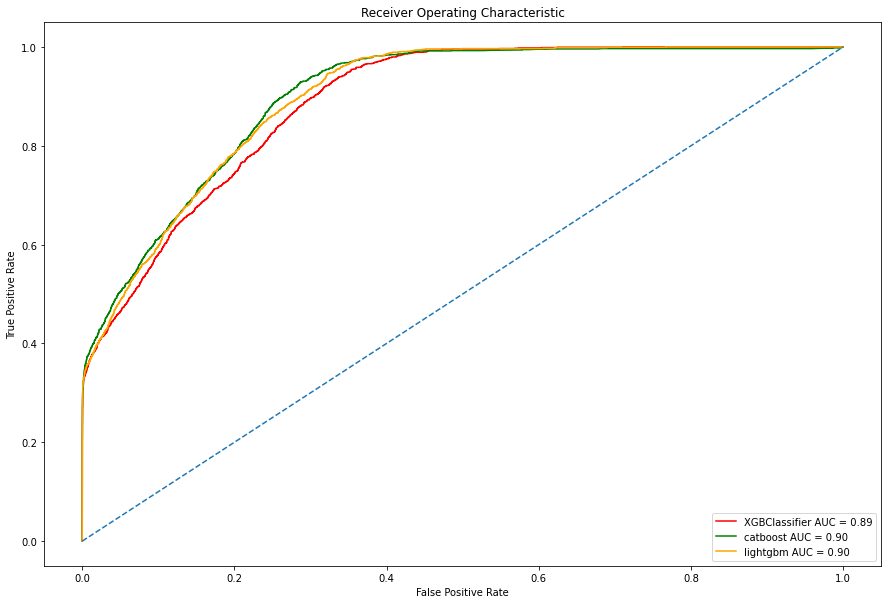

In [88]:
plt.figure(figsize=(15,10))
plt.title('Receiver Operating Characteristic')

#Plotting for Logistic Regression
plt.plot(fpr[0],tpr[0], color='red',label = 'XGBClassifier AUC = %0.2f' % roc_auc_ls[0])

#Plotting for Decision Tree Classifier
plt.plot(fpr[1],tpr[1], color='green',label = 'catboost AUC = %0.2f' % roc_auc_ls[1])

#Plotting for Random Forest Classifier
plt.plot(fpr[2],tpr[2], color='orange',label = 'lightgbm AUC = %0.2f' % roc_auc_ls[2])

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Conclusion:
<li>RobustScaler gave to most appropriate scaling reducing randomness in data </li>
<li>From ROC curve we can see that CatBoost has performed more efficiently than other models </li>
 